In [1]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import fastf1 as ff1

# FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2025
The Saudi Arabian Grand Prix (Arabic: جائزة السعودية الكبرى) is a Formula One motor racing event which took place for the first time in 2021. The inaugural edition of the race was held in Jeddah, in Saudi Arabia. It was the fifth full-night race title on the Formula One calendar, following the Singapore, Bahrain, Sakhir and Qatar Grands Prix.[1] Source: Wikipedia

## Obtain session information

In [2]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='KSA')

session_key session_name                 date_start  \
0        10015   Practice 1  2025-04-18T13:30:00+00:00   
1        10016   Practice 2  2025-04-18T17:00:00+00:00   
2        10017   Practice 3  2025-04-19T13:30:00+00:00   
3        10018   Qualifying  2025-04-19T17:00:00+00:00   

                    date_end gmt_offset session_type  meeting_key location  \
0  2025-04-18T14:30:00+00:00   03:00:00     Practice         1258   Jeddah   
1  2025-04-18T18:00:00+00:00   03:00:00     Practice         1258   Jeddah   
2  2025-04-19T14:30:00+00:00   03:00:00     Practice         1258   Jeddah   
3  2025-04-19T18:00:00+00:00   03:00:00   Qualifying         1258   Jeddah   

   country_key country_code  country_name  circuit_key circuit_short_name  \
0          153          KSA  Saudi Arabia          149             Jeddah   
1          153          KSA  Saudi Arabia          149             Jeddah   
2          153          KSA  Saudi Arabia          149             Jeddah   
3          153          KSA  Saudi Arabia          149             Jeddah   

   year  
0  2025  
1  2025  
2  2025  
3  2025

req         WARNING 	DEFAULT CACHE ENABLED! (3.61 GB) /home/frank/.cache/fastf1
core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 1 [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to ca

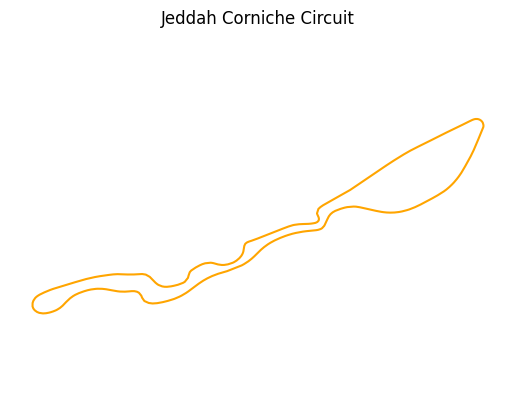

In [5]:
session = ff1.get_session(2025, 5, 'FP1')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()
libraryDataF1.draw_track(circuit_info,pos,"Jeddah Corniche Circuit")

## Free Practice 1
### Obtain setup

In [5]:
practice = libraryDataF1.obtain_information('laps',session_key=10015)
stintInformation = libraryDataF1.obtain_information('stints',session_key=10015)
drivers = libraryDataF1.obtain_information('drivers',session_key=10015)

In [6]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
Sauber and RB centered on straights while Aston and Haas seems that they centered on the technical zone.

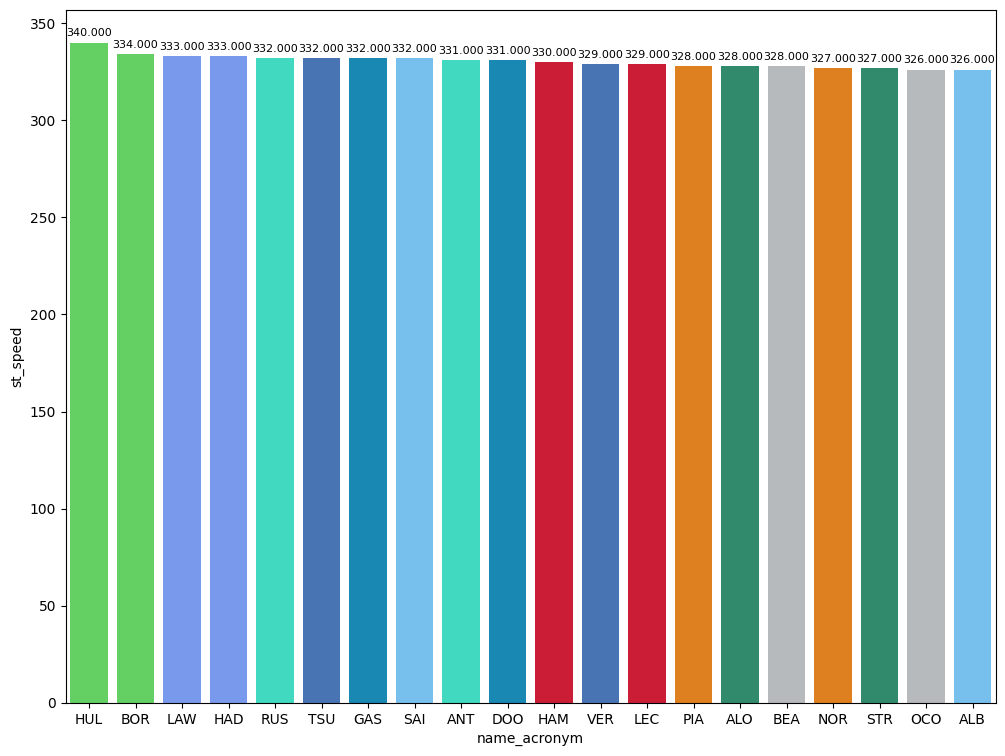

In [7]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

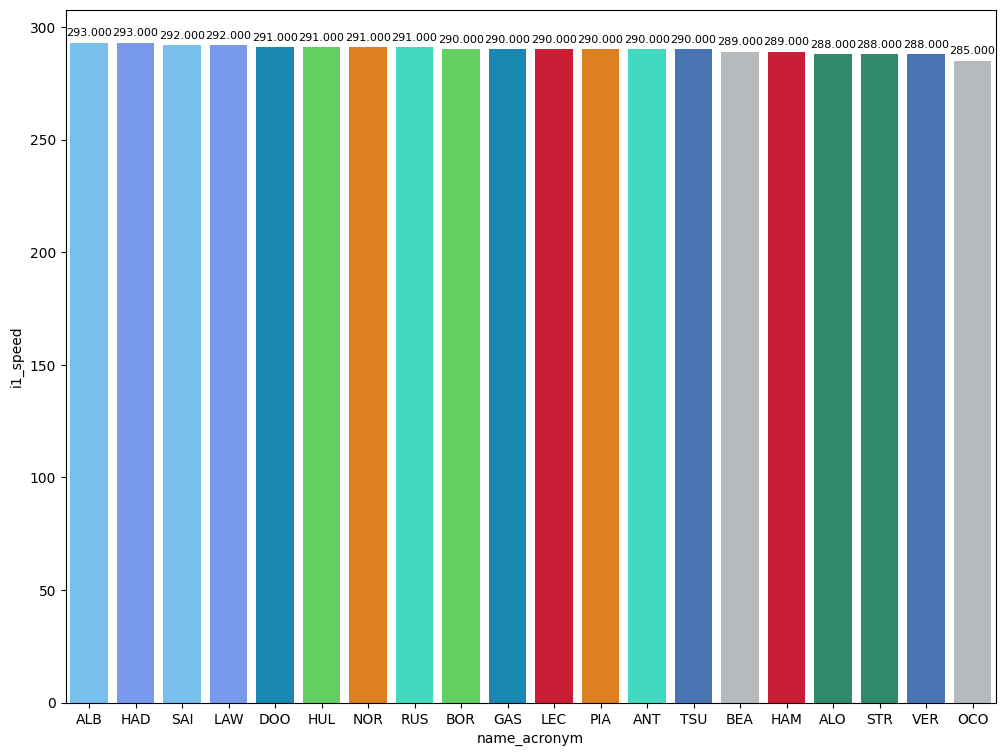

In [8]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

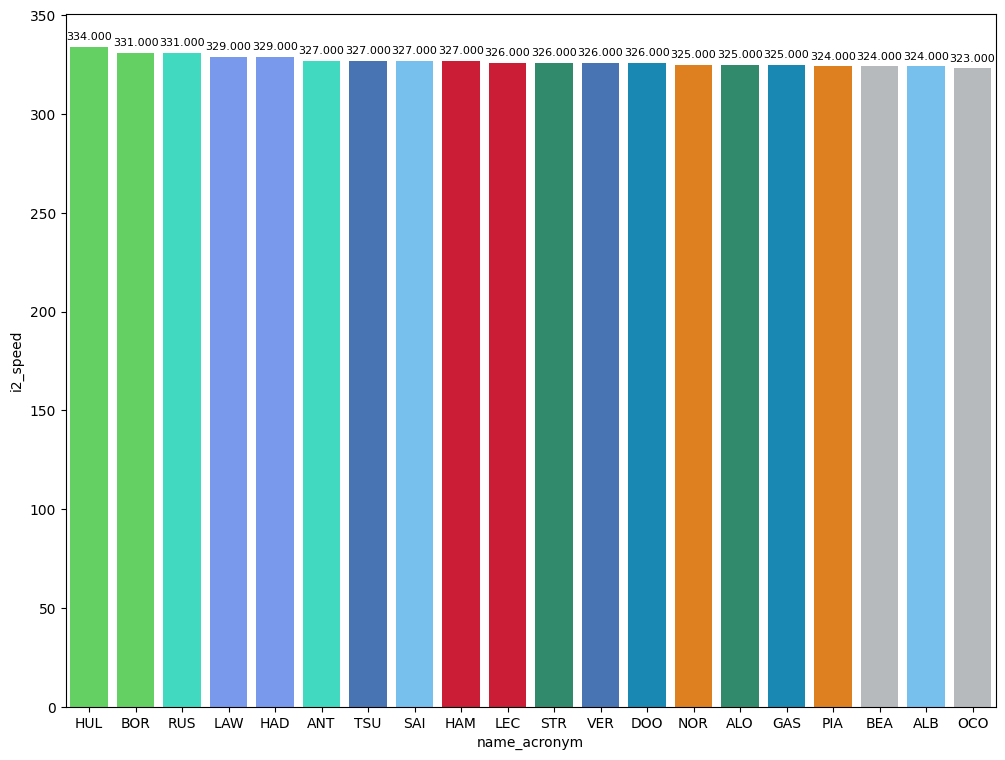

In [9]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [10]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
110    Carlos SAINZ     HARD             32.925             28.474   
116  George RUSSELL   MEDIUM             32.686             28.200   
238    Pierre GASLY     SOFT             32.407             28.296   
176     Jack DOOHAN  UNKNOWN             32.994             28.595   

     duration_sector_3  lap_duration  
110             28.937        90.336  
116             28.788        89.674  
238             28.536        89.239  
176             28.936        90.525

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.
Gasly was the fastest but the differences are so close. 
Aston and Haas suffers in this circuit while Ferrari will be stronger than McLaren to take the pole.
Williams and Red Bull will fight for Q3.

In [11]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


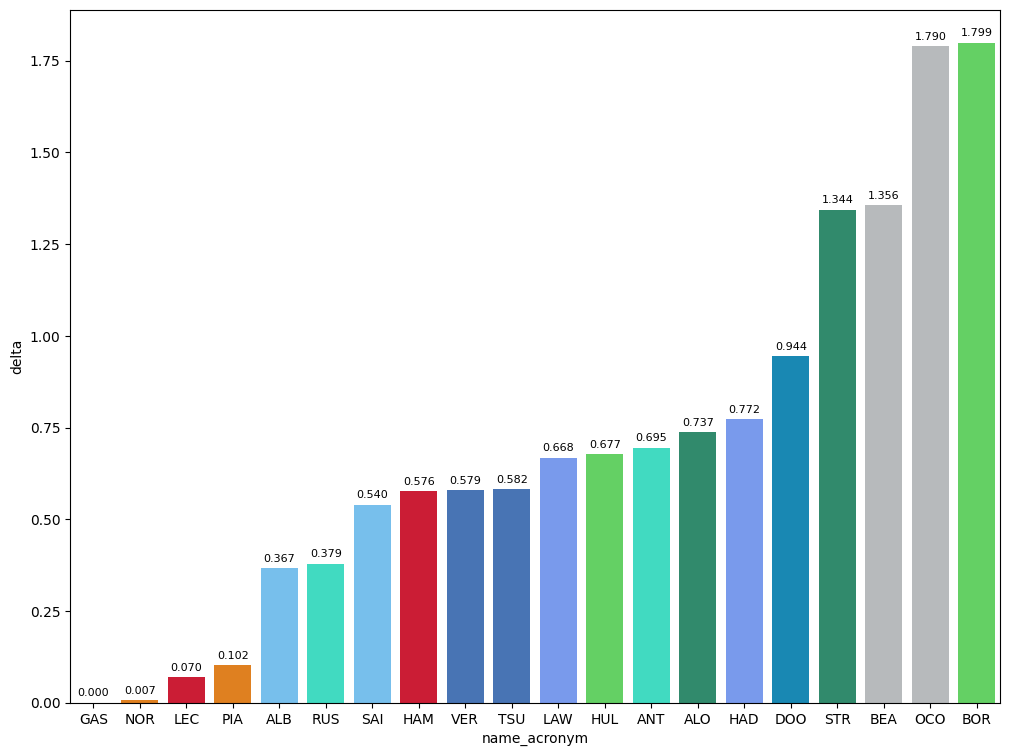

In [12]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.
S1: McLaren is the fastest followed by Gasly. Sauber RB and Haas could suffer here.
S2: It will be a close battle among Ferrari, McLaren and Mercedes. Red Bull and Alpine suffer here.
S3: Gasly was the fastest so Alpine has a potential. AM and Haas suffered here. Red Bull and Ferrari should improve here.

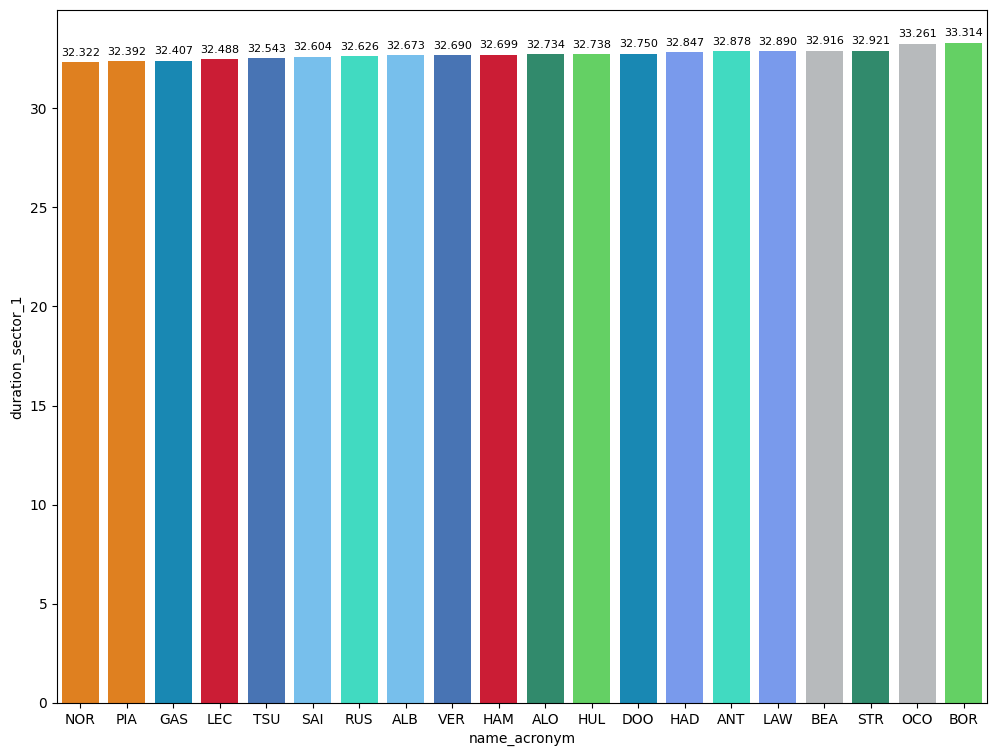

In [13]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

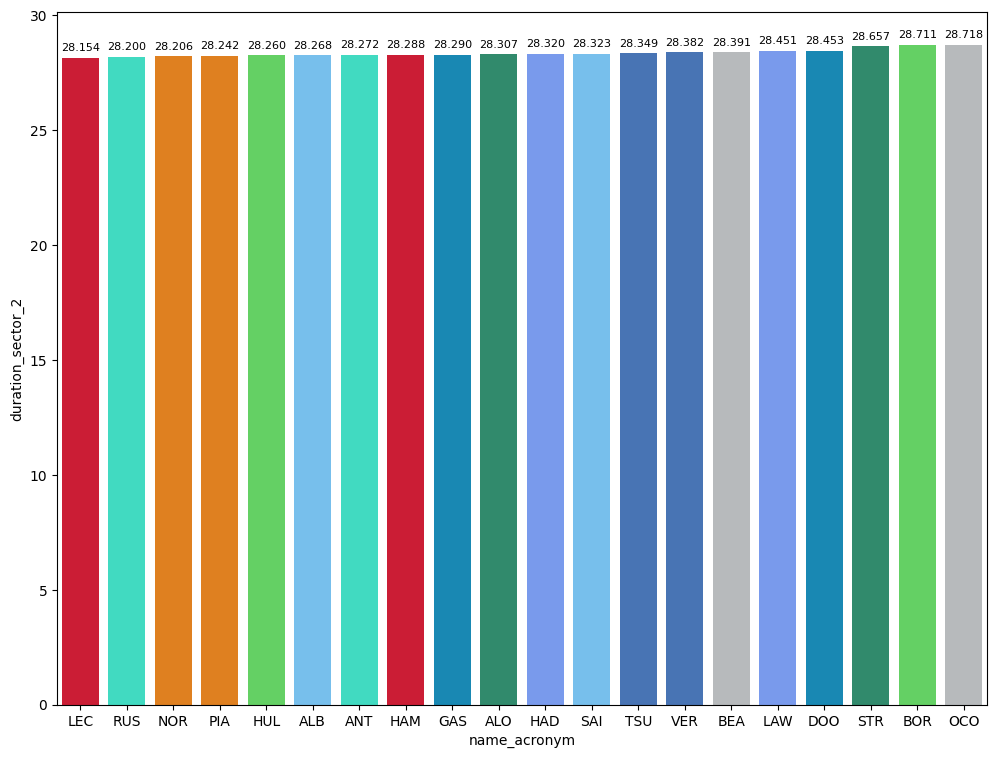

In [14]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

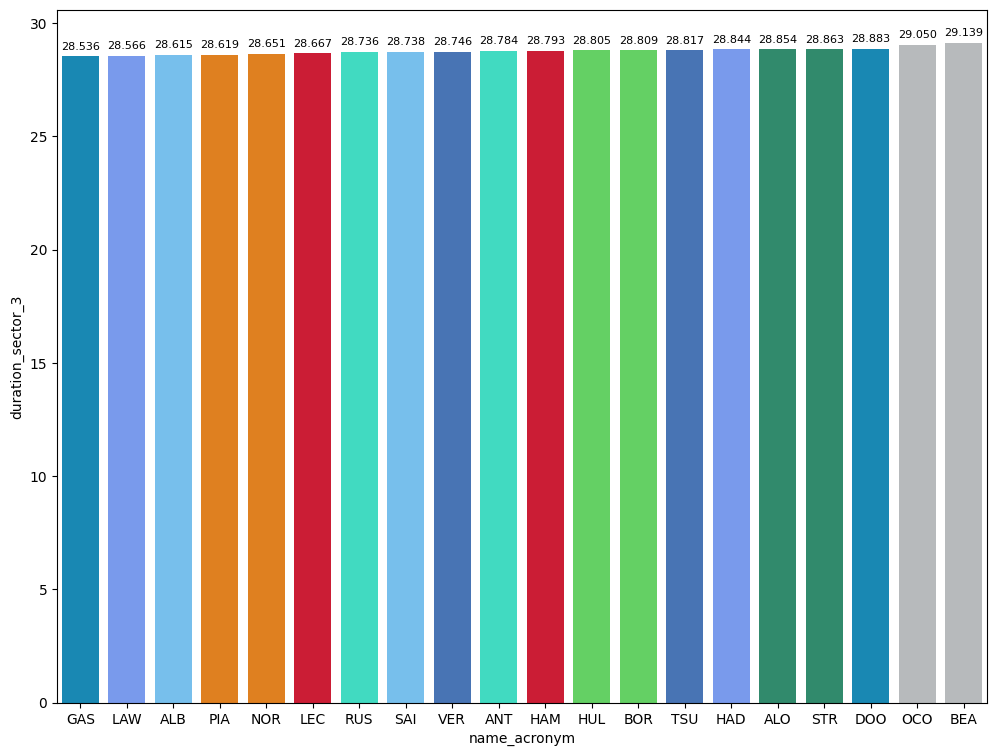

In [15]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [16]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 103").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
UNKNOWN      90.525000
SOFT         92.546629
MEDIUM       93.745538
HARD         93.750938

## Free Practice 2
### Obtain setup

In [3]:
practice = libraryDataF1.obtain_information('laps',session_key=10016)
stintInformation = libraryDataF1.obtain_information('stints',session_key=10016)
drivers = libraryDataF1.obtain_information('drivers',session_key=10016)

In [4]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
Aston was the worst in top speed. It is supposed that Aston and McLaren are centered on turns.
Ferrari was the fastest as Sauber ccentered on straights.

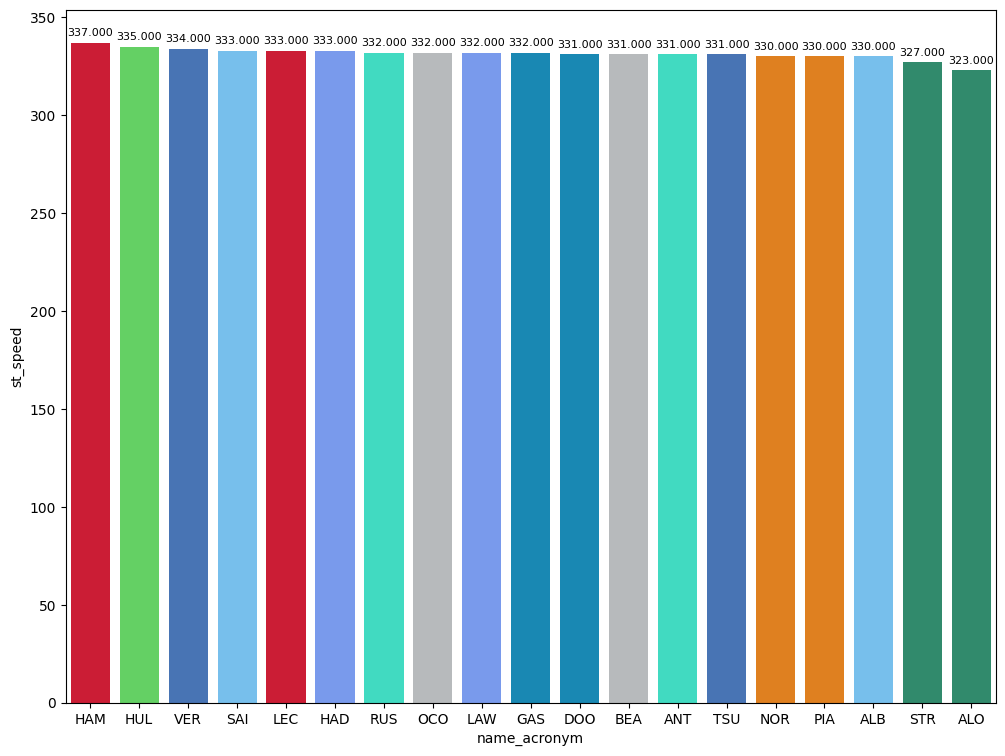

In [5]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

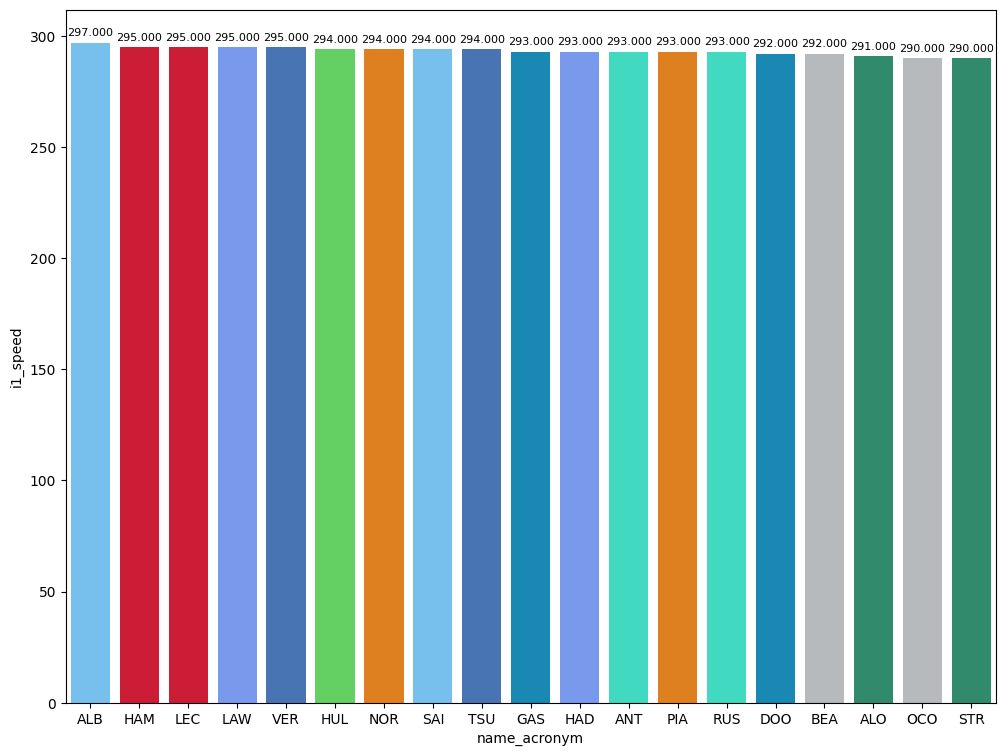

In [6]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

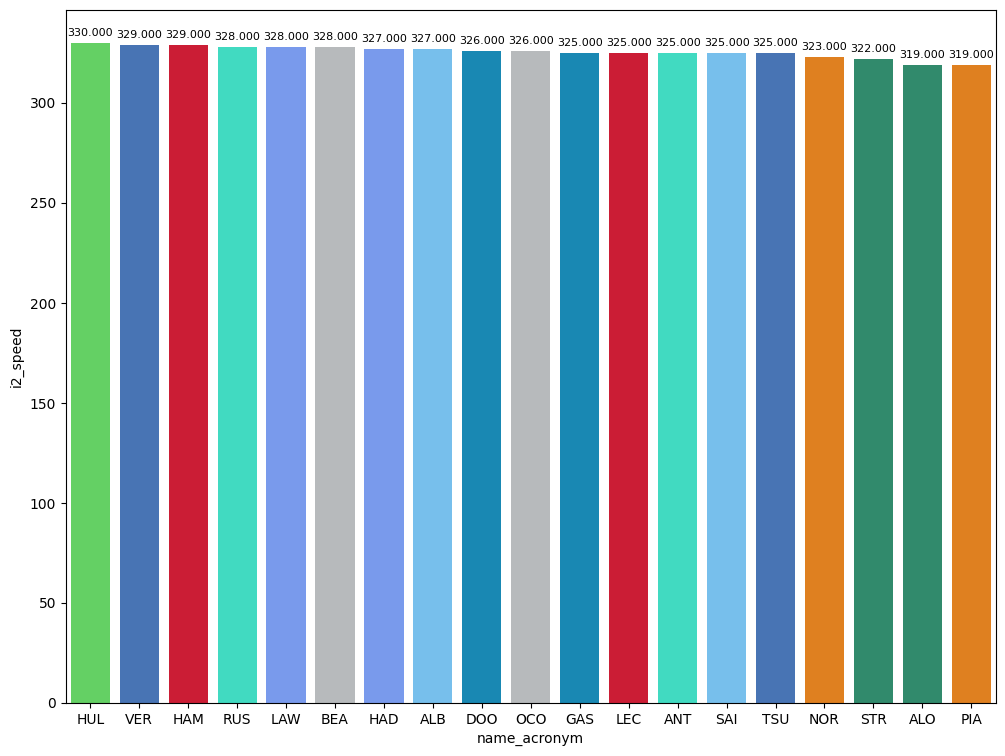

In [7]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [8]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
109  Alexander ALBON     HARD             32.729             28.252   
134  Charles LECLERC   MEDIUM             32.441             28.161   
256     Lando NORRIS     SOFT             32.174             27.898   

     duration_sector_3  lap_duration  
109             28.741        89.722  
134             28.400        89.002  
256             28.195        88.267

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session
Aston and Haas will suffer in this GP. Maybe DOO could be knocked-out. Alpine and Williams could fight for Q3.
Red Bull with both cars could be on the battle for pole.

In [9]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


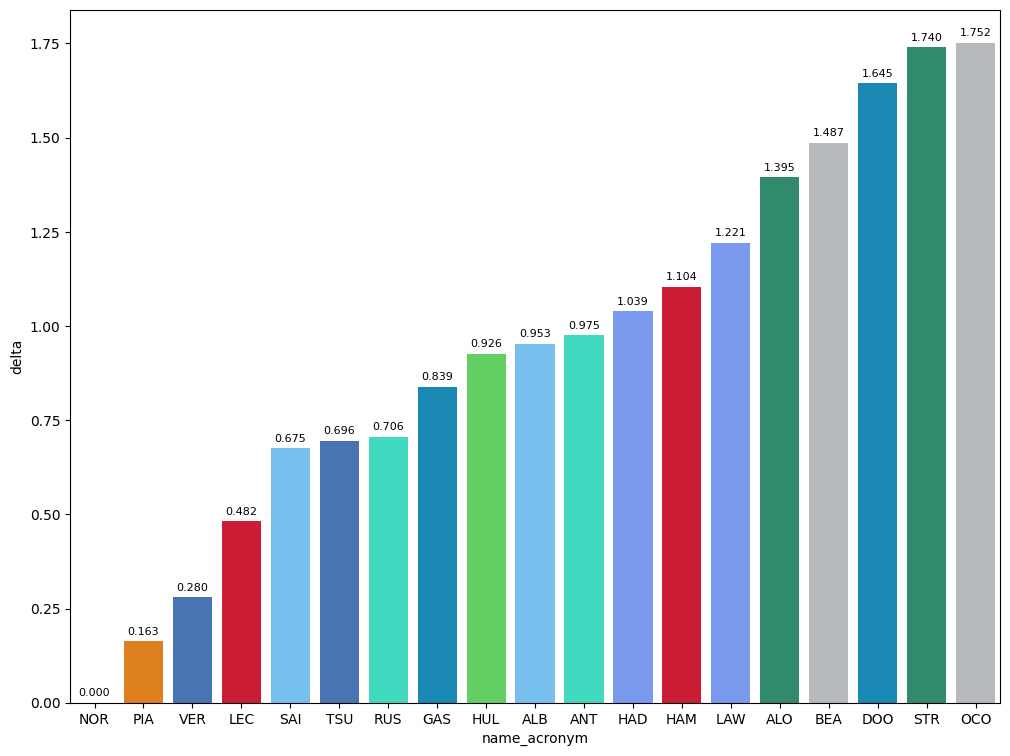

In [10]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.
S1: McLaren was the fastest followed by Red Bull for fighting for being the best of the season. Haas and Sauber could suffer here.
S2: haas could have its opportunity in this sector. Aston is the worst here. Ferrari could gain some positions on Q.
S3: Haas and Sauber can improve if BEA or HUL laptime are taken into account.It is probably that Aston be knocked out.

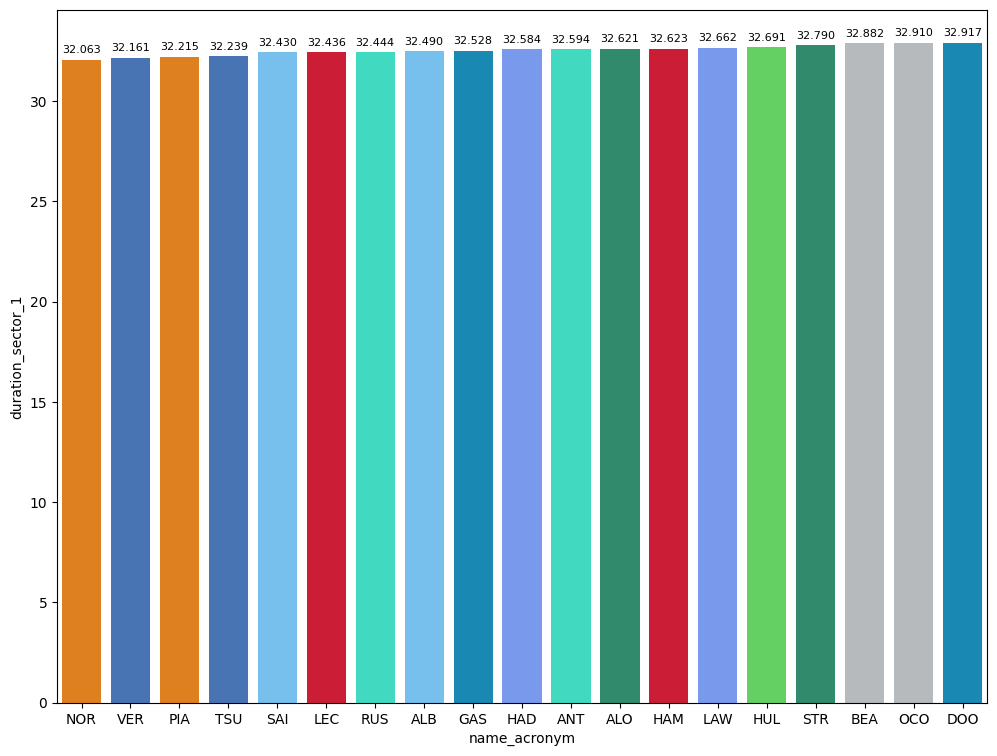

In [11]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

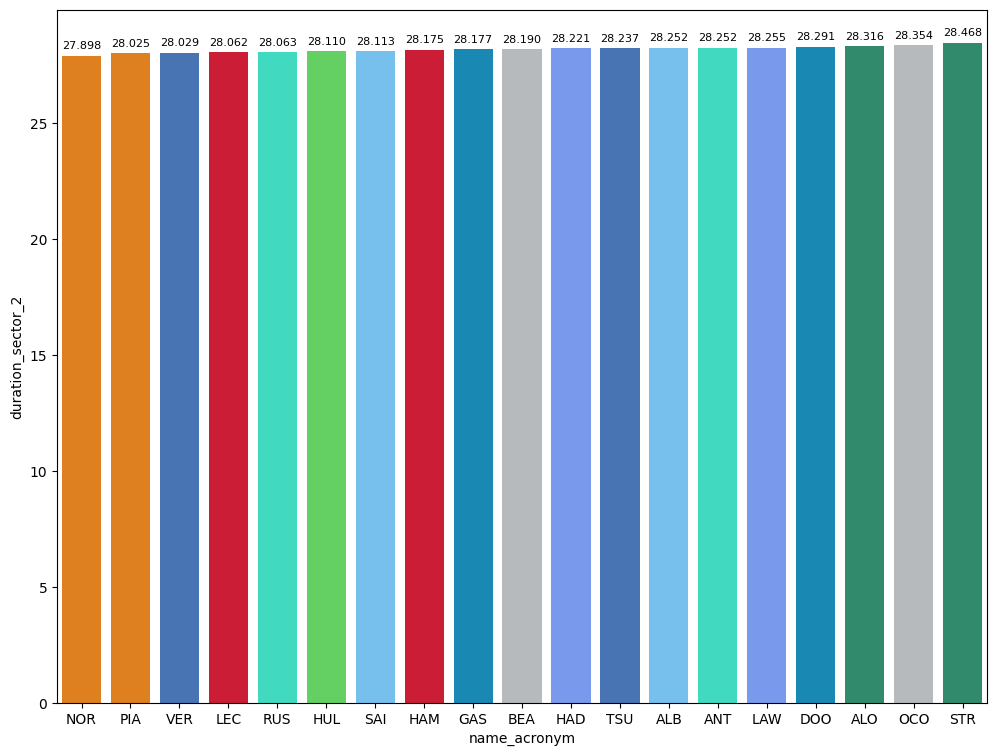

In [12]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

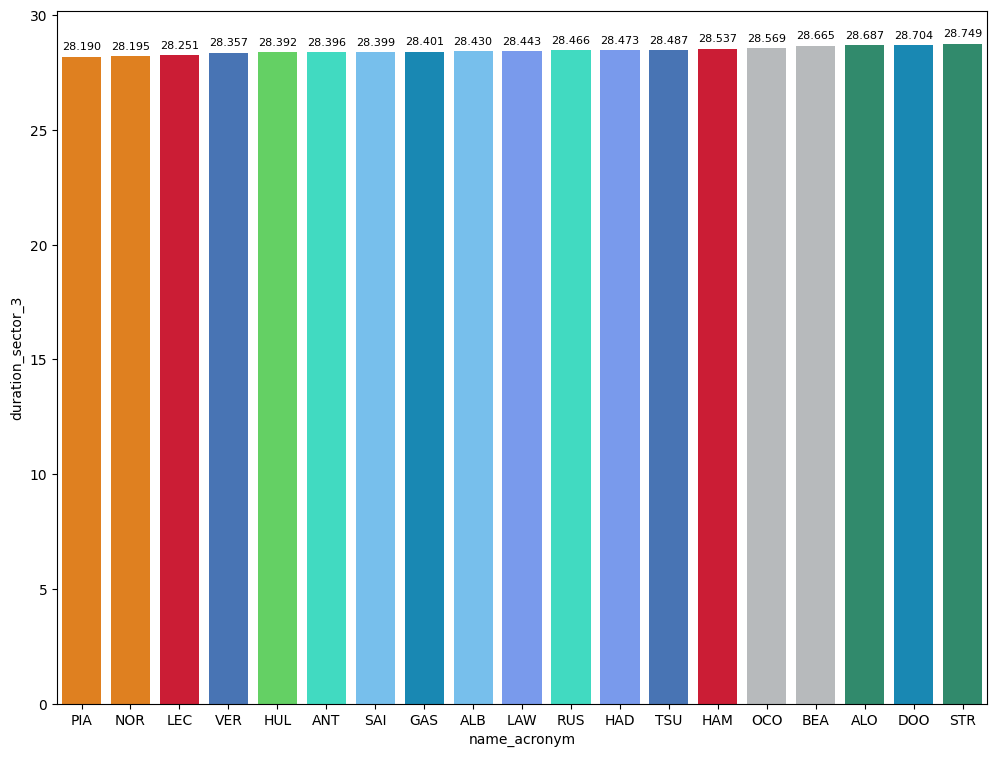

In [13]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [14]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration>93.5 and lap_duration <= 96").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
MEDIUM       94.950382
HARD         94.970000
SOFT         95.428000

### Lap Time Distributions

/home/frank/Escritorio/F1_backup/F1_notebooks/F1_25/F1_library/libraryF1dataNotebook.py:576: UserWarning:

The palette list has more values (20) than needed (14), which may not be intended.



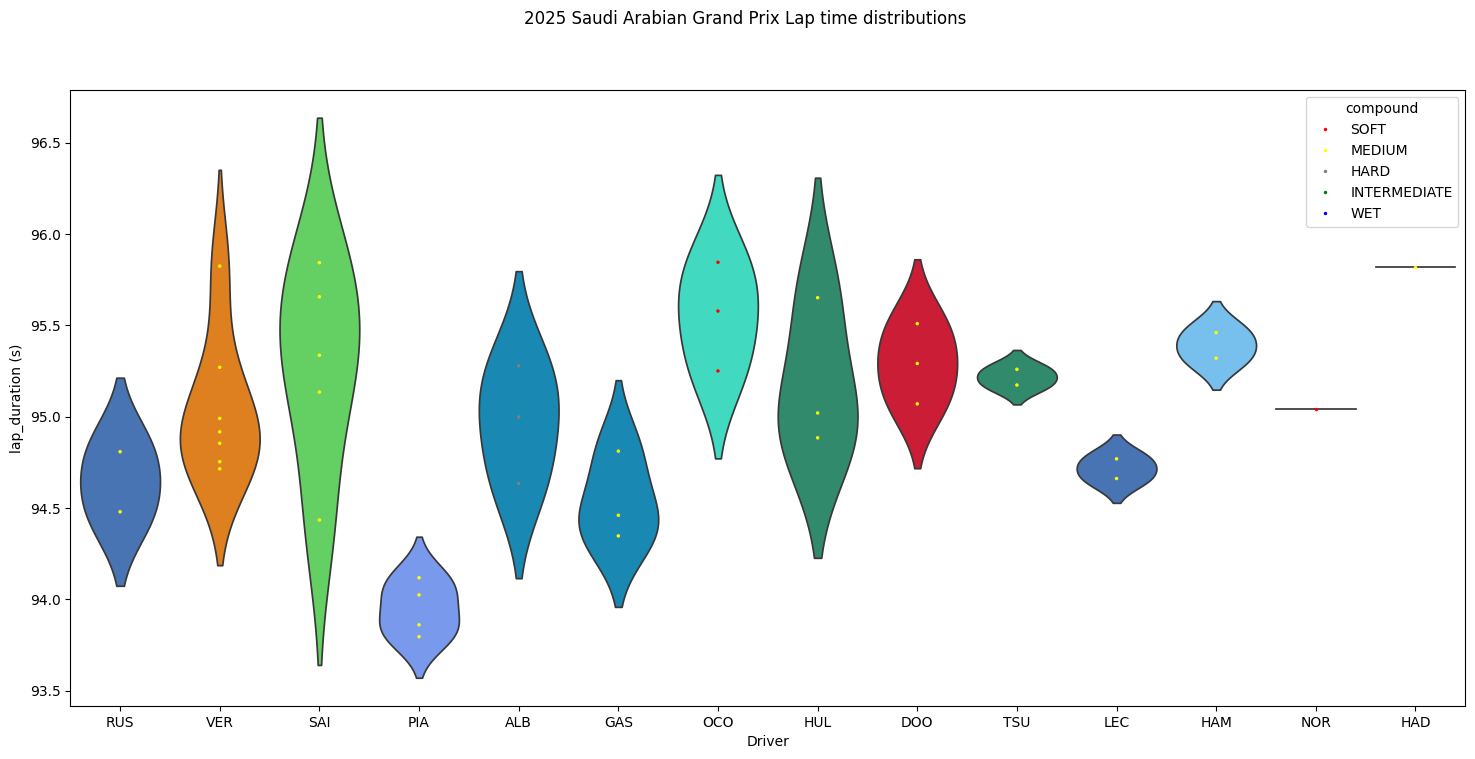

In [109]:
libraryDataF1.lap_time_distributions("2025 Saudi Arabian Grand Prix Lap time distributions",drivers,jointables2.query("lap_duration<96 and lap_duration >= 93"))

### Long runs

In [27]:
MINIMUN_SECONDS = 93
MAXIMUM_SECONDS = 96

#### Red Bull Racing

In [28]:
stintInformation.query('driver_number == 1 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1          1258        10016             1             22          1        4   
8          1258        10016             1              1          1        8   
20         1258        10016             2             22          5        7   
27         1258        10016             3             22          8       10   
28         1258        10016             2              1          9       11   
44         1258        10016             4             22         11       14   
49         1258        10016             3              1         12       22   
61         1258        10016             5             22         15       16   
78         1258        10016             6             22         17       20   
94         1258        10016             4              1         22       22   

   compound  tyre_age_at_start  
1    MEDIUM                0.0  
8    MEDIUM                0.0  
20   MEDIUM                3.0  
27   MEDIUM                6.0  
28     SOFT                0.0  
44     SOFT                0.0  
49   MEDIUM                7.0  
61     SOFT                4.0  
78   MEDIUM                0.0  
94     SOFT                3.0

In [29]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
257  Max VERSTAPPEN   MEDIUM  2025-04-18T17:37:32.516000+00:00          12   
266  Max VERSTAPPEN   MEDIUM  2025-04-18T17:39:07.358000+00:00          13   
269  Max VERSTAPPEN   MEDIUM  2025-04-18T17:40:42.223000+00:00          14   
272  Max VERSTAPPEN   MEDIUM  2025-04-18T17:42:16.970000+00:00          15   
289  Max VERSTAPPEN   MEDIUM  2025-04-18T17:45:31.846000+00:00          17   
302  Max VERSTAPPEN   MEDIUM  2025-04-18T17:47:06.922000+00:00          18   
318  Max VERSTAPPEN   MEDIUM  2025-04-18T17:48:42.224000+00:00          19   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
257             34.966             29.963             29.988        94.917  
266             34.966             29.827             30.061        94.854  
269             34.909             29.808             29.997        94.714  
272             34.881             29.821             30.051        94.753  
289             35.005             29.901             30.084        94.990  
302             35.118             29.998             30.154        95.270  
318             35.303             30.044             30.477        95.824

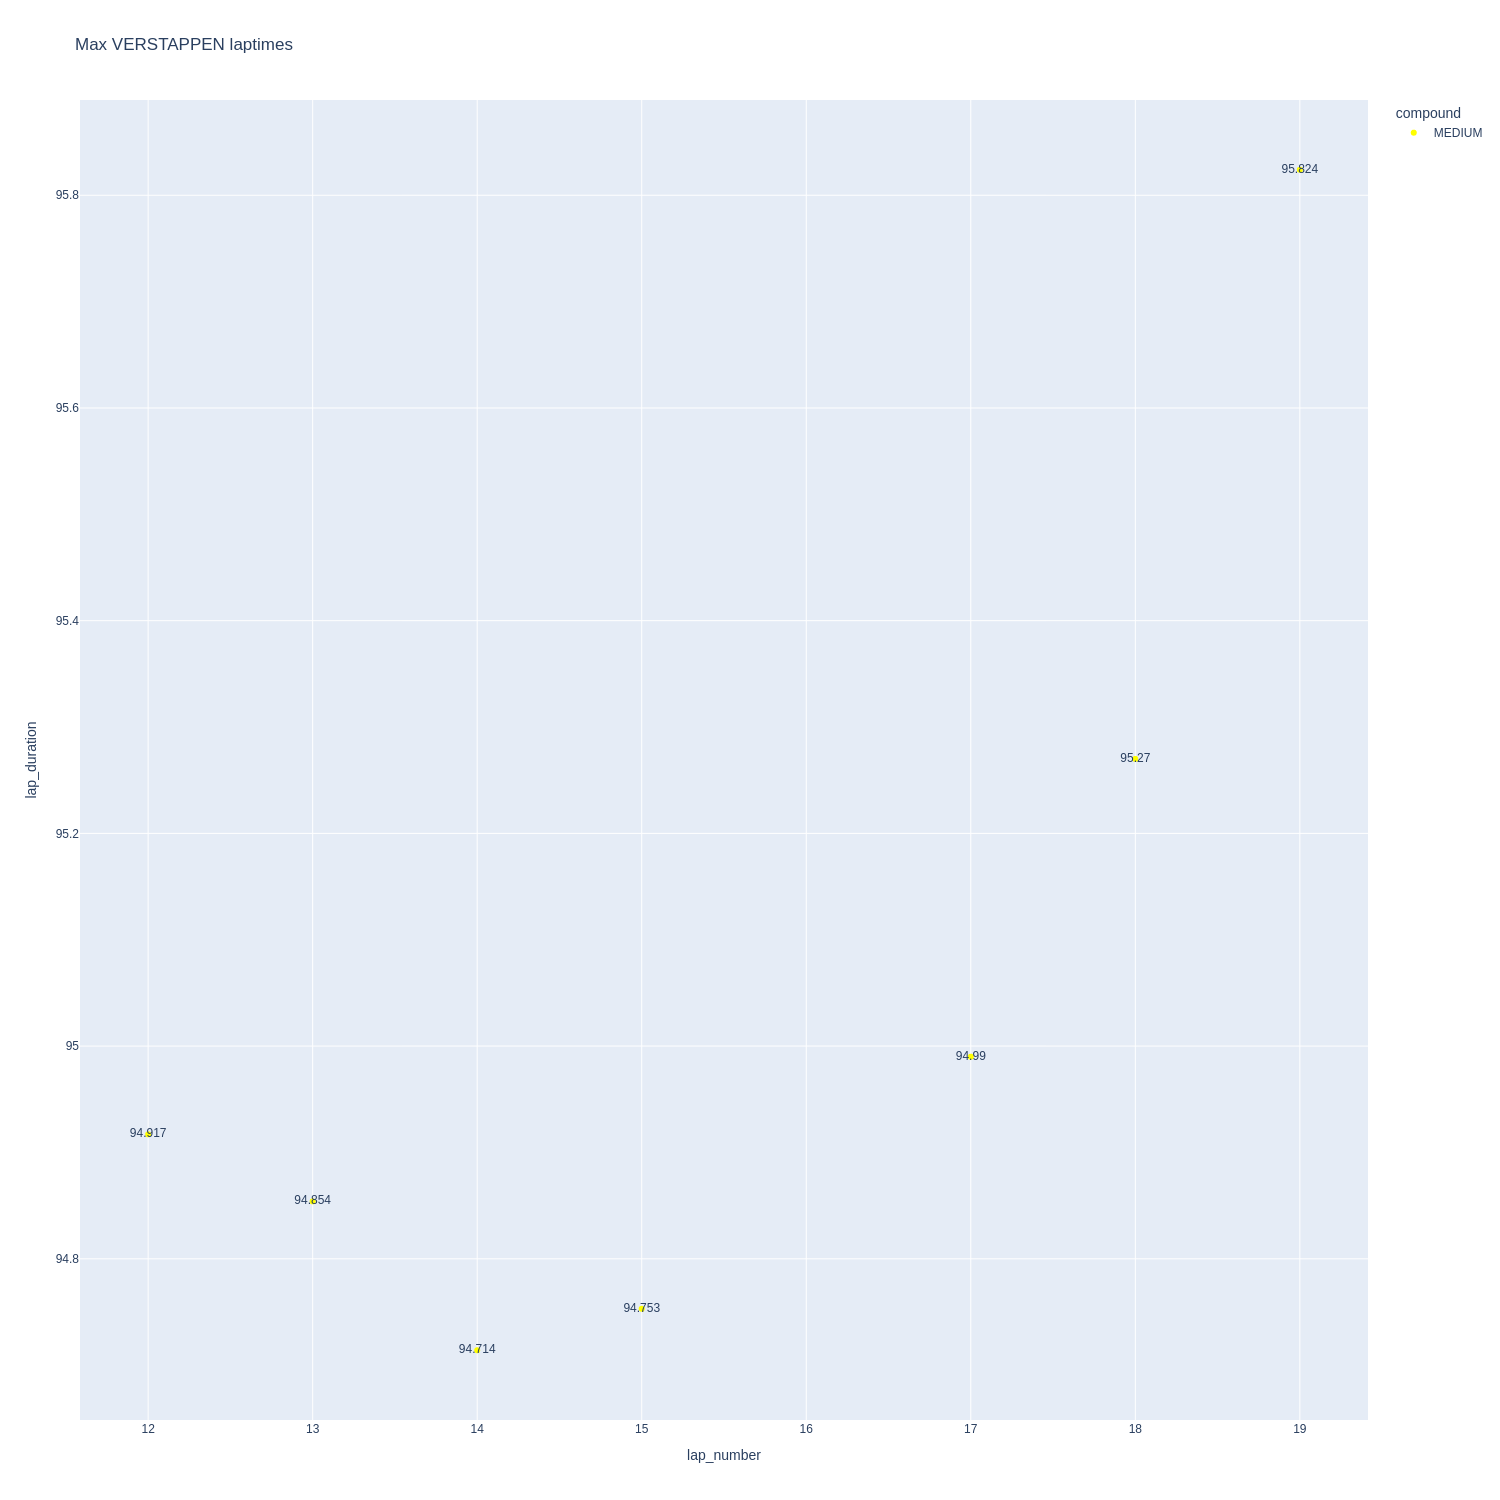

In [30]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

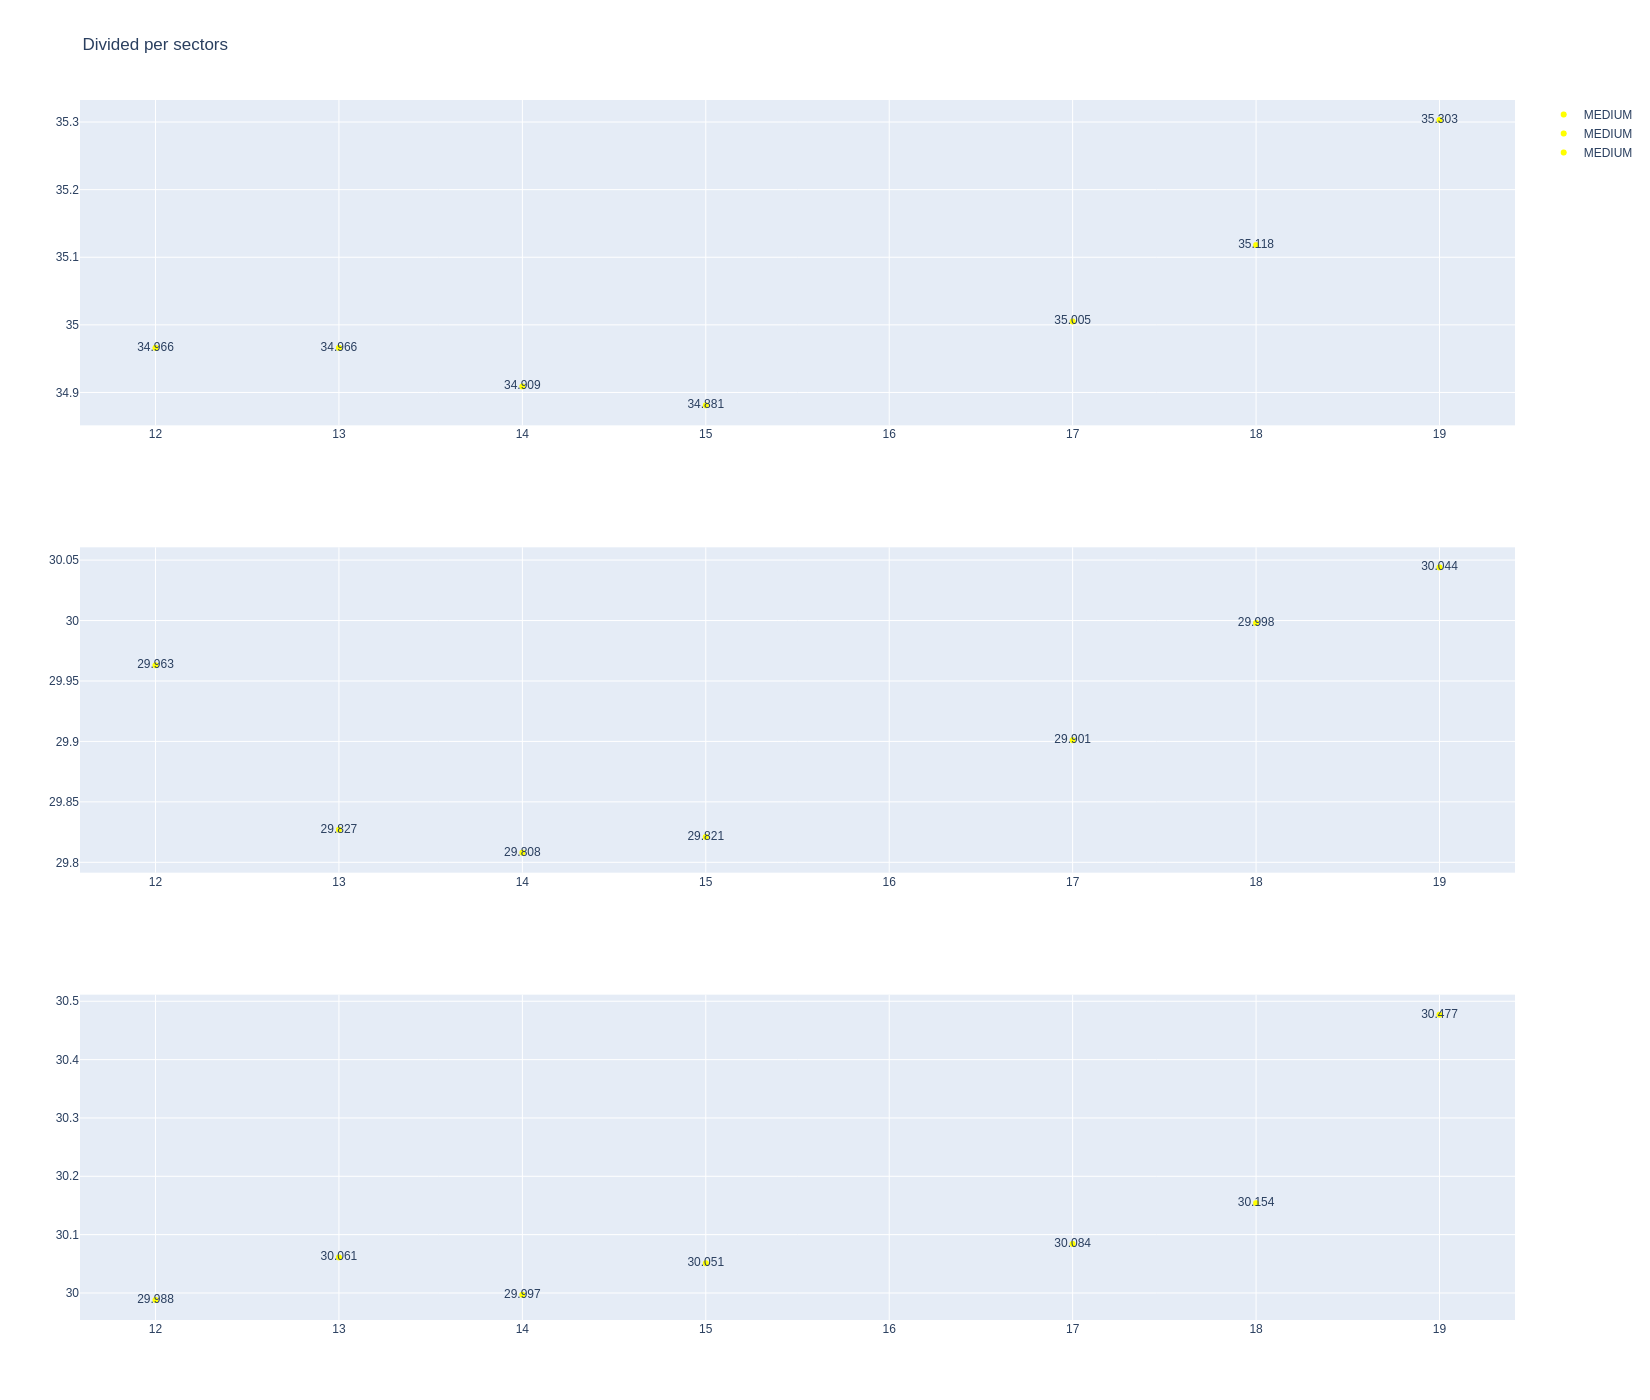

In [31]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [32]:
data = libraryDataF1.getinfolongruns(jointables2,22,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
298  Yuki TSUNODA   MEDIUM  2025-04-18T17:46:22.300000+00:00          17   
311  Yuki TSUNODA   MEDIUM  2025-04-18T17:47:57.417000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
298             35.000             29.958             30.215        95.173  
311             35.197             29.940             30.122        95.259

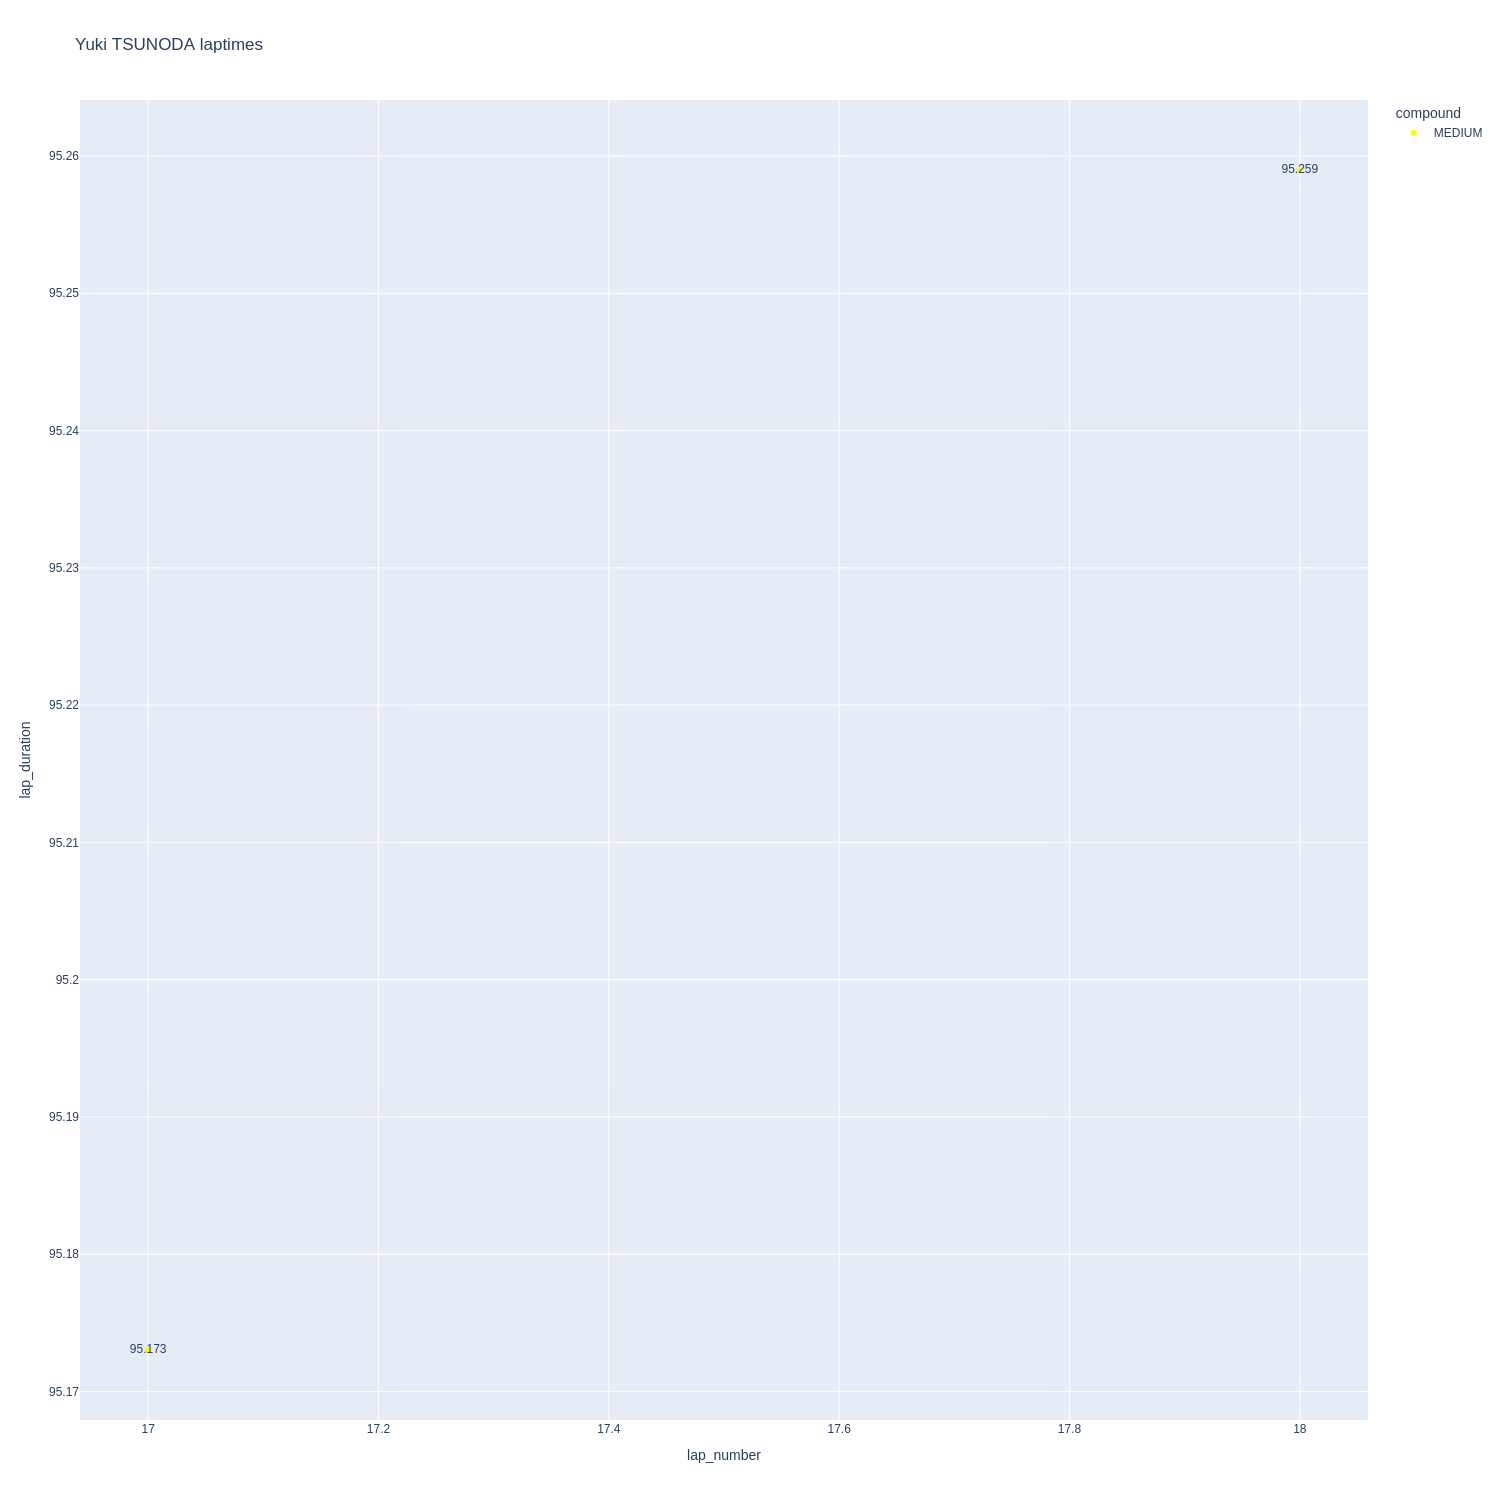

In [33]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

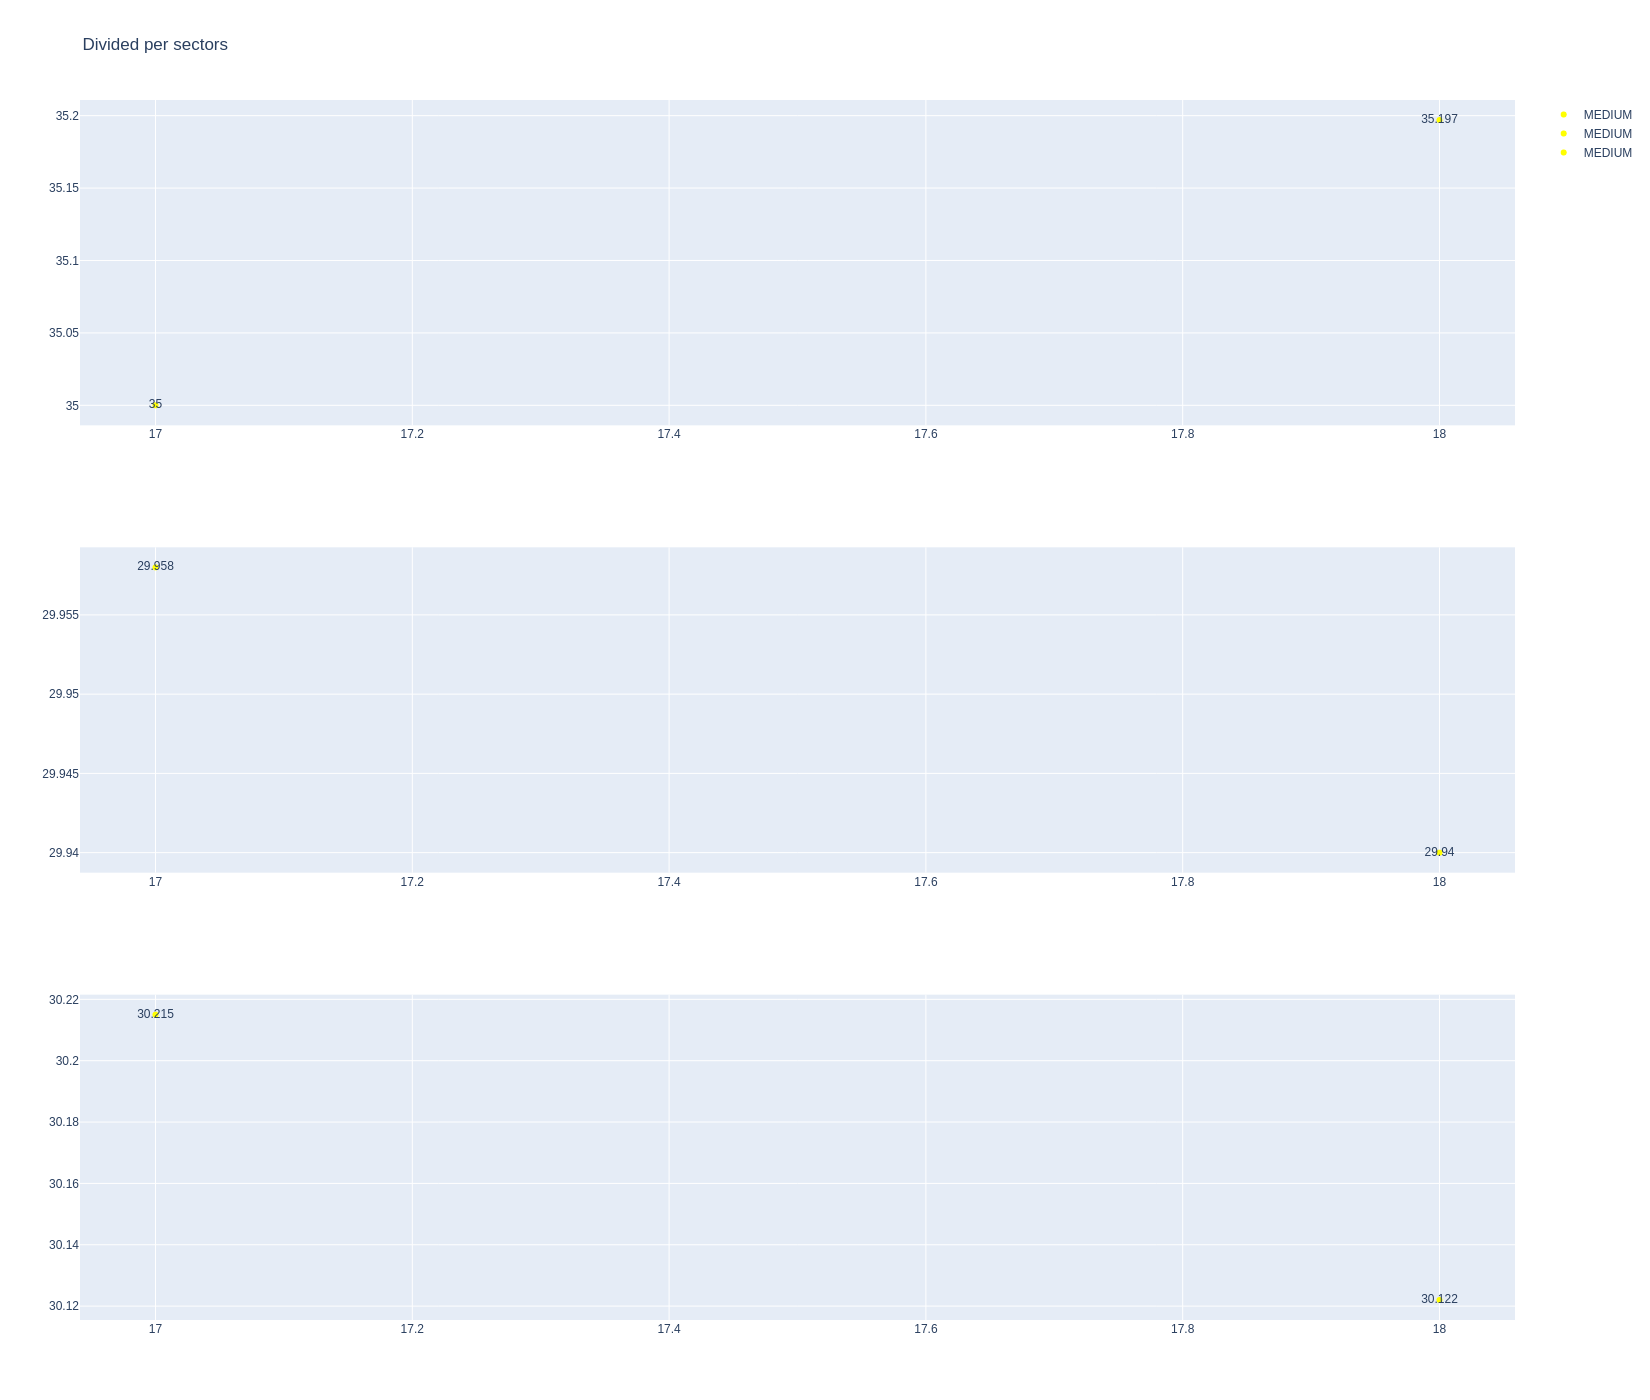

In [34]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [35]:
stintInformation.query('driver_number == 55 or driver_number == 44')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
16         1258        10016             1             55          1        9   
18         1258        10016             1             44          1       10   
41         1258        10016             2             55         10       13   
45         1258        10016             2             44         11       14   
58         1258        10016             3             55         14       15   
63         1258        10016             3             44         15       17   
75         1258        10016             4             55         16       22   
84         1258        10016             4             44         18       21   
96         1258        10016             5             44         22       22   
97         1258        10016             5             55         23       23   

   compound  tyre_age_at_start  
16   MEDIUM                0.0  
18   MEDIUM                0.0  
41     SOFT                0.0  
45     SOFT                0.0  
58     SOFT                0.0  
63     SOFT                4.0  
75   MEDIUM                0.0  
84   MEDIUM                0.0  
96   MEDIUM                0.0  
97   MEDIUM               15.0

In [36]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
307  Charles LECLERC   MEDIUM  2025-04-18T17:47:23.083000+00:00          17   
322  Charles LECLERC   MEDIUM  2025-04-18T17:48:57.883000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
307             34.852              29.88             30.037        94.769  
322             34.614              29.97             30.077        94.661

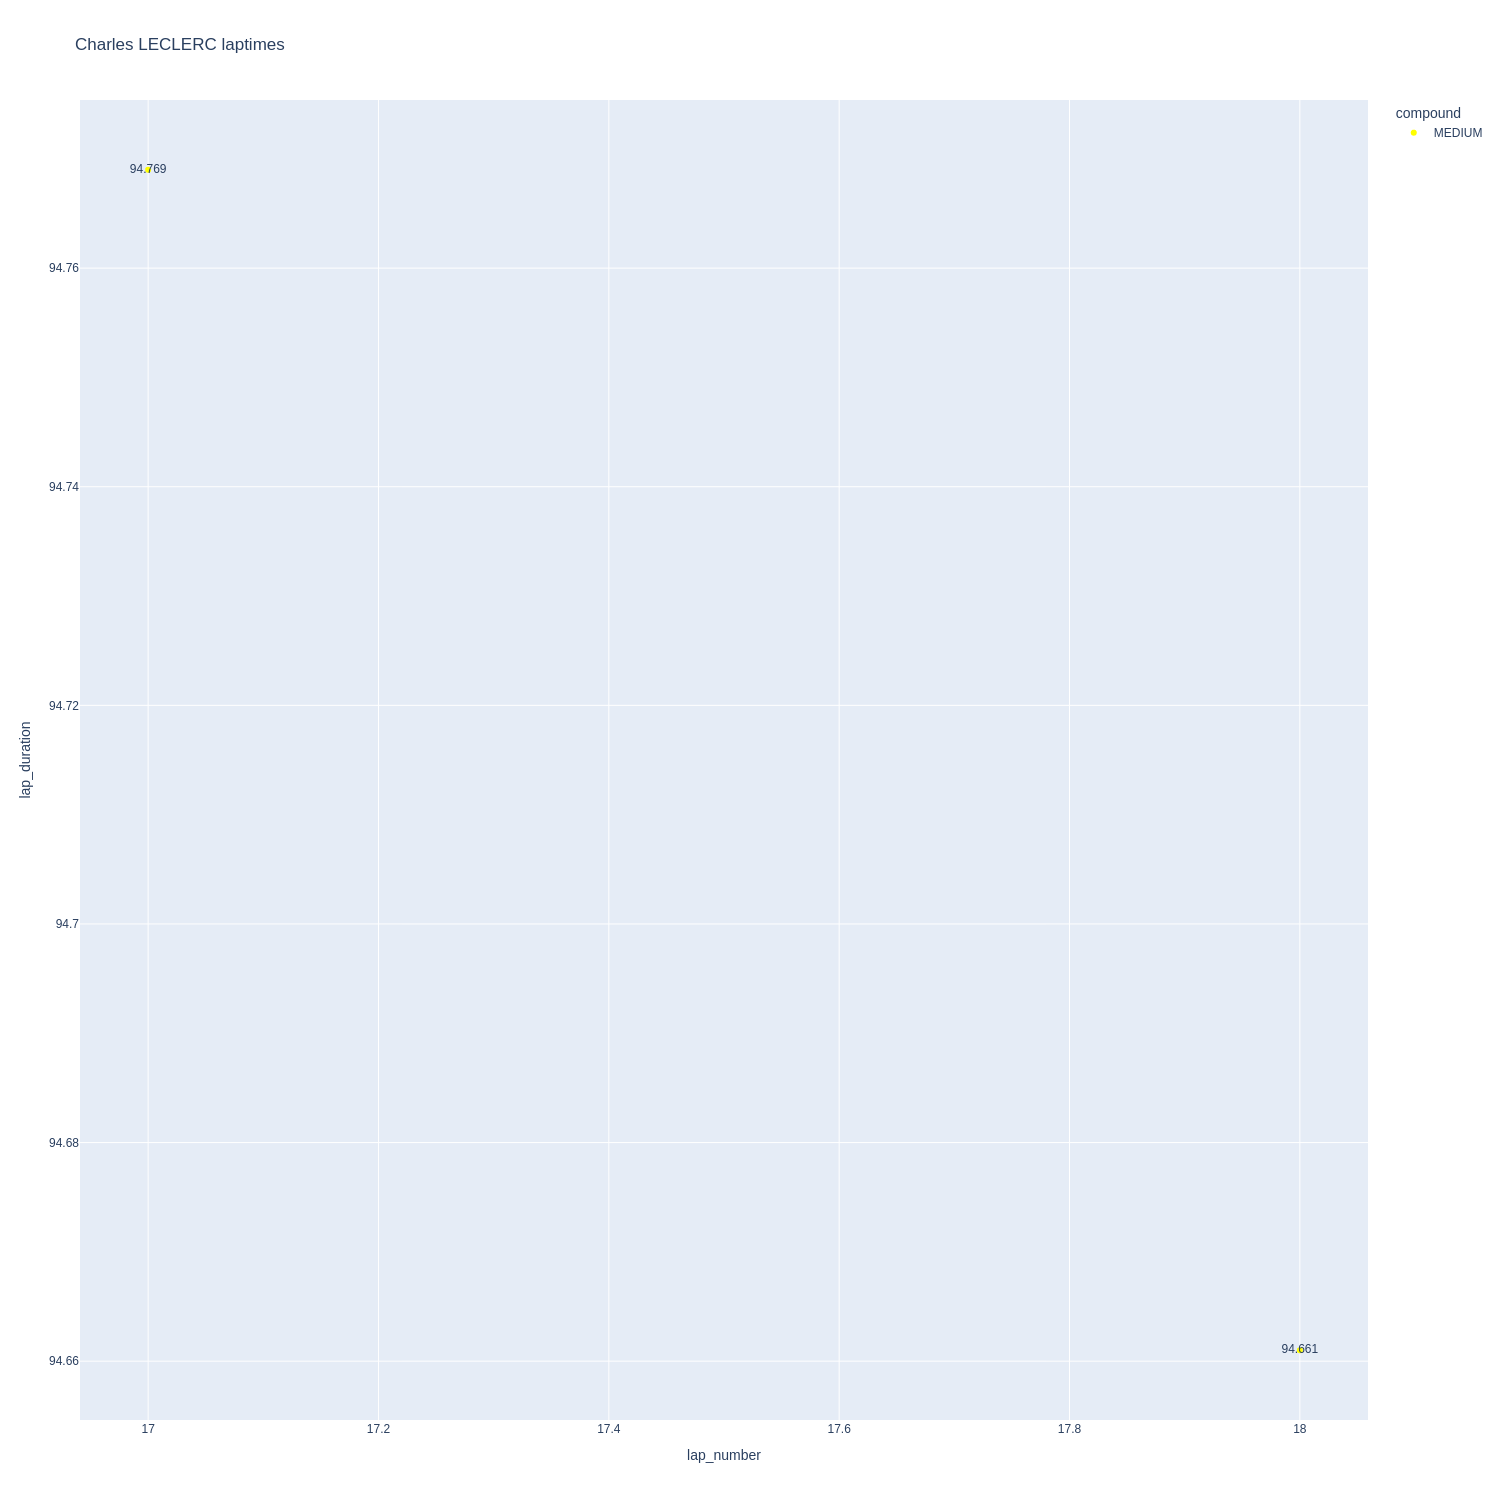

In [37]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

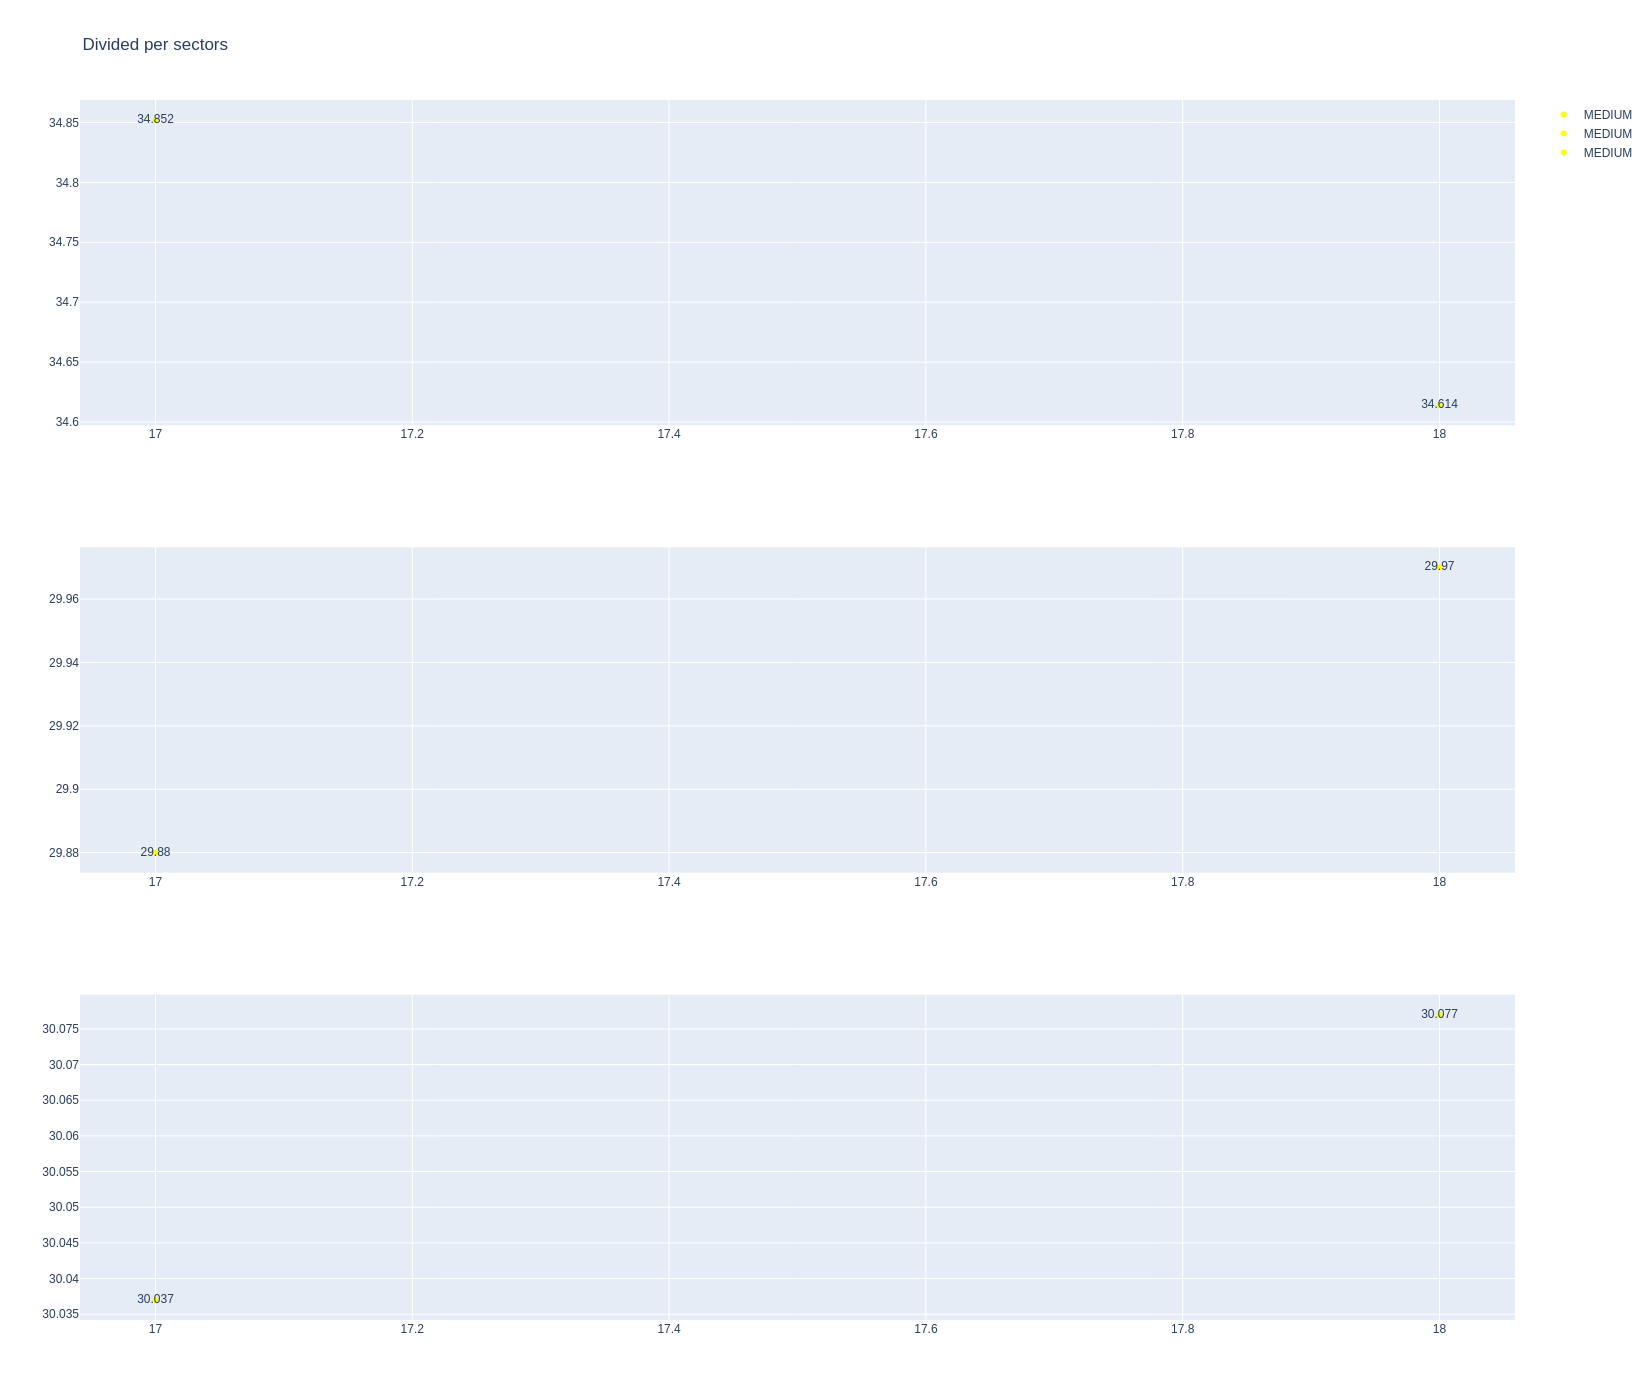

In [38]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [39]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
310  Lewis HAMILTON   MEDIUM  2025-04-18T17:47:44.916000+00:00          18   
326  Lewis HAMILTON   MEDIUM  2025-04-18T17:49:20.195000+00:00          19   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
310             35.022             30.104             30.194         95.32  
326             35.079             30.138             30.243         95.46

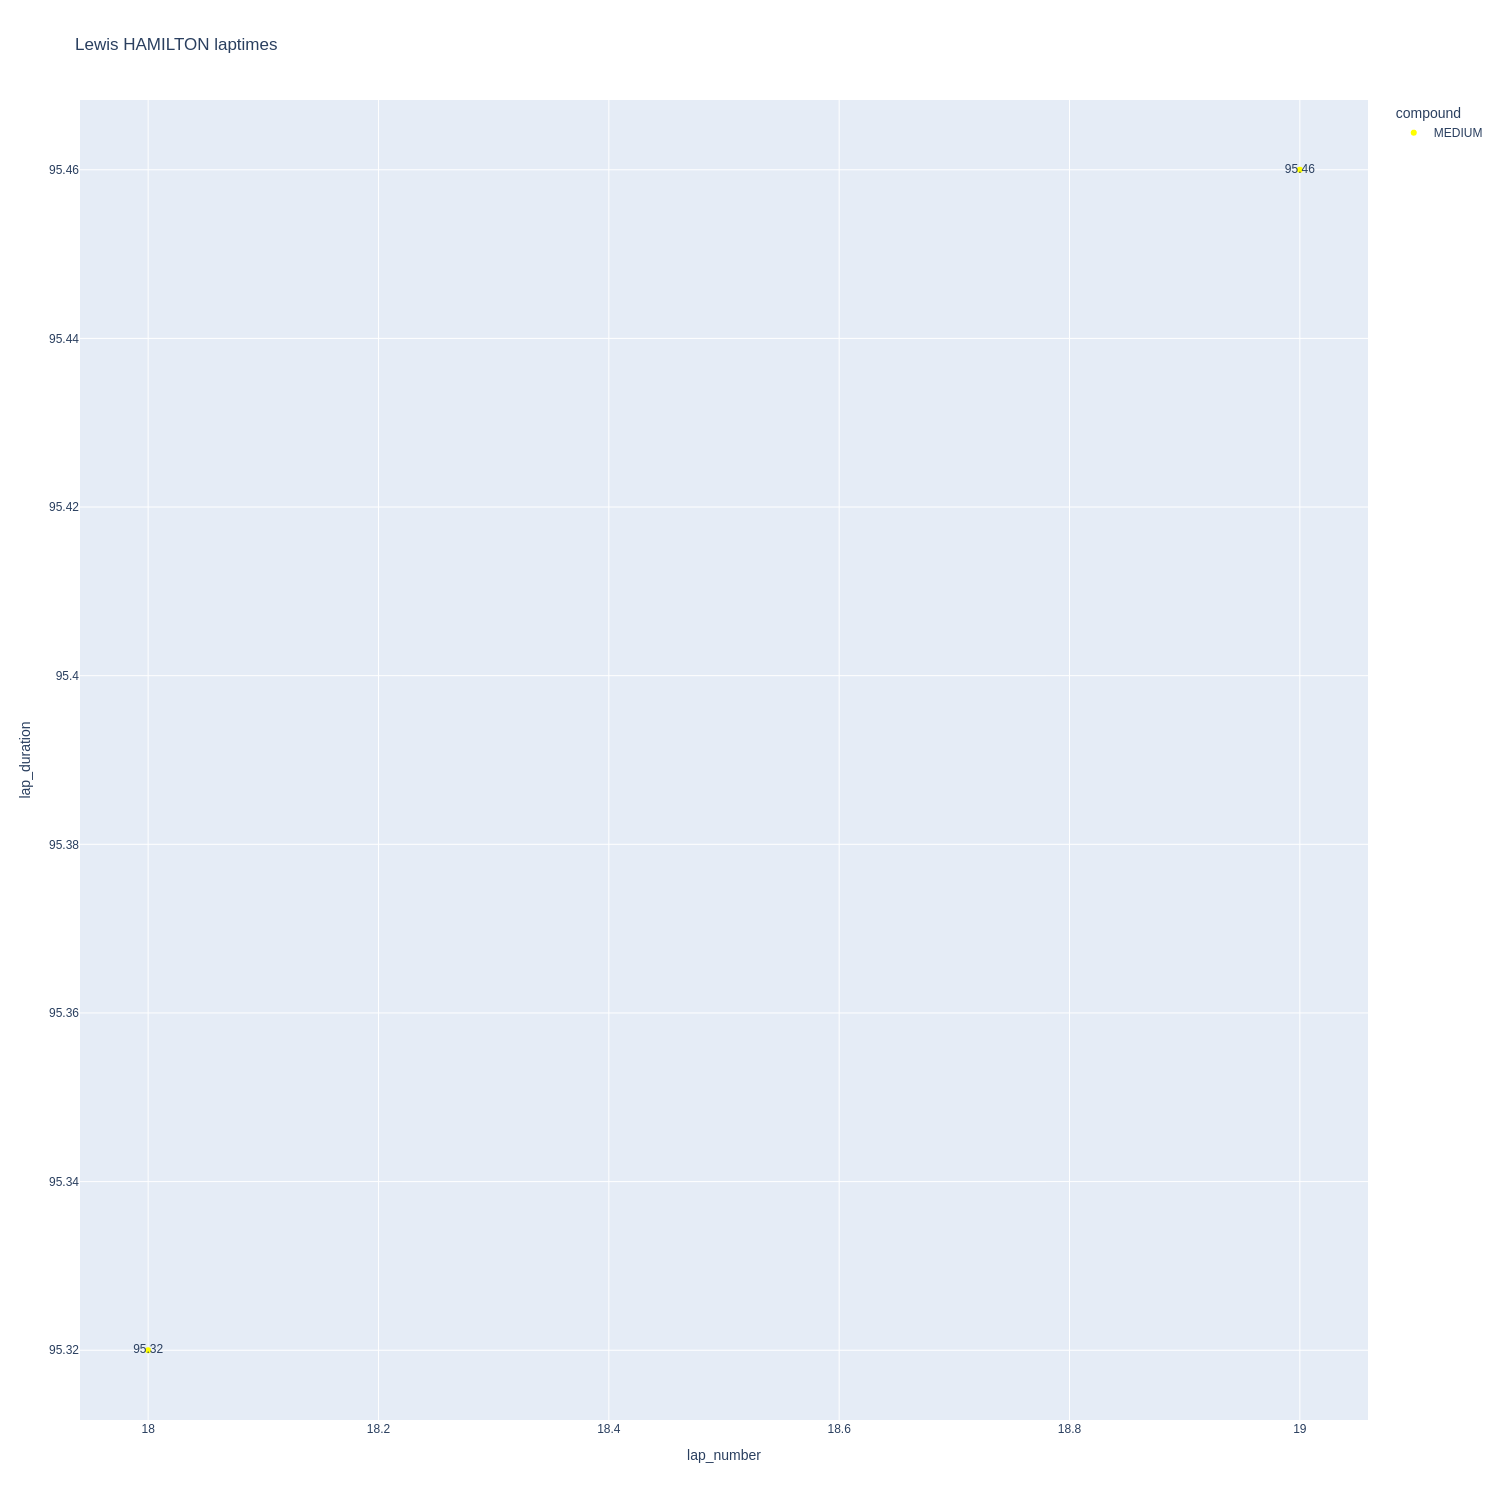

In [40]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

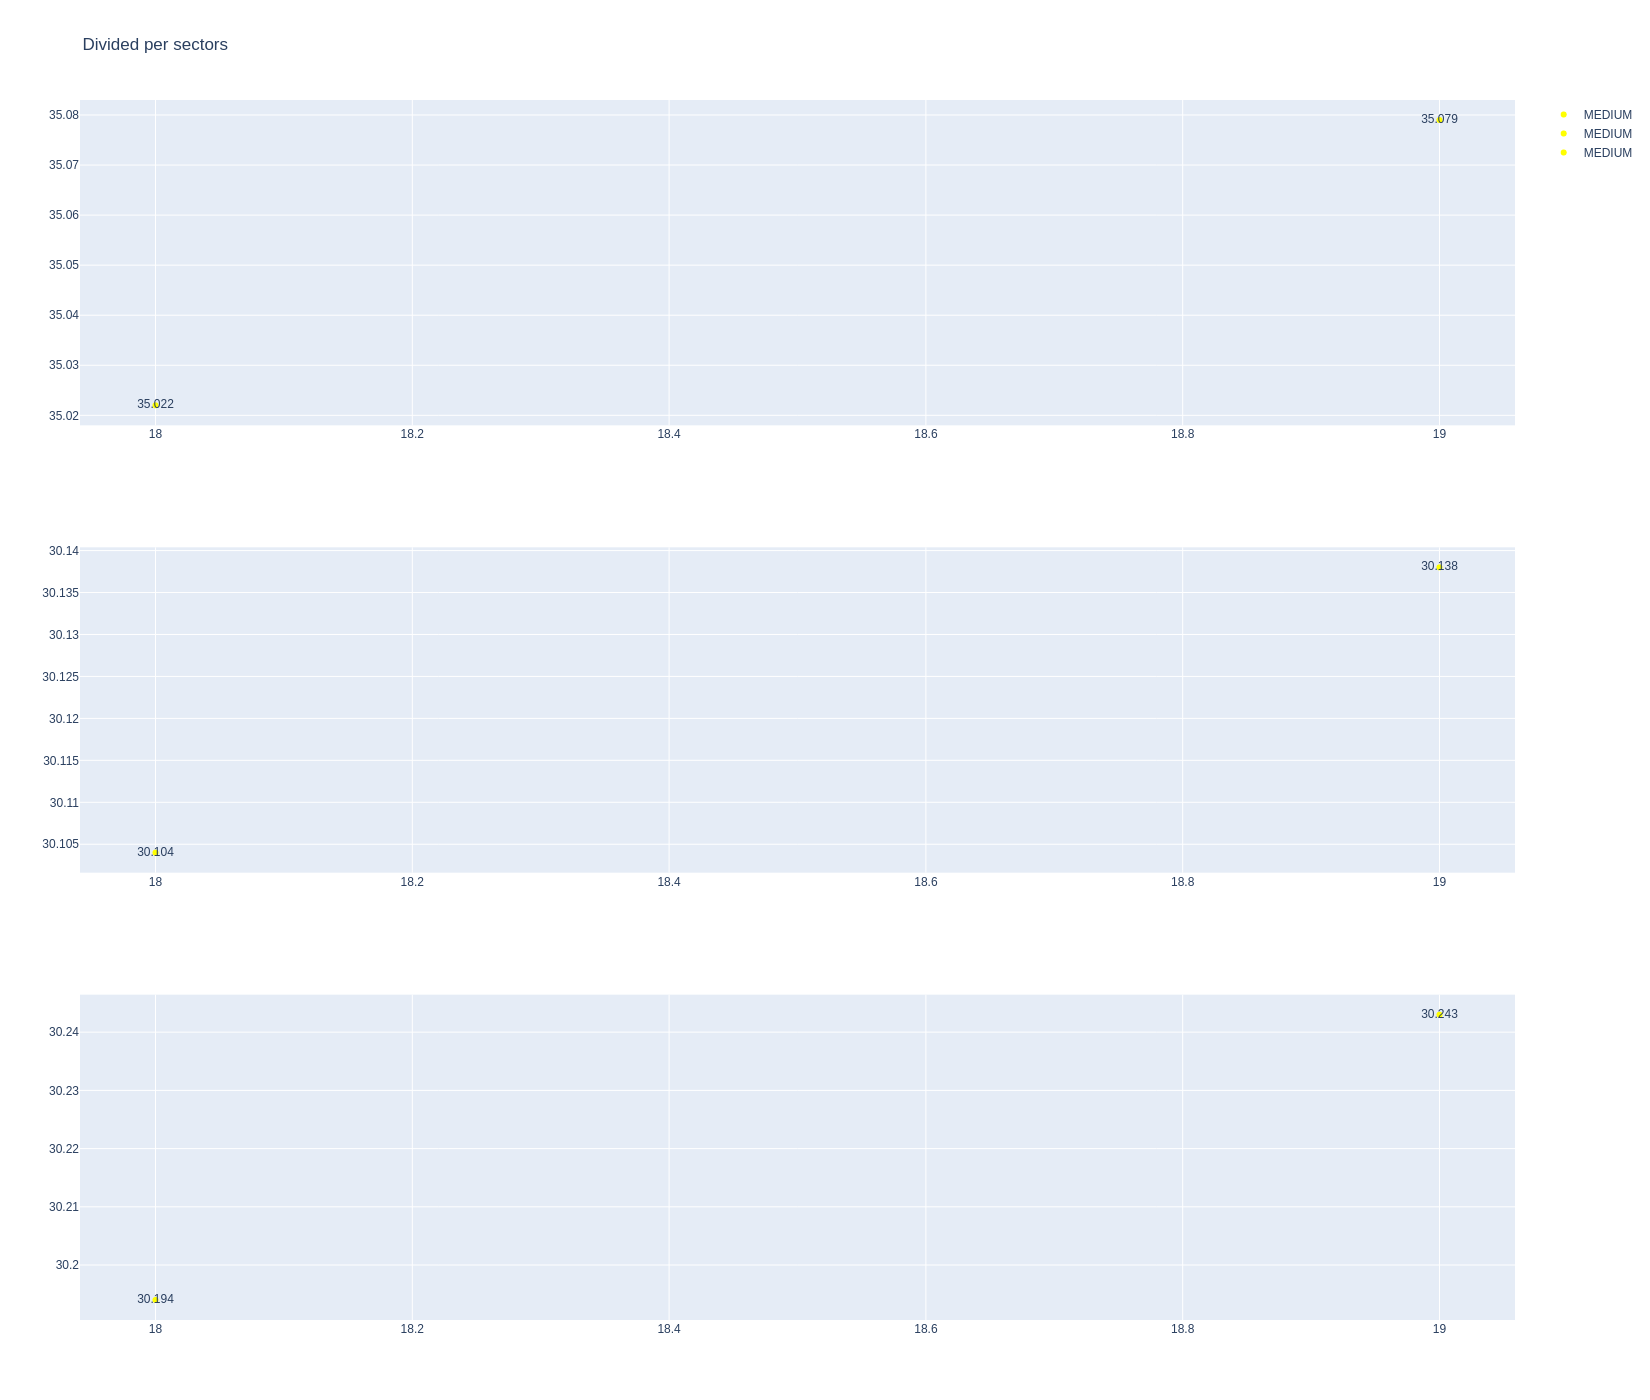

In [41]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [42]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
11         1258        10016             1             63          1        8   
19         1258        10016             1             12          1       11   
33         1258        10016             2             63          9       16   
48         1258        10016             2             12         12       15   
69         1258        10016             3             12         16       17   
80         1258        10016             3             63         17       20   
88         1258        10016             4             63         20       20   

   compound  tyre_age_at_start  
11   MEDIUM                0.0  
19   MEDIUM                0.0  
33     SOFT                0.0  
48     SOFT                0.0  
69     SOFT                4.0  
80   MEDIUM                7.0  
88   MEDIUM               10.0

In [112]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
24   George RUSSELL   MEDIUM  2025-04-18T17:02:44.370000+00:00           2   
323  George RUSSELL   MEDIUM  2025-04-18T17:49:07.070000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
24              33.010             28.499             32.970        94.479  
323             34.724             29.890             30.194        94.808

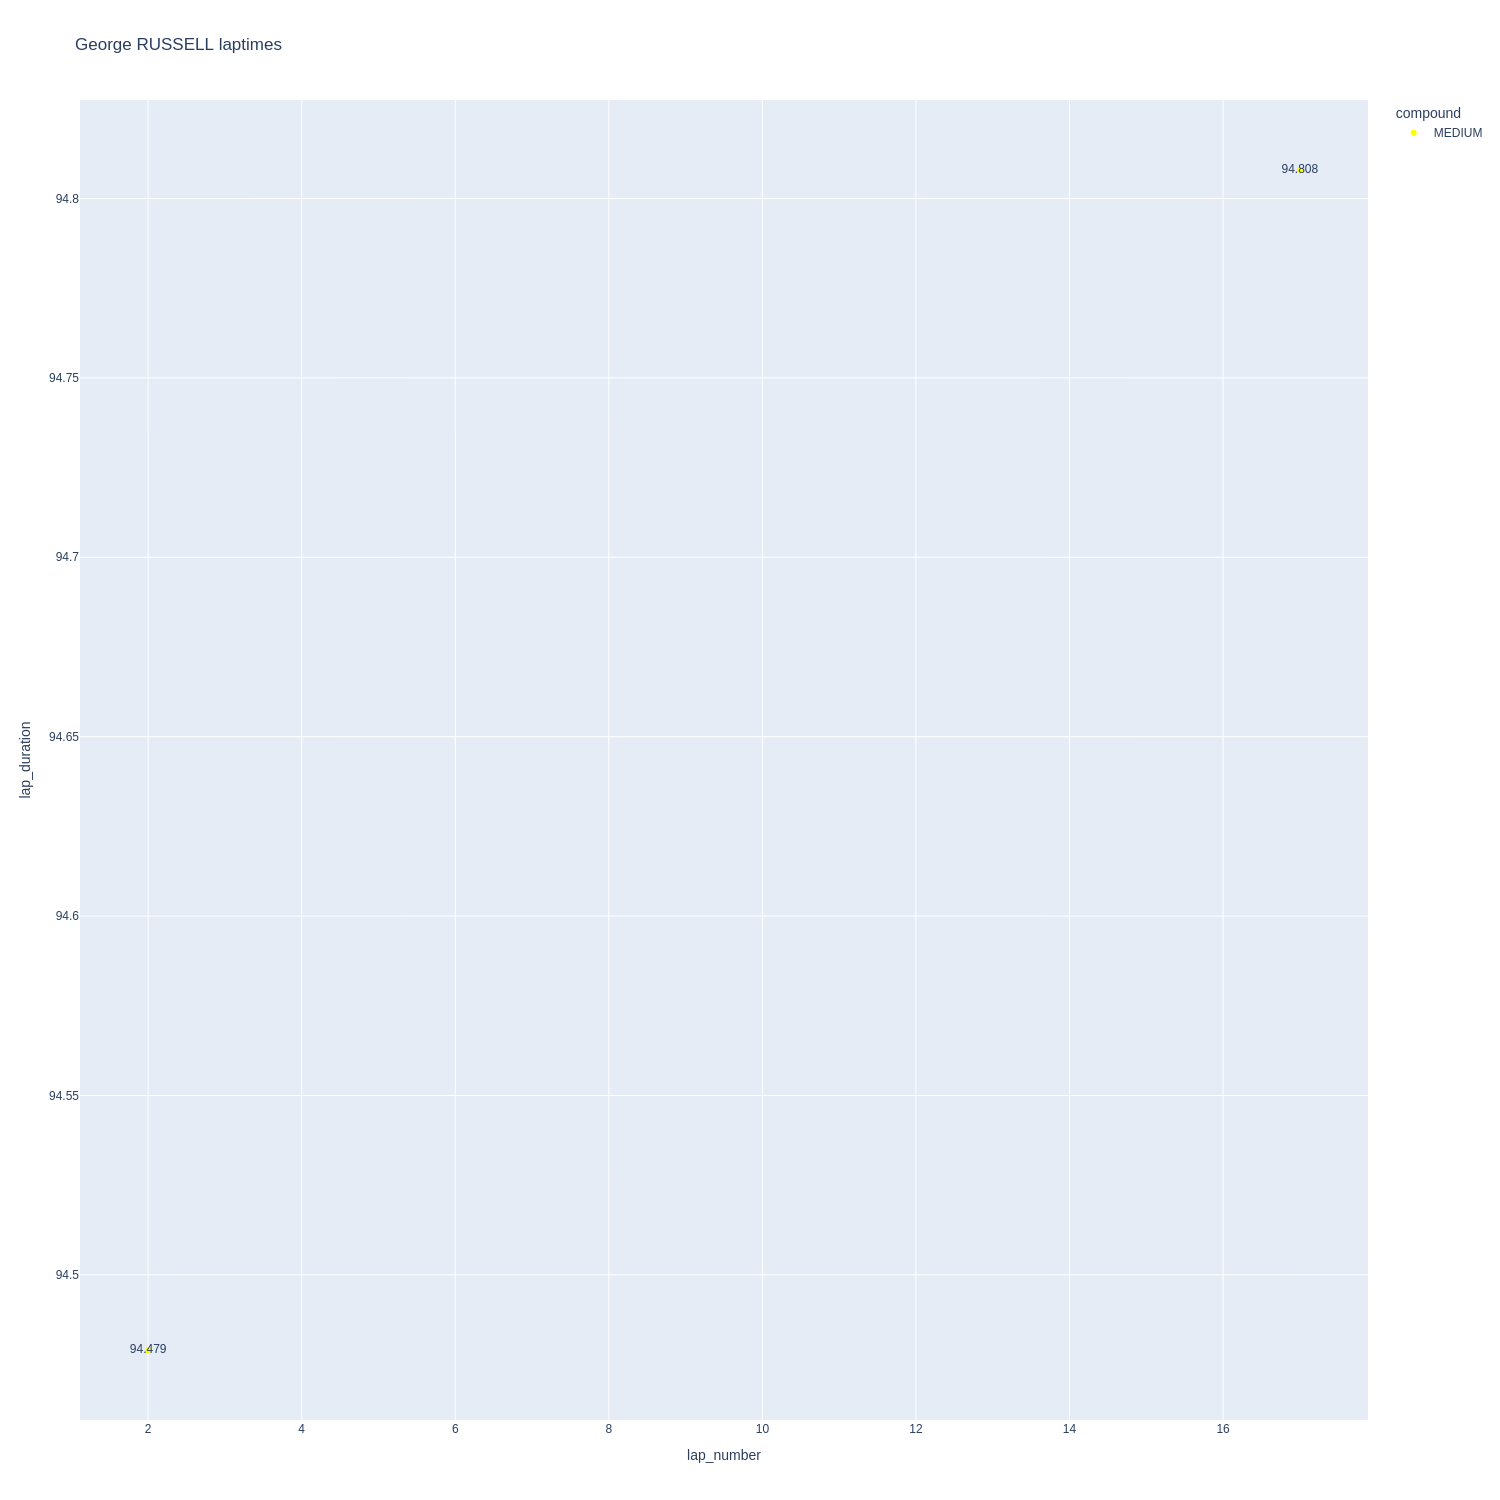

In [113]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

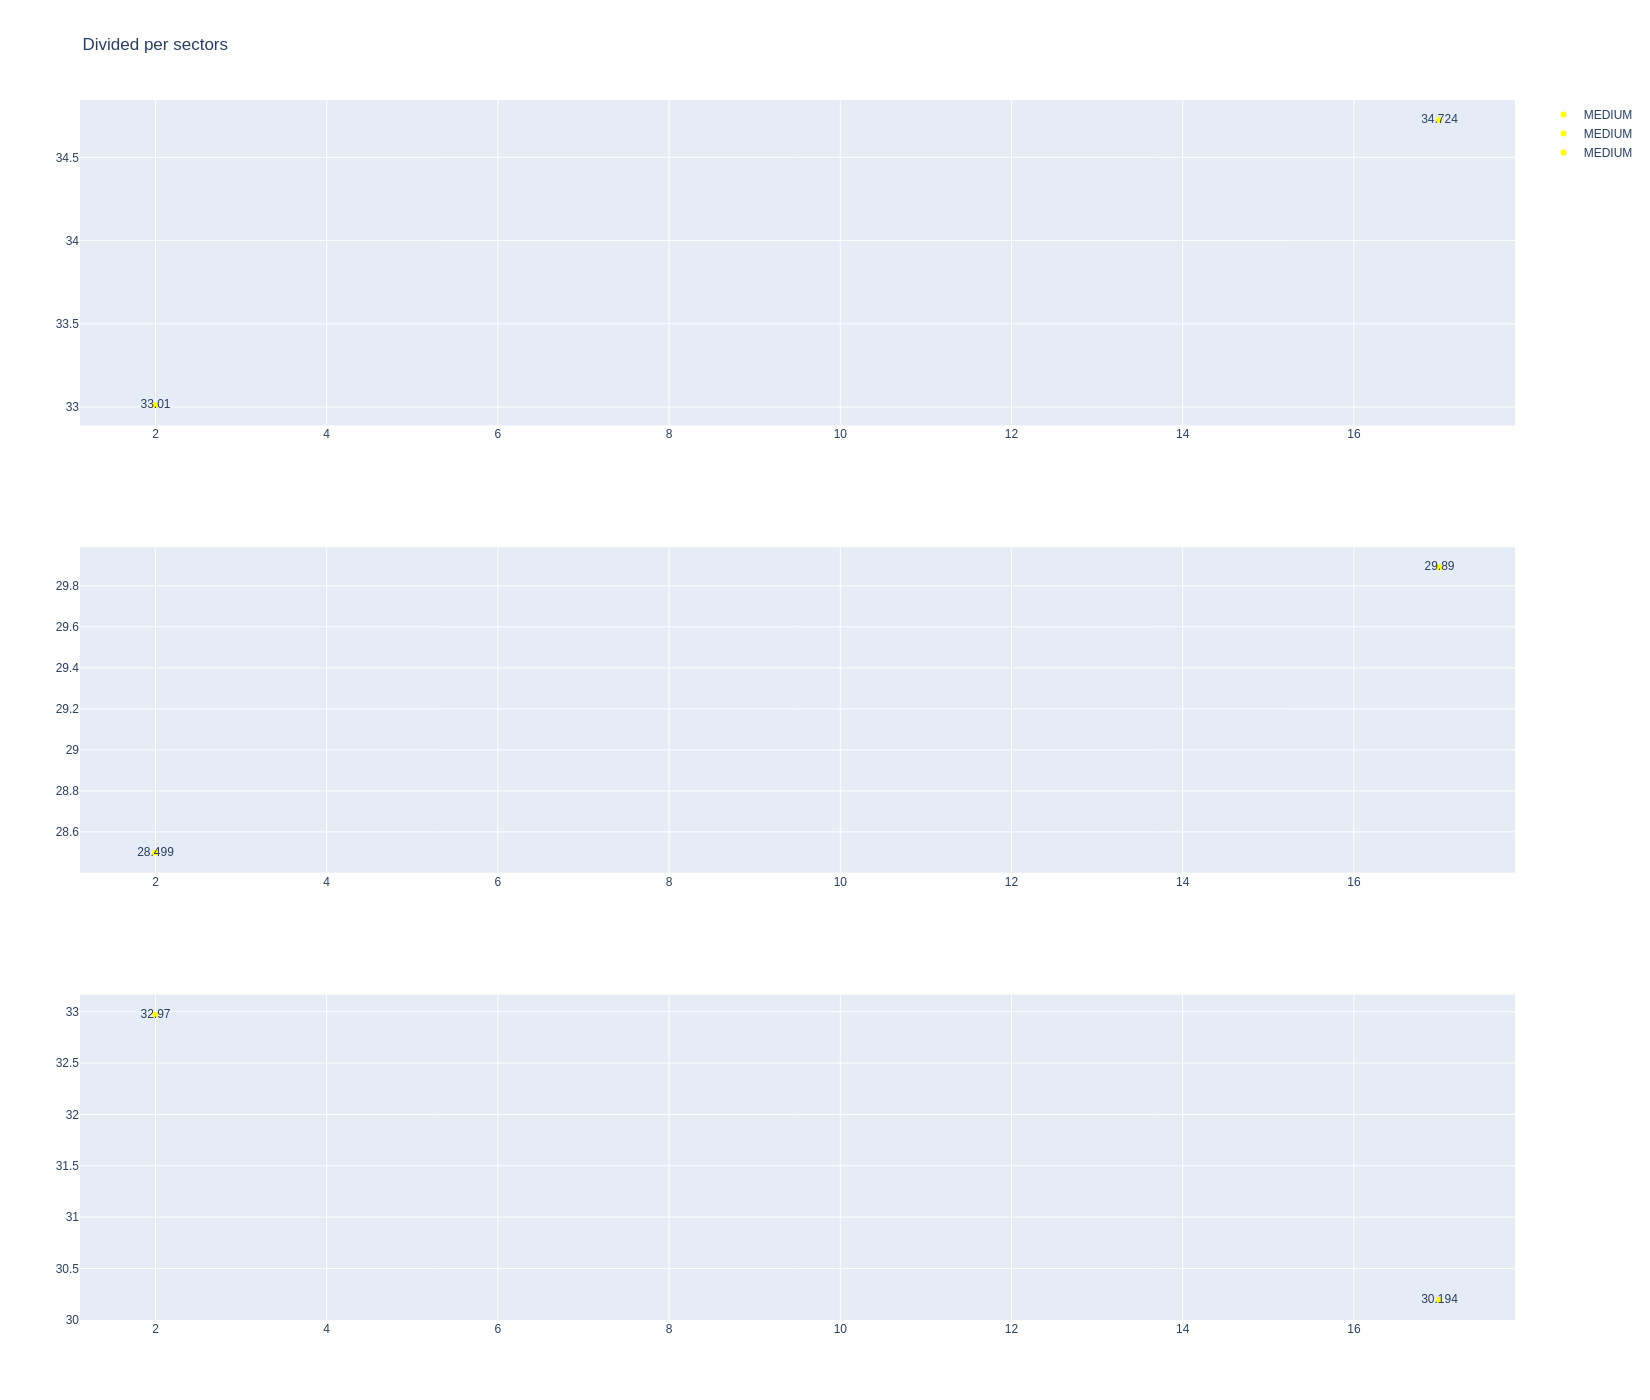

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [46]:
data = libraryDataF1.getinfolongruns(jointables2,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [47]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [48]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [49]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
12         1258        10016             1              4          1        9   
17         1258        10016             1             81          1        9   
34         1258        10016             2              4         10       12   
37         1258        10016             2             81         10       12   
50         1258        10016             3             81         13       14   
51         1258        10016             3              4         13       15   
66         1258        10016             4             81         15       21   
72         1258        10016             4              4         16       19   
85         1258        10016             5              4         20       20   
93         1258        10016             5             81         21       21   

   compound  tyre_age_at_start  
12   MEDIUM                0.0  
17   MEDIUM                0.0  
34     SOFT                0.0  
37     SOFT                0.0  
50     SOFT                0.0  
51     SOFT                3.0  
66   MEDIUM                0.0  
72     SOFT                8.0  
85     SOFT                0.0  
93     SOFT                5.0

In [50]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
312  Lando NORRIS     SOFT  2025-04-18T17:47:58.510000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
312             35.104             29.832             30.103        95.039

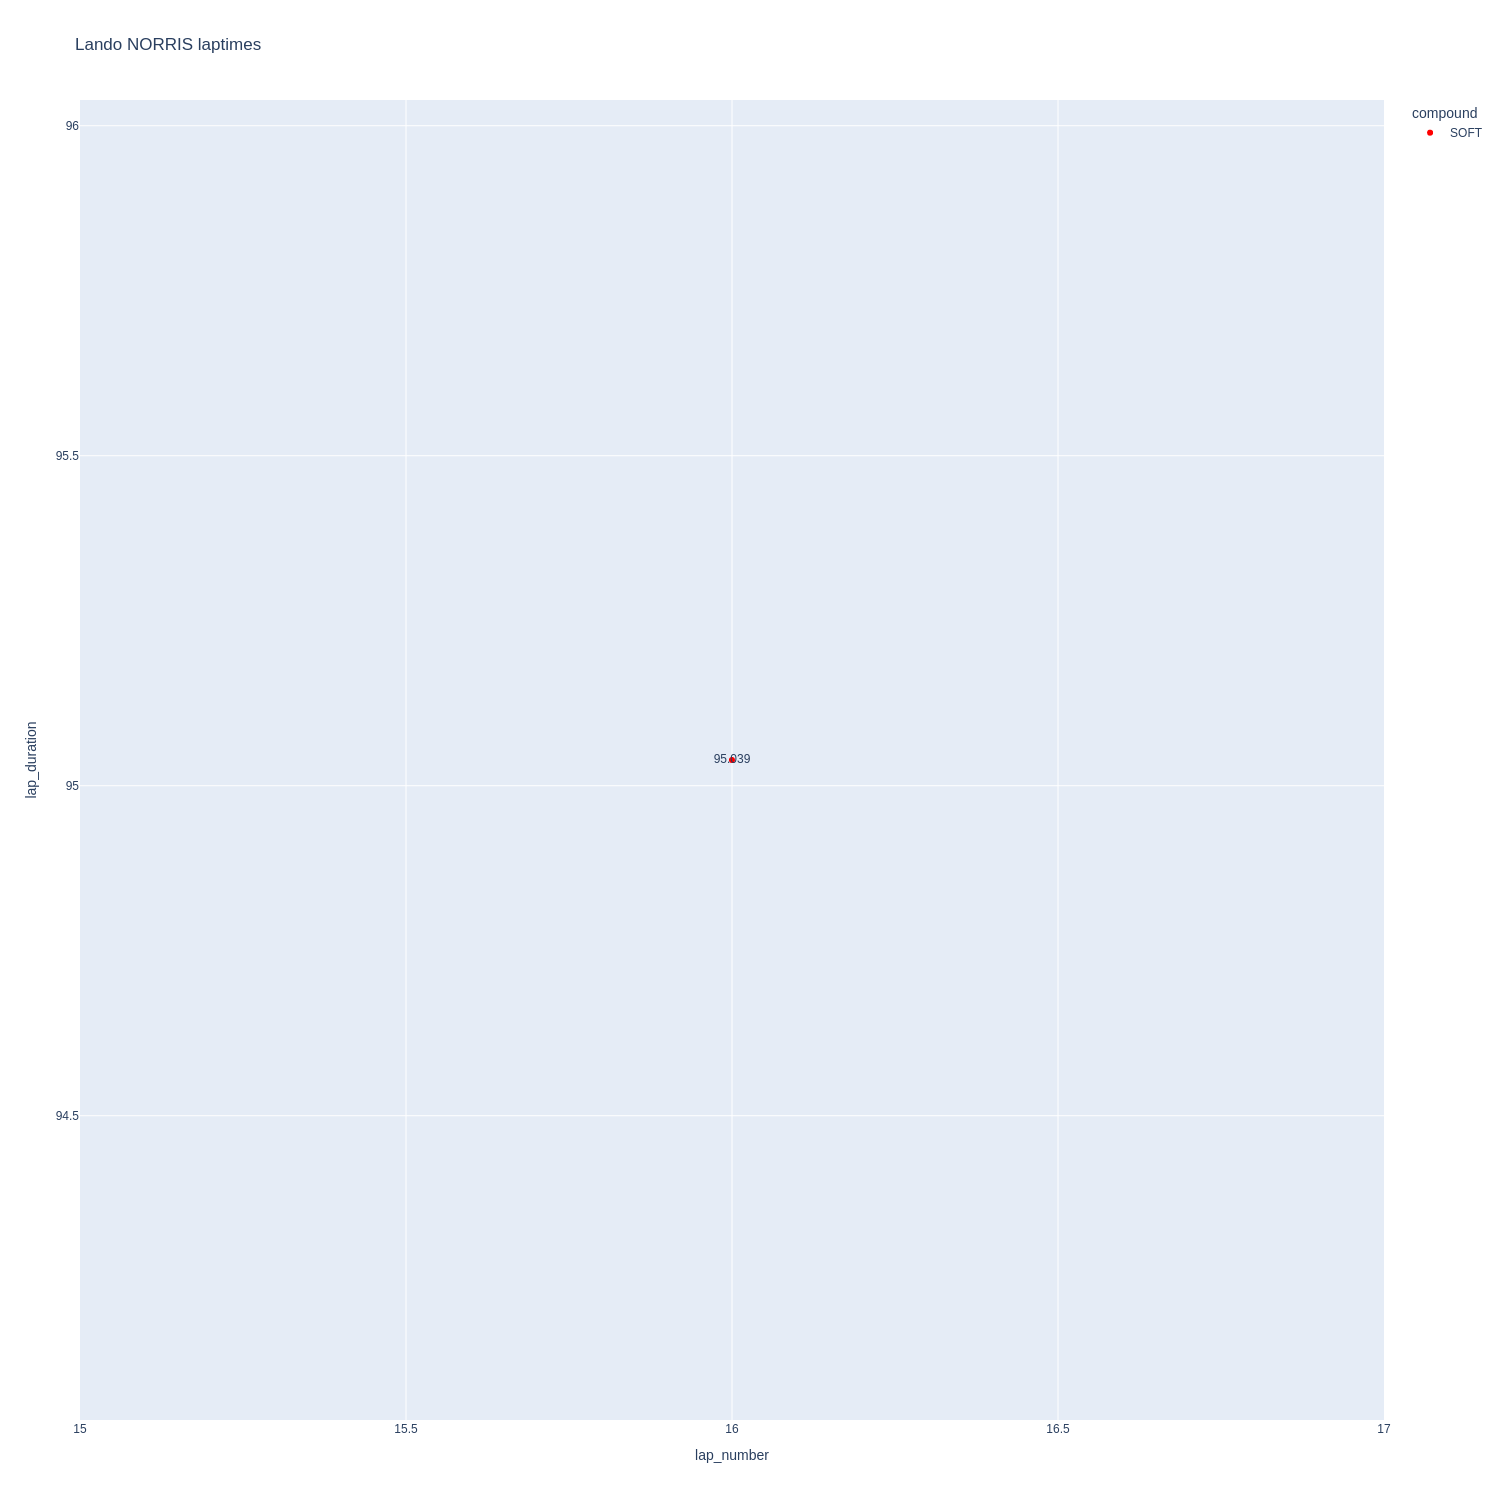

In [51]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

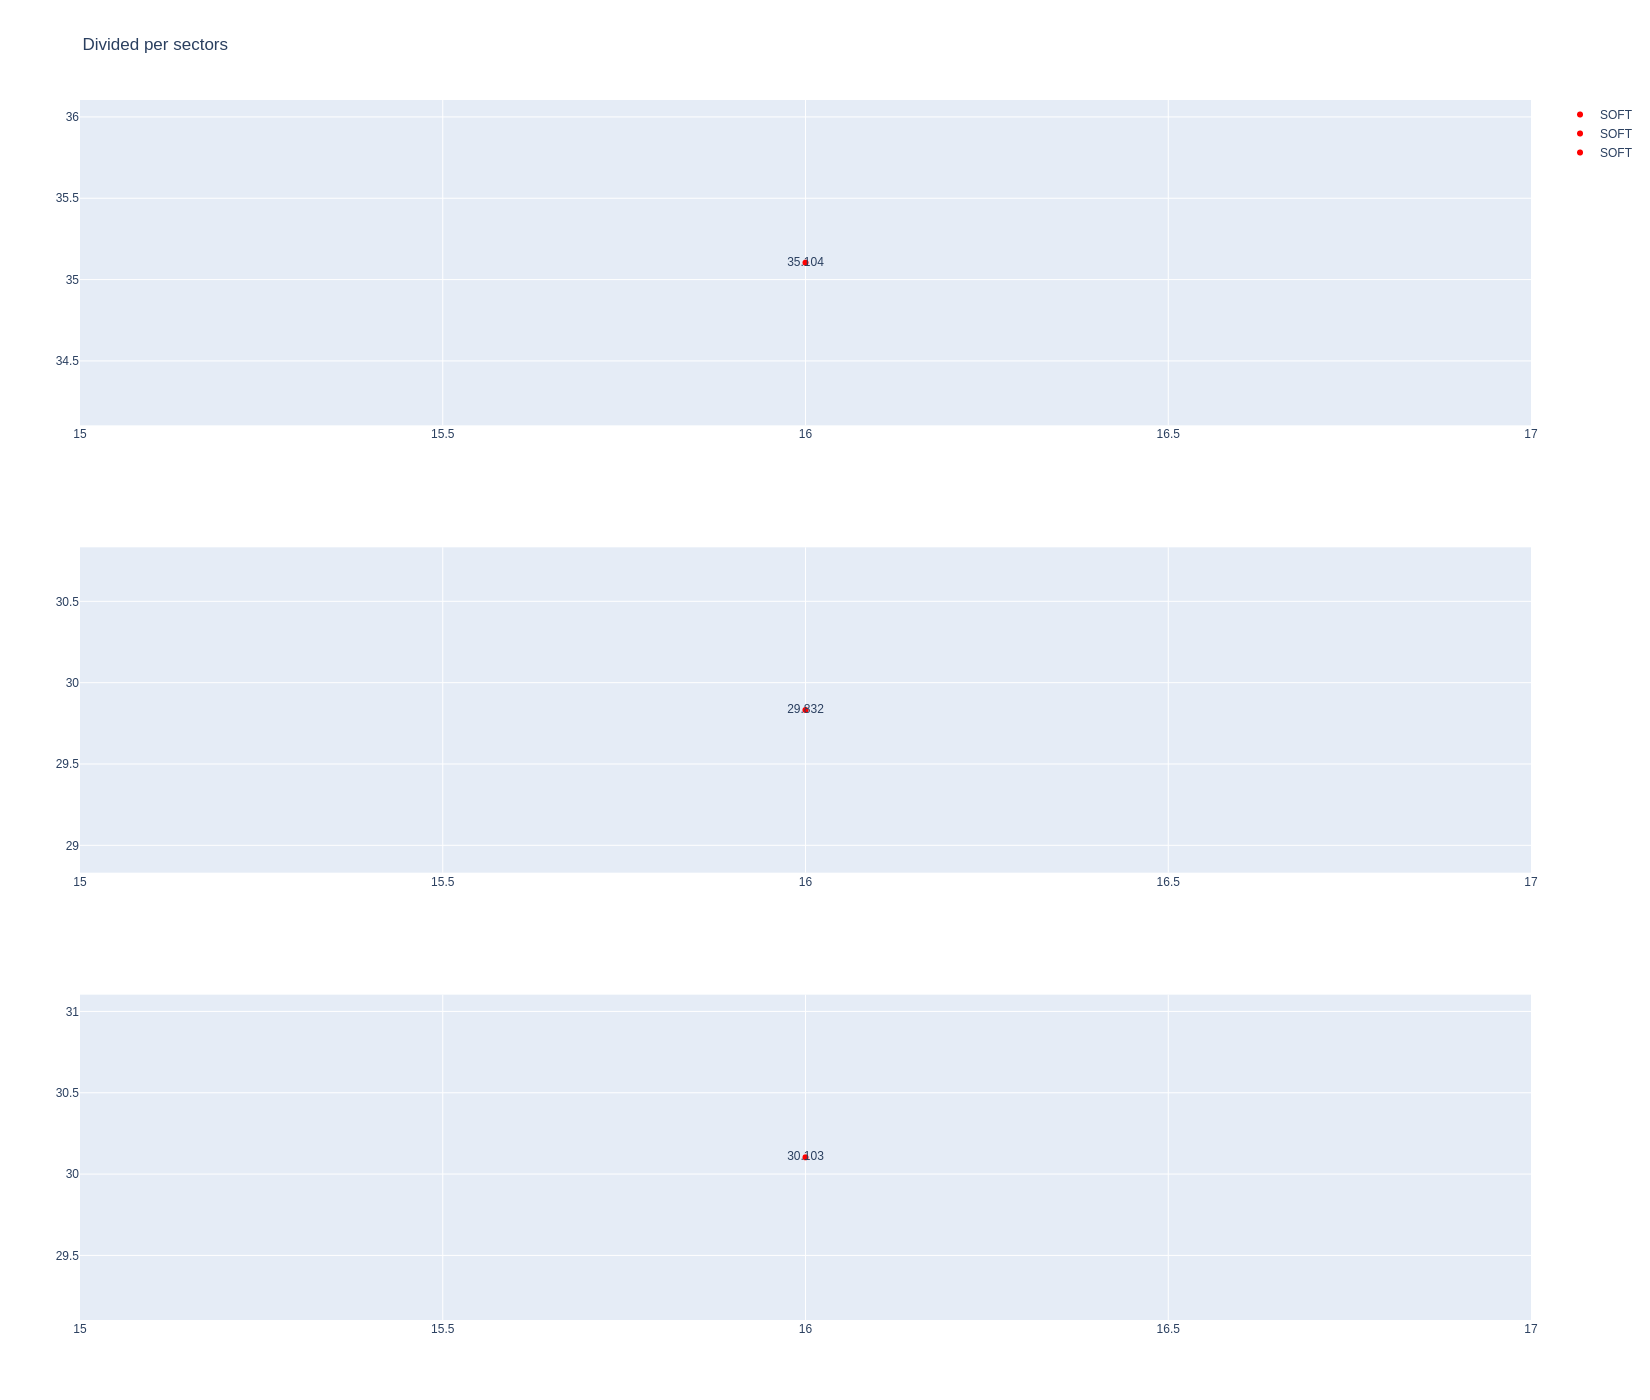

In [52]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [53]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
282  Oscar PIASTRI   MEDIUM  2025-04-18T17:44:09.284000+00:00          15   
292  Oscar PIASTRI   MEDIUM  2025-04-18T17:45:43.079000+00:00          16   
306  Oscar PIASTRI   MEDIUM  2025-04-18T17:47:16.823000+00:00          17   
321  Oscar PIASTRI   MEDIUM  2025-04-18T17:48:51.005000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
282             34.558             29.492             29.810        93.860  
292             34.495             29.560             29.740        93.795  
306             34.643             29.615             29.860        94.118  
321             34.532             29.604             29.888        94.024

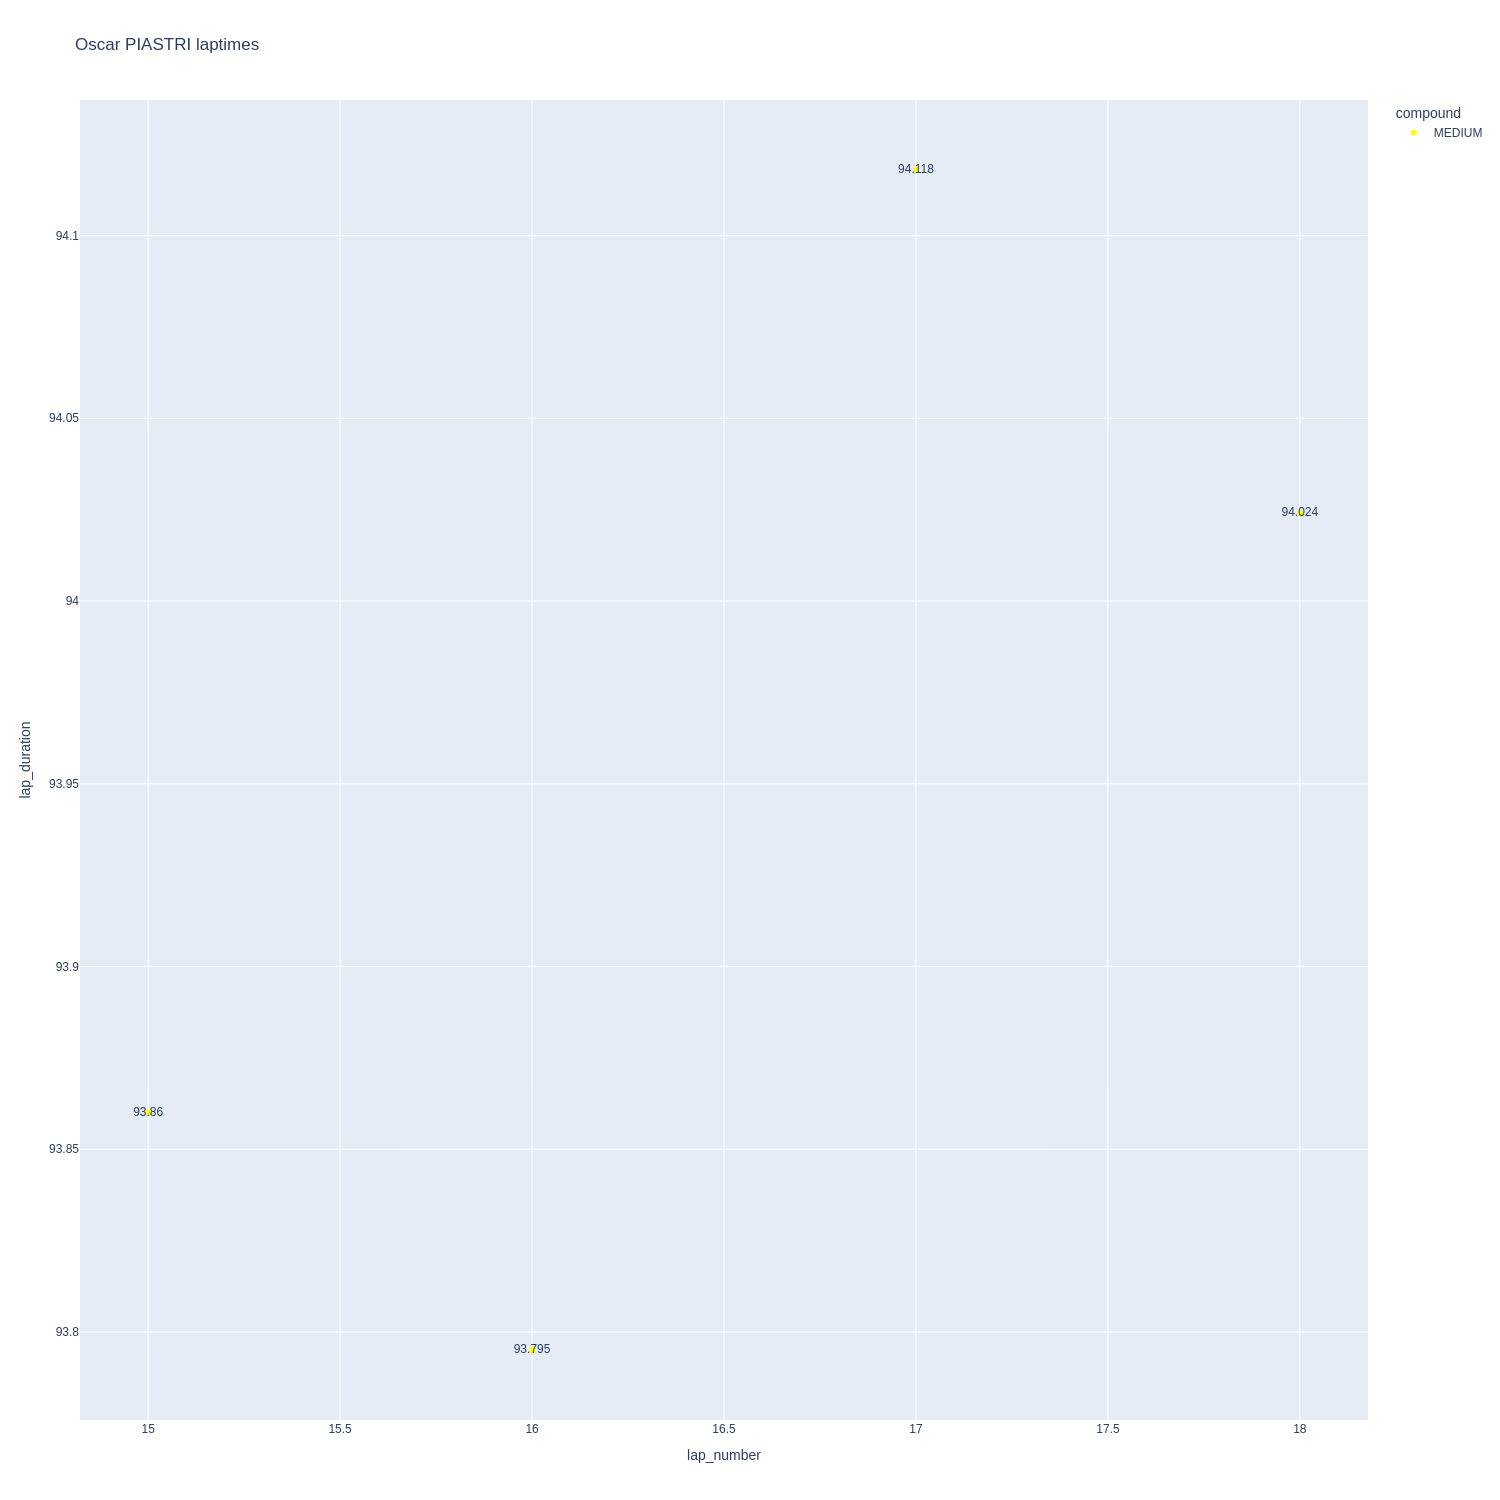

In [54]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

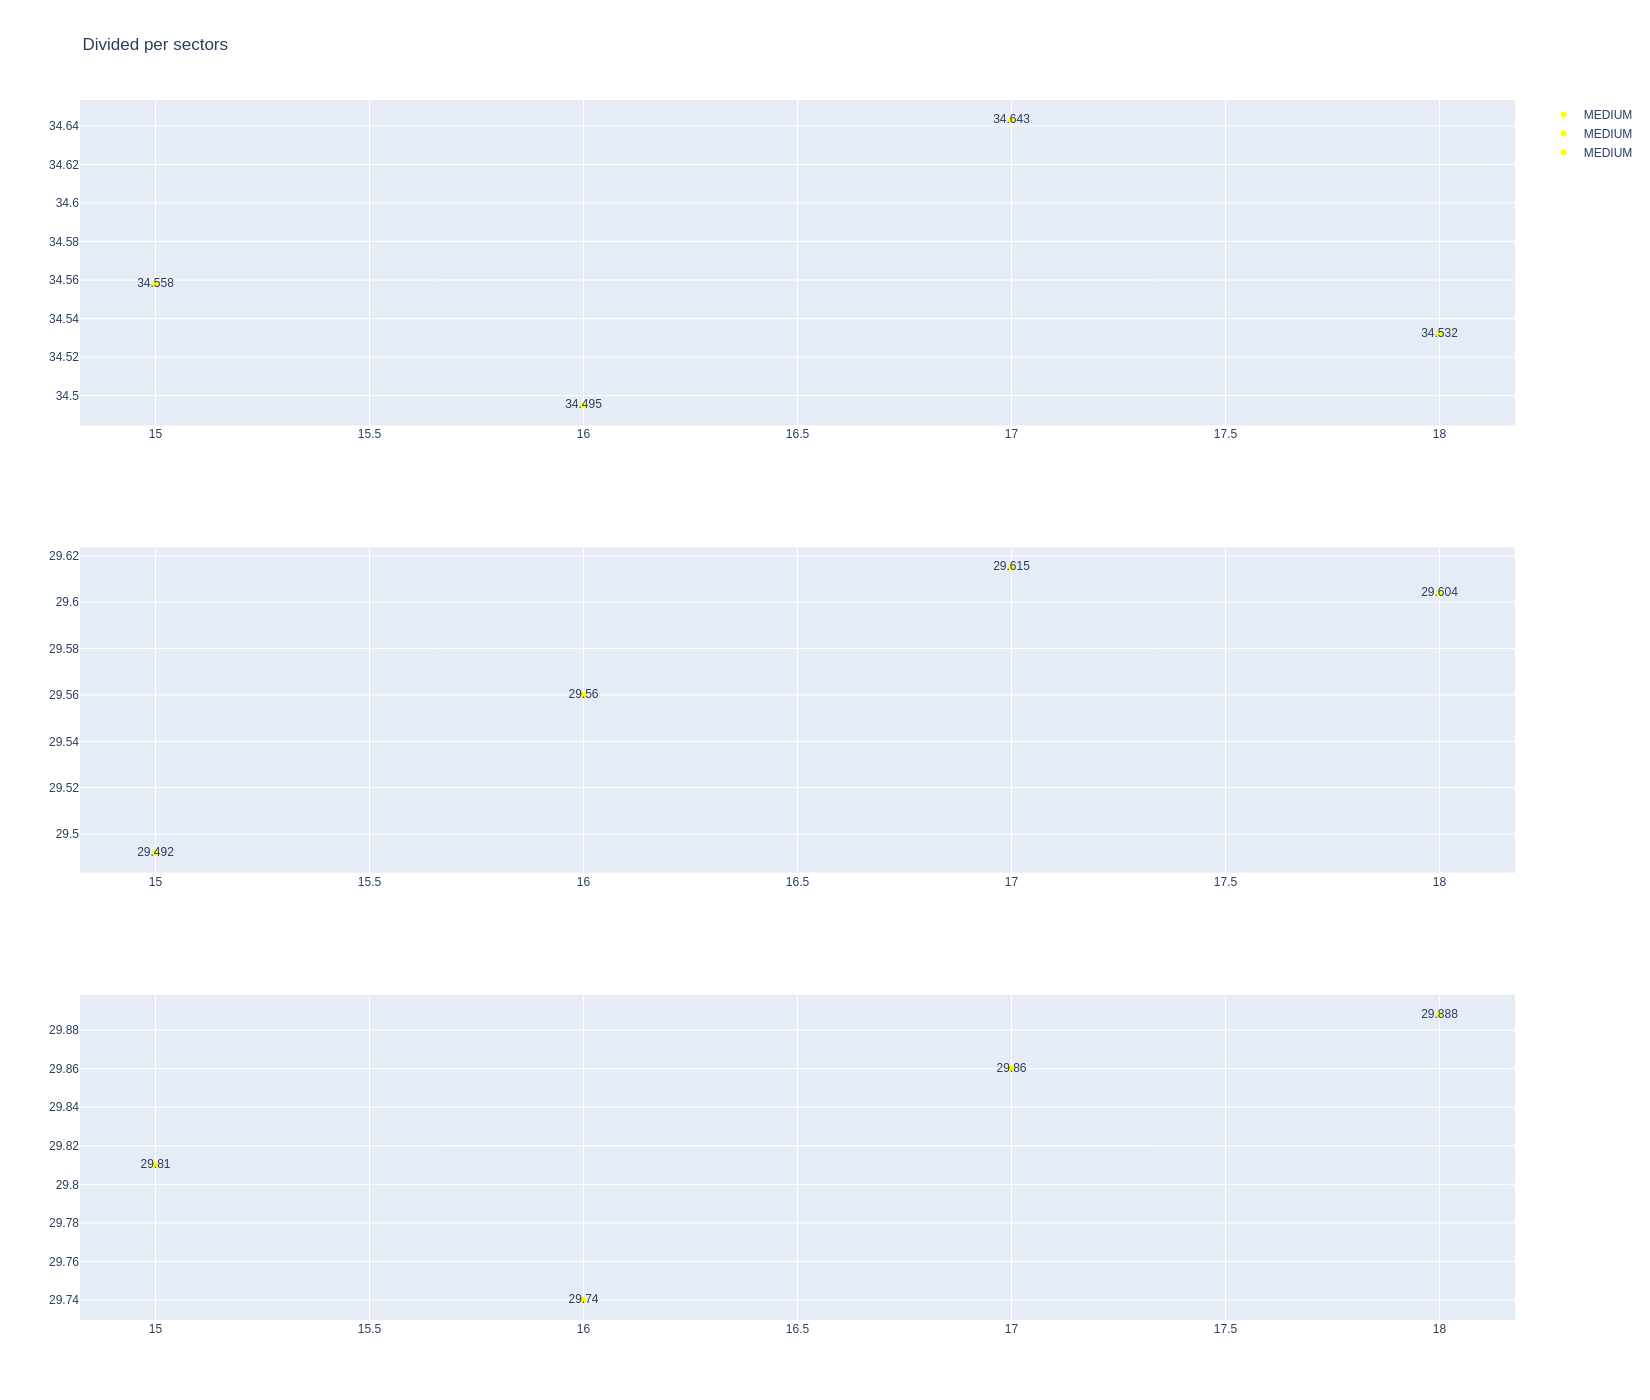

In [55]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [56]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
4          1258        10016             1             18          1        5   
9          1258        10016             1             14          1        8   
22         1258        10016             2             18          6        8   
31         1258        10016             2             14          9       12   
32         1258        10016             3             18          9       12   
52         1258        10016             3             14         13       15   
53         1258        10016             4             18         13       15   
67         1258        10016             4             14         16       16   
68         1258        10016             5             18         16       16   
76         1258        10016             5             14         17       17   
77         1258        10016             6             18         17       17   

   compound  tyre_age_at_start  
4    MEDIUM                0.0  
9    MEDIUM                0.0  
22     SOFT                0.0  
31     SOFT                0.0  
32     SOFT                3.0  
52     SOFT                7.0  
53     SOFT                7.0  
67   MEDIUM                7.0  
68     SOFT               10.0  
76   MEDIUM                0.0  
77     SOFT               11.0

In [57]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [58]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [59]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [60]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [61]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [62]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [63]:
stintInformation.query('driver_number == 30 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1          1258        10016             1             22          1        4   
6          1258        10016             1             30          1        6   
20         1258        10016             2             22          5        7   
25         1258        10016             2             30          7        9   
27         1258        10016             3             22          8       10   
35         1258        10016             3             30         10       12   
44         1258        10016             4             22         11       14   
56         1258        10016             4             30         13       16   
61         1258        10016             5             22         15       16   
78         1258        10016             6             22         17       20   
79         1258        10016             5             30         17       20   
91         1258        10016             6             30         21       21   

   compound  tyre_age_at_start  
1    MEDIUM                0.0  
6    MEDIUM                0.0  
20   MEDIUM                3.0  
25     SOFT                0.0  
27   MEDIUM                6.0  
35     SOFT                3.0  
44     SOFT                0.0  
56     SOFT                0.0  
61     SOFT                4.0  
78   MEDIUM                0.0  
79   MEDIUM                0.0  
91   MEDIUM                9.0

In [64]:
data = libraryDataF1.getinfolongruns(jointables2,30,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [65]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [66]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [67]:
data = libraryDataF1.getinfolongruns(jointables2,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
315  Isack HADJAR   MEDIUM  2025-04-18T17:48:07.979000+00:00          16   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
315             35.434             30.104             30.281        95.819

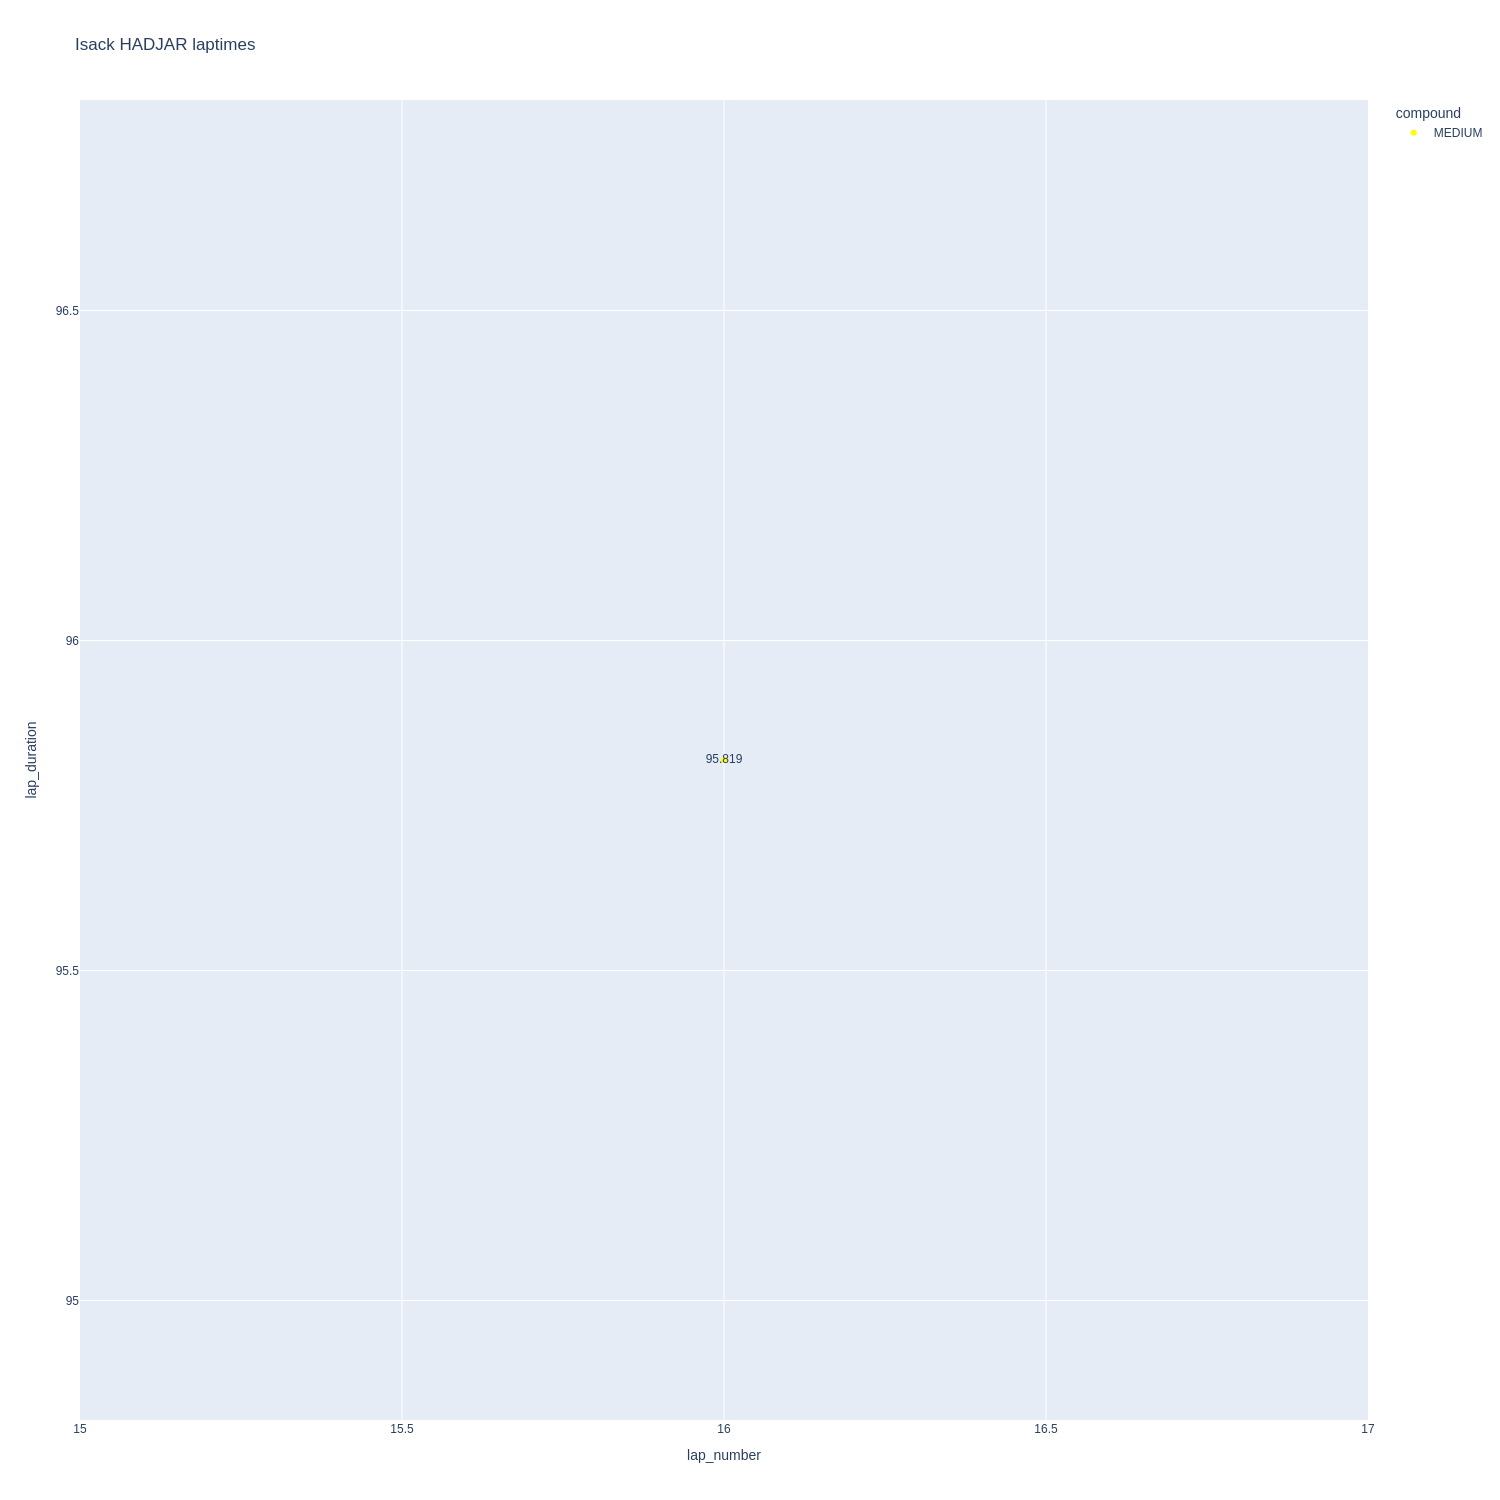

In [68]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

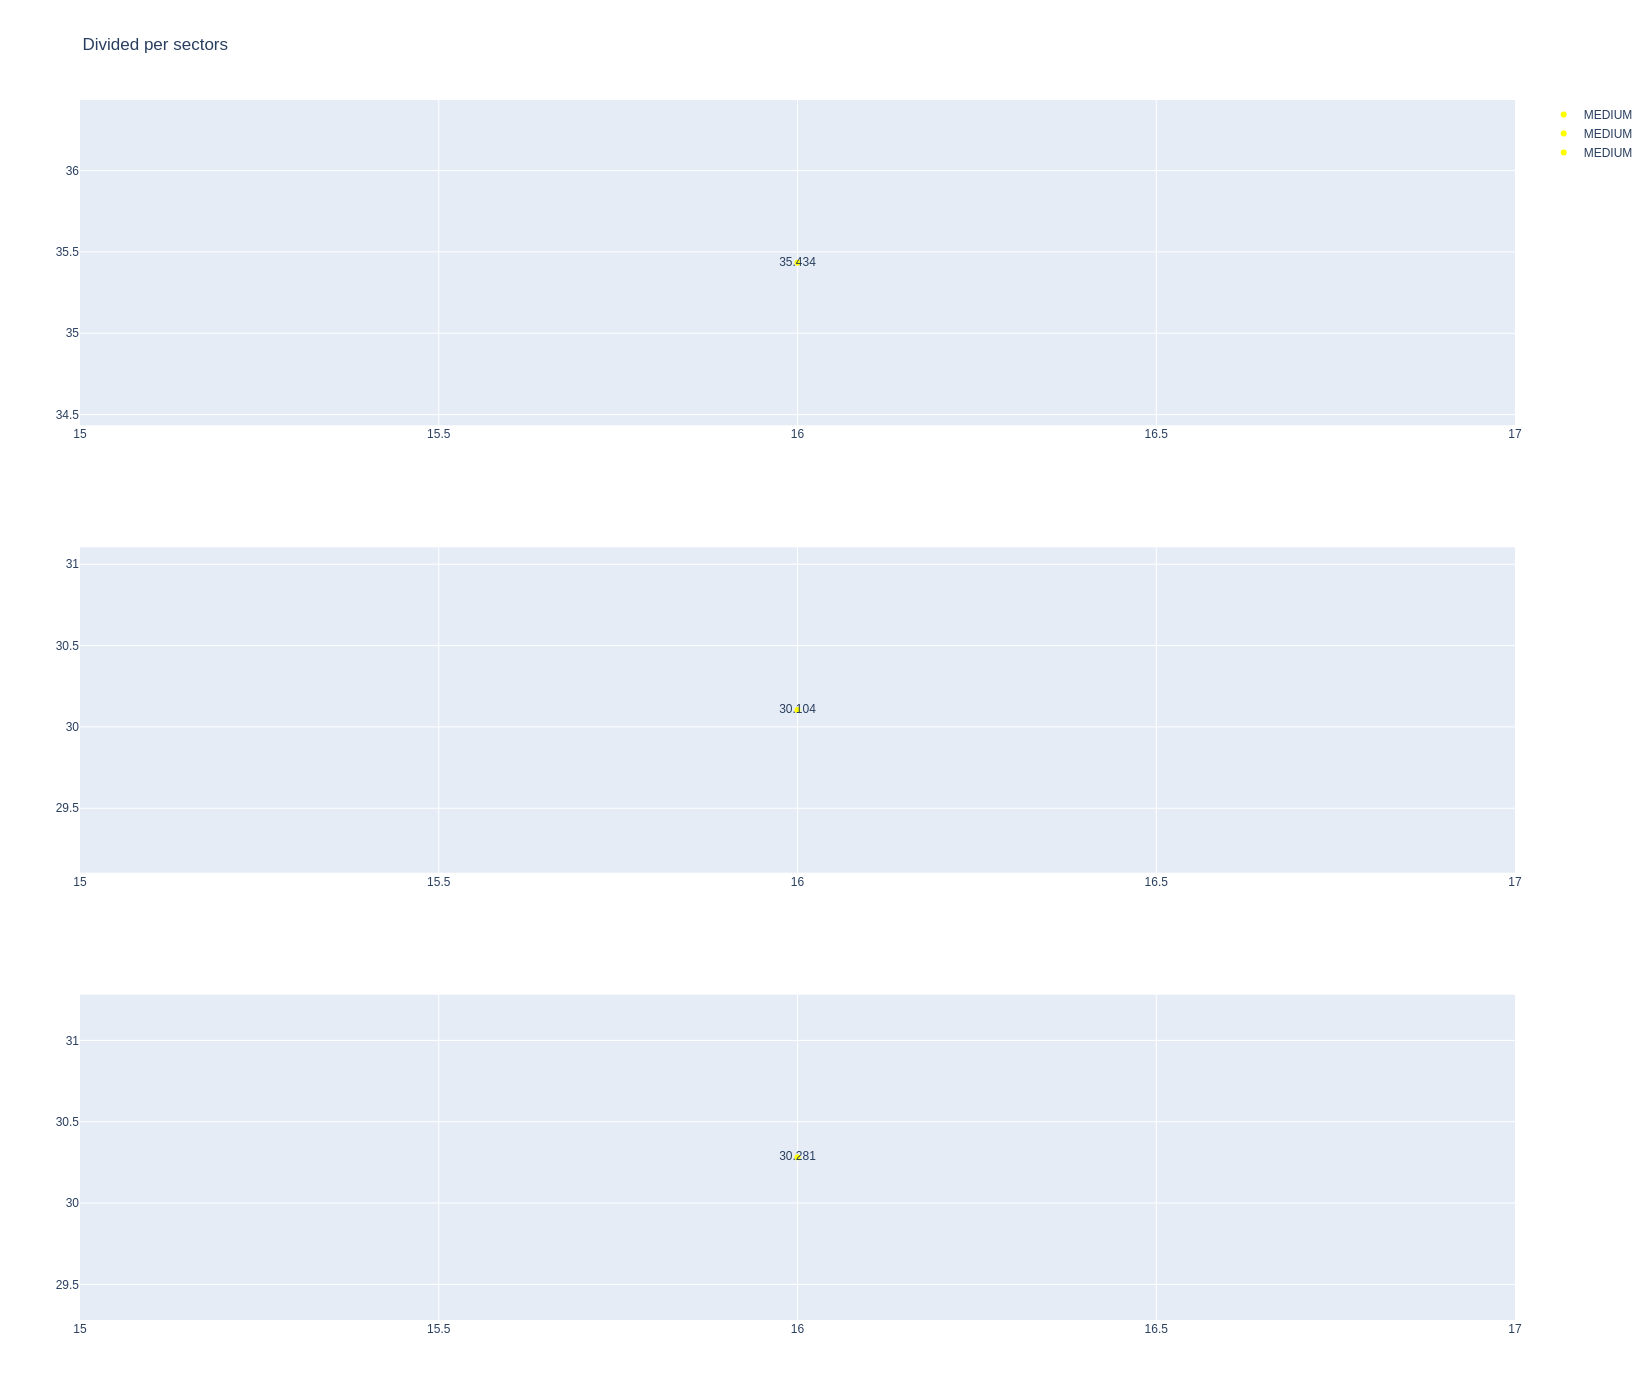

In [69]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [70]:
stintInformation.query('driver_number == 87 or driver_number == 31')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
7          1258        10016             1             87          1        6   
15         1258        10016             1             31          1        9   
26         1258        10016             2             87          7        9   
36         1258        10016             2             31         10       12   
38         1258        10016             3             87         10       12   
54         1258        10016             3             31         13       15   
55         1258        10016             4             87         13       15   
70         1258        10016             5             87         16       17   
74         1258        10016             4             31         16       21   
83         1258        10016             6             87         18       18   
92         1258        10016             5             31         21       21   

   compound  tyre_age_at_start  
7    MEDIUM                0.0  
15   MEDIUM                0.0  
26   MEDIUM                5.0  
36     SOFT                0.0  
38     SOFT                0.0  
54     SOFT                3.0  
55     SOFT                3.0  
70   MEDIUM                8.0  
74     SOFT                6.0  
83   MEDIUM               10.0  
92   MEDIUM                8.0

In [71]:
data = libraryDataF1.getinfolongruns(jointables2,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [72]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [73]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [74]:
data = libraryDataF1.getinfolongruns(jointables2,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


full_name compound                        date_start  lap_number  \
288  Esteban OCON     SOFT  2025-04-18T17:45:25.709000+00:00          16   
301  Esteban OCON     SOFT  2025-04-18T17:47:00.985000+00:00          17   
317  Esteban OCON     SOFT  2025-04-18T17:48:36.443000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
288             34.829             30.173             30.248        95.250  
301             35.158             30.076             30.344        95.578  
317             35.298             30.241             30.306        95.845

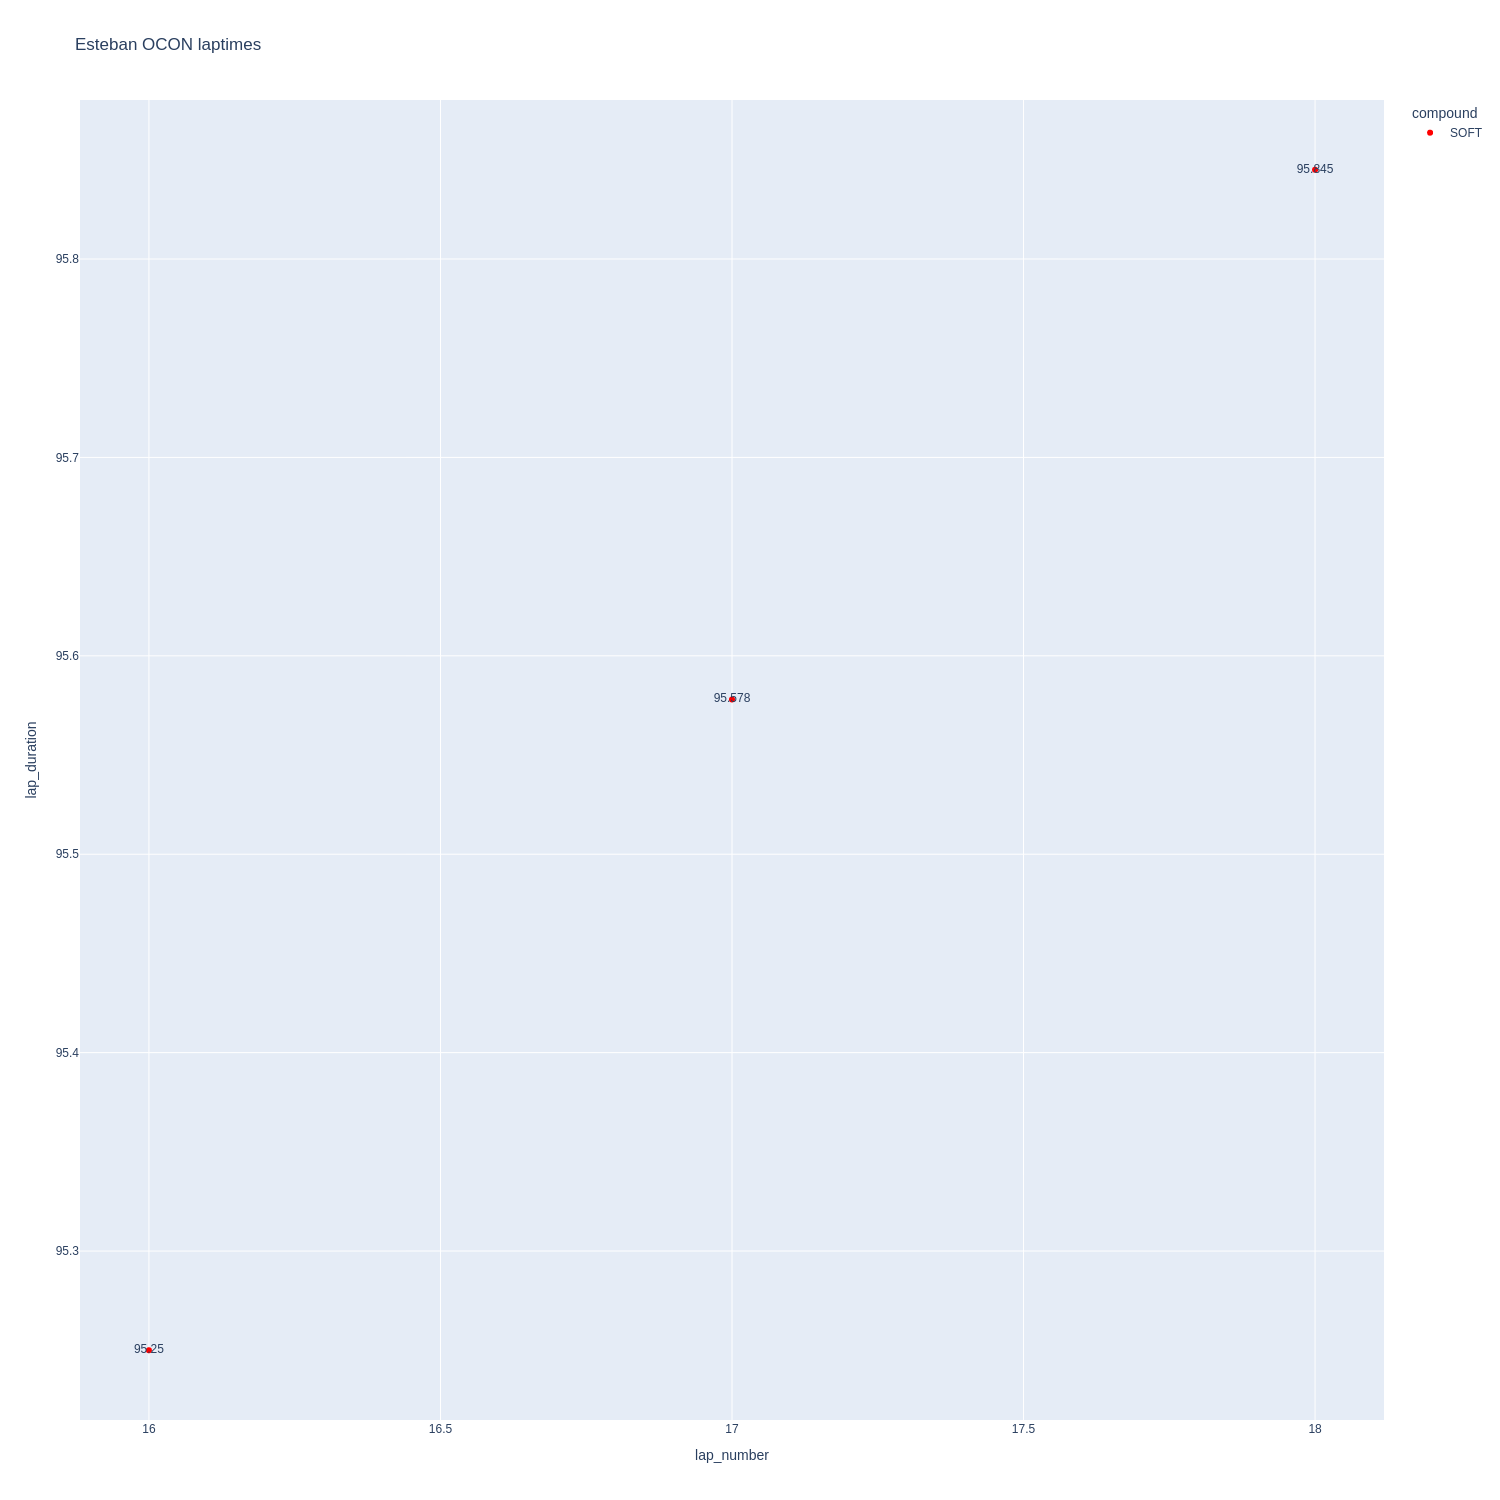

In [75]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

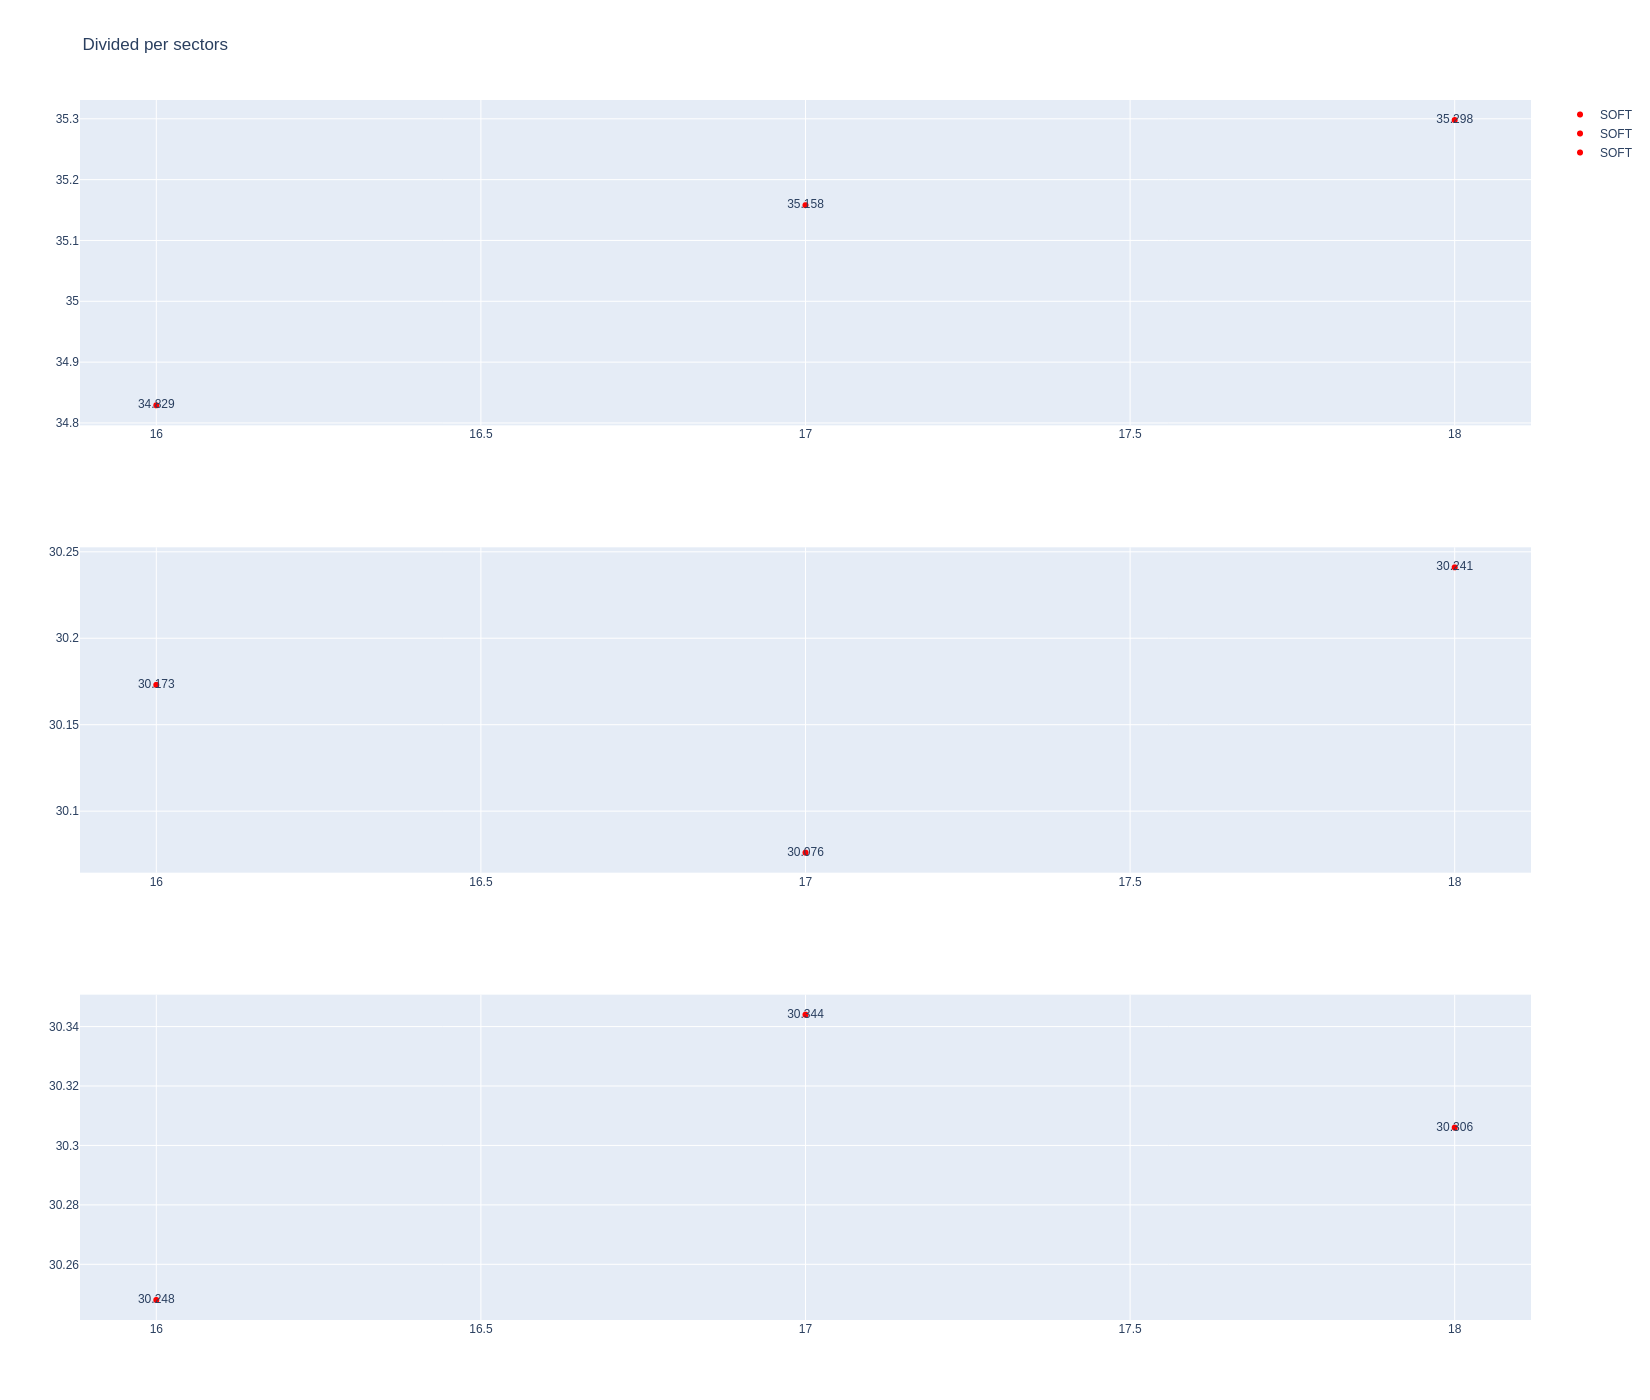

In [76]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [77]:
stintInformation.query('driver_number == 10 or driver_number == 7')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1258        10016             1              7          1        6   
13         1258        10016             1             10          1        9   
24         1258        10016             2              7          7        9   
39         1258        10016             2             10         10       13   
42         1258        10016             3              7         10       14   
57         1258        10016             3             10         14       15   
64         1258        10016             4              7         15       19   
73         1258        10016             4             10         16       21   
86         1258        10016             5              7         20       20   
89         1258        10016             5             10         21       21   

   compound  tyre_age_at_start  
5    MEDIUM                0.0  
13   MEDIUM                0.0  
24   MEDIUM                5.0  
39     SOFT                0.0  
42     SOFT                0.0  
57     SOFT                4.0  
64   MEDIUM                8.0  
73   MEDIUM                8.0  
86   MEDIUM                0.0  
89   MEDIUM               13.0

In [78]:
data =libraryDataF1.getinfolongruns(jointables2,7,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
295  Jack DOOHAN   MEDIUM  2025-04-18T17:46:03.898000+00:00          15   
309  Jack DOOHAN   MEDIUM  2025-04-18T17:47:39.188000+00:00          16   
325  Jack DOOHAN   MEDIUM  2025-04-18T17:49:14.398000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
295             35.060             30.133             30.098        95.291  
309             34.974             29.892             30.204        95.070  
325             35.209             29.913             30.387        95.509

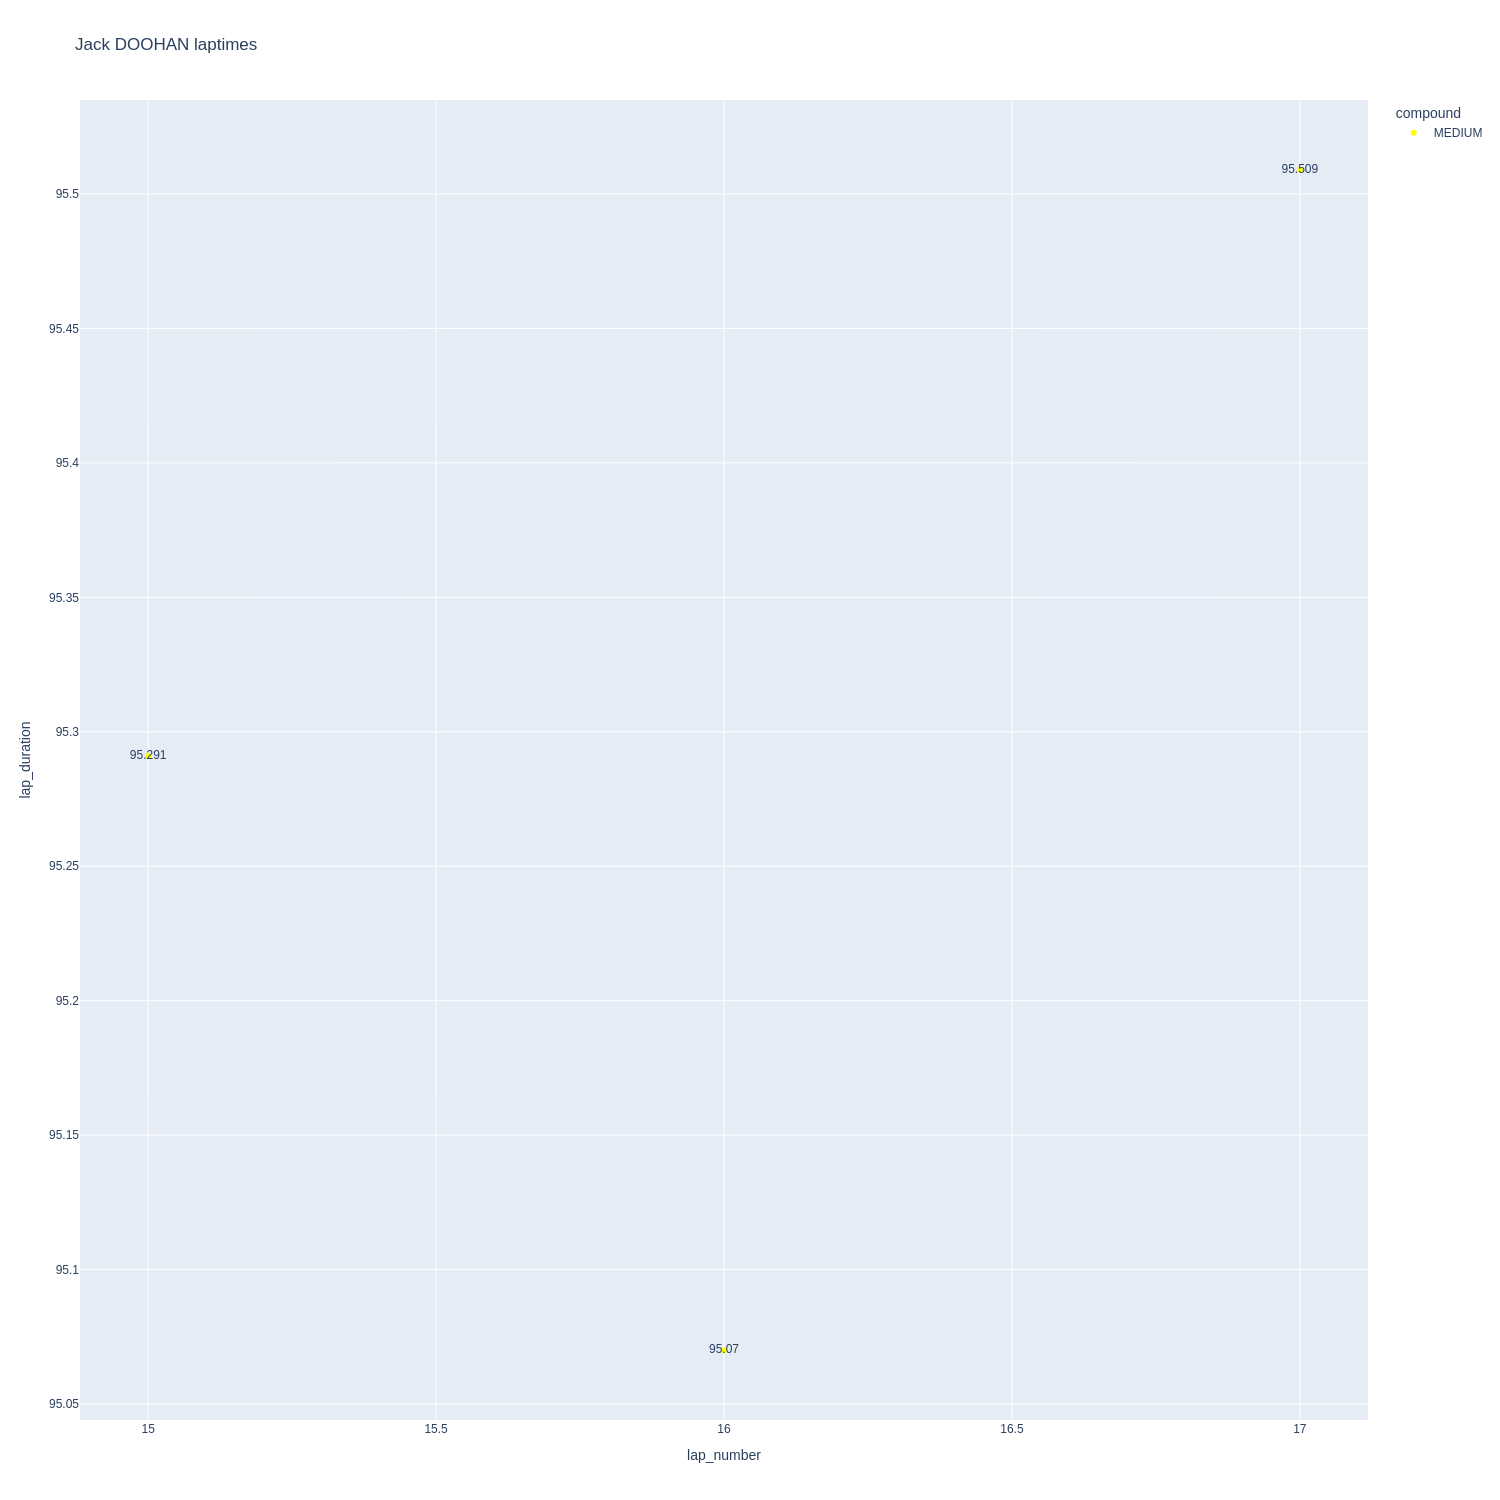

In [79]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

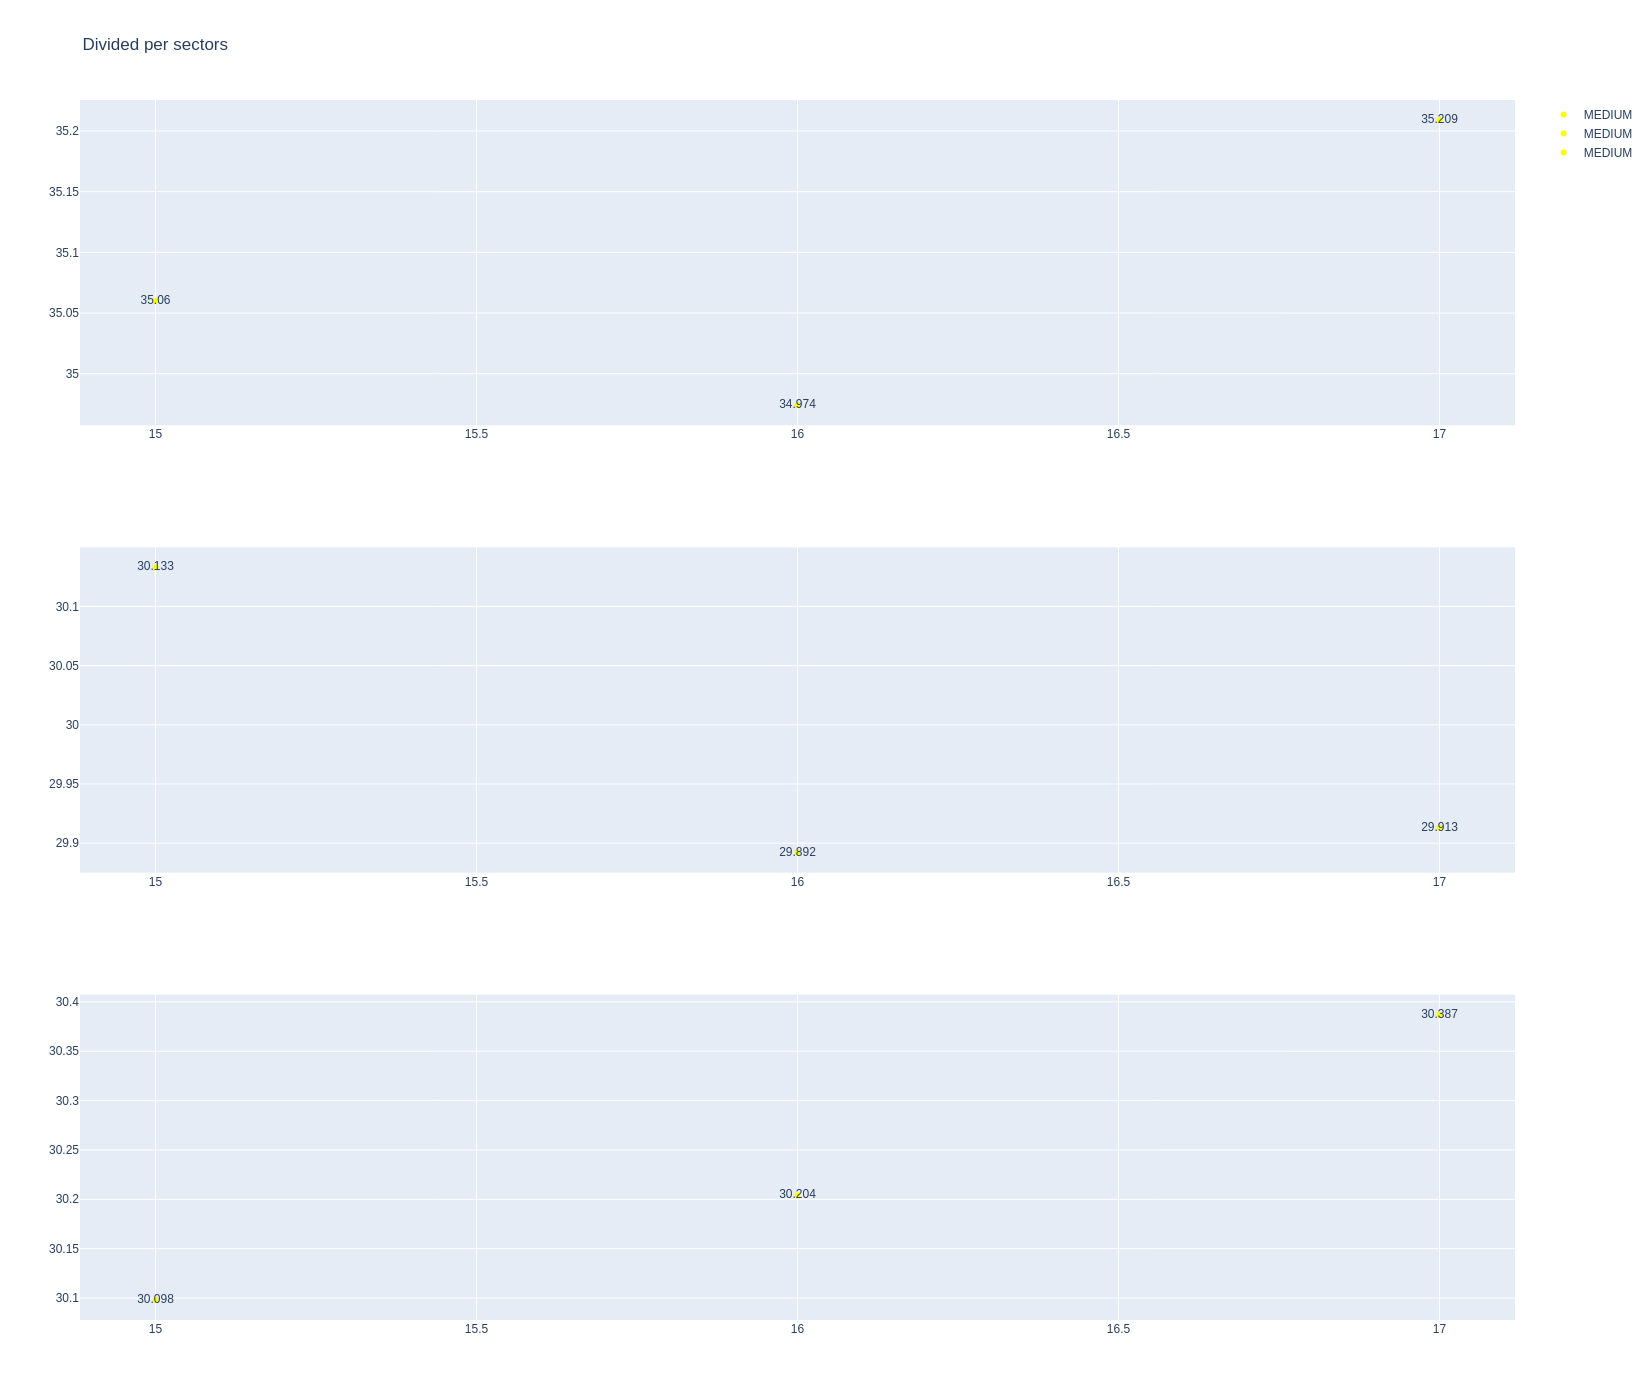

In [80]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [81]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
286  Pierre GASLY   MEDIUM  2025-04-18T17:45:19.504000+00:00          16   
300  Pierre GASLY   MEDIUM  2025-04-18T17:46:53.766000+00:00          17   
316  Pierre GASLY   MEDIUM  2025-04-18T17:48:28.271000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
286             34.794             29.743             29.810        94.347  
300             34.783             29.813             29.864        94.460  
316             35.026             29.910             29.875        94.811

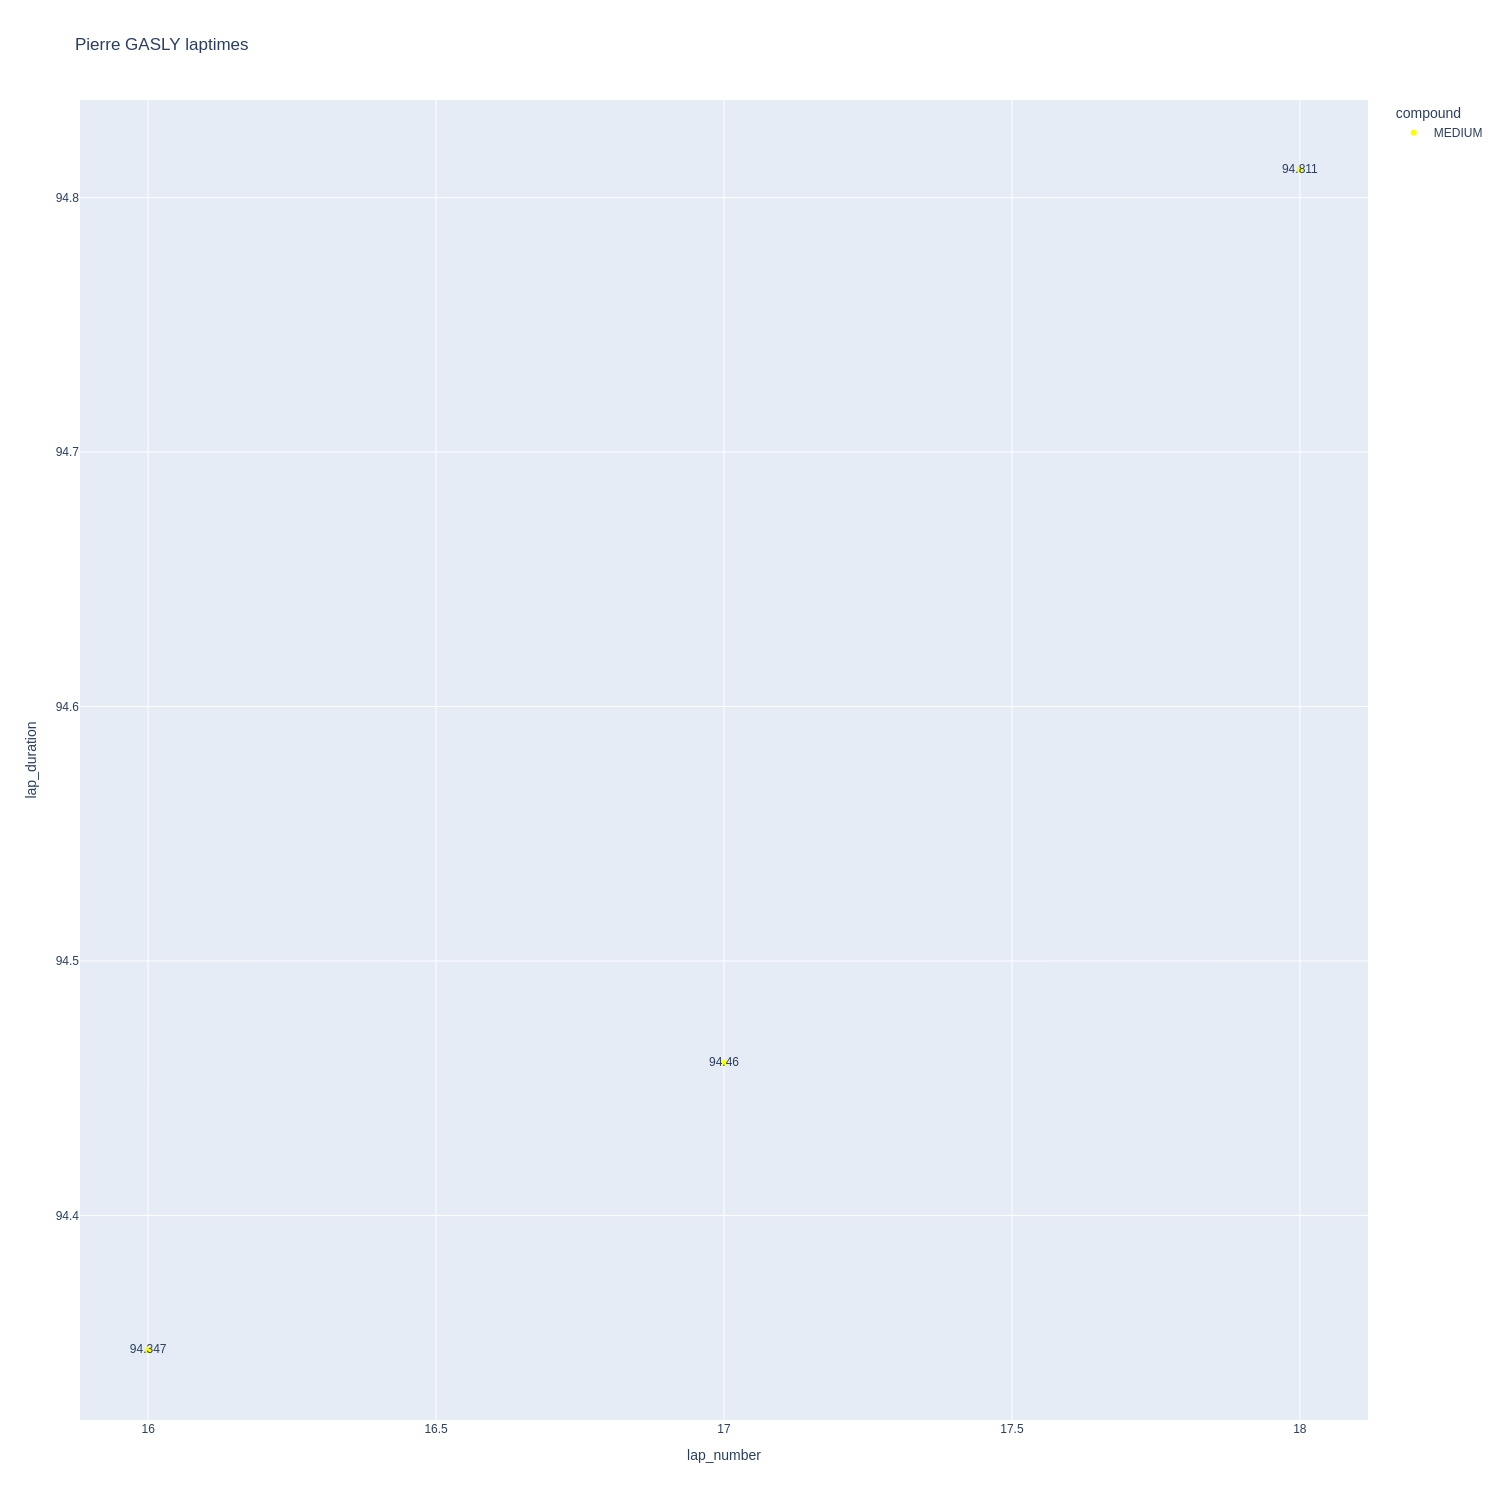

In [82]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

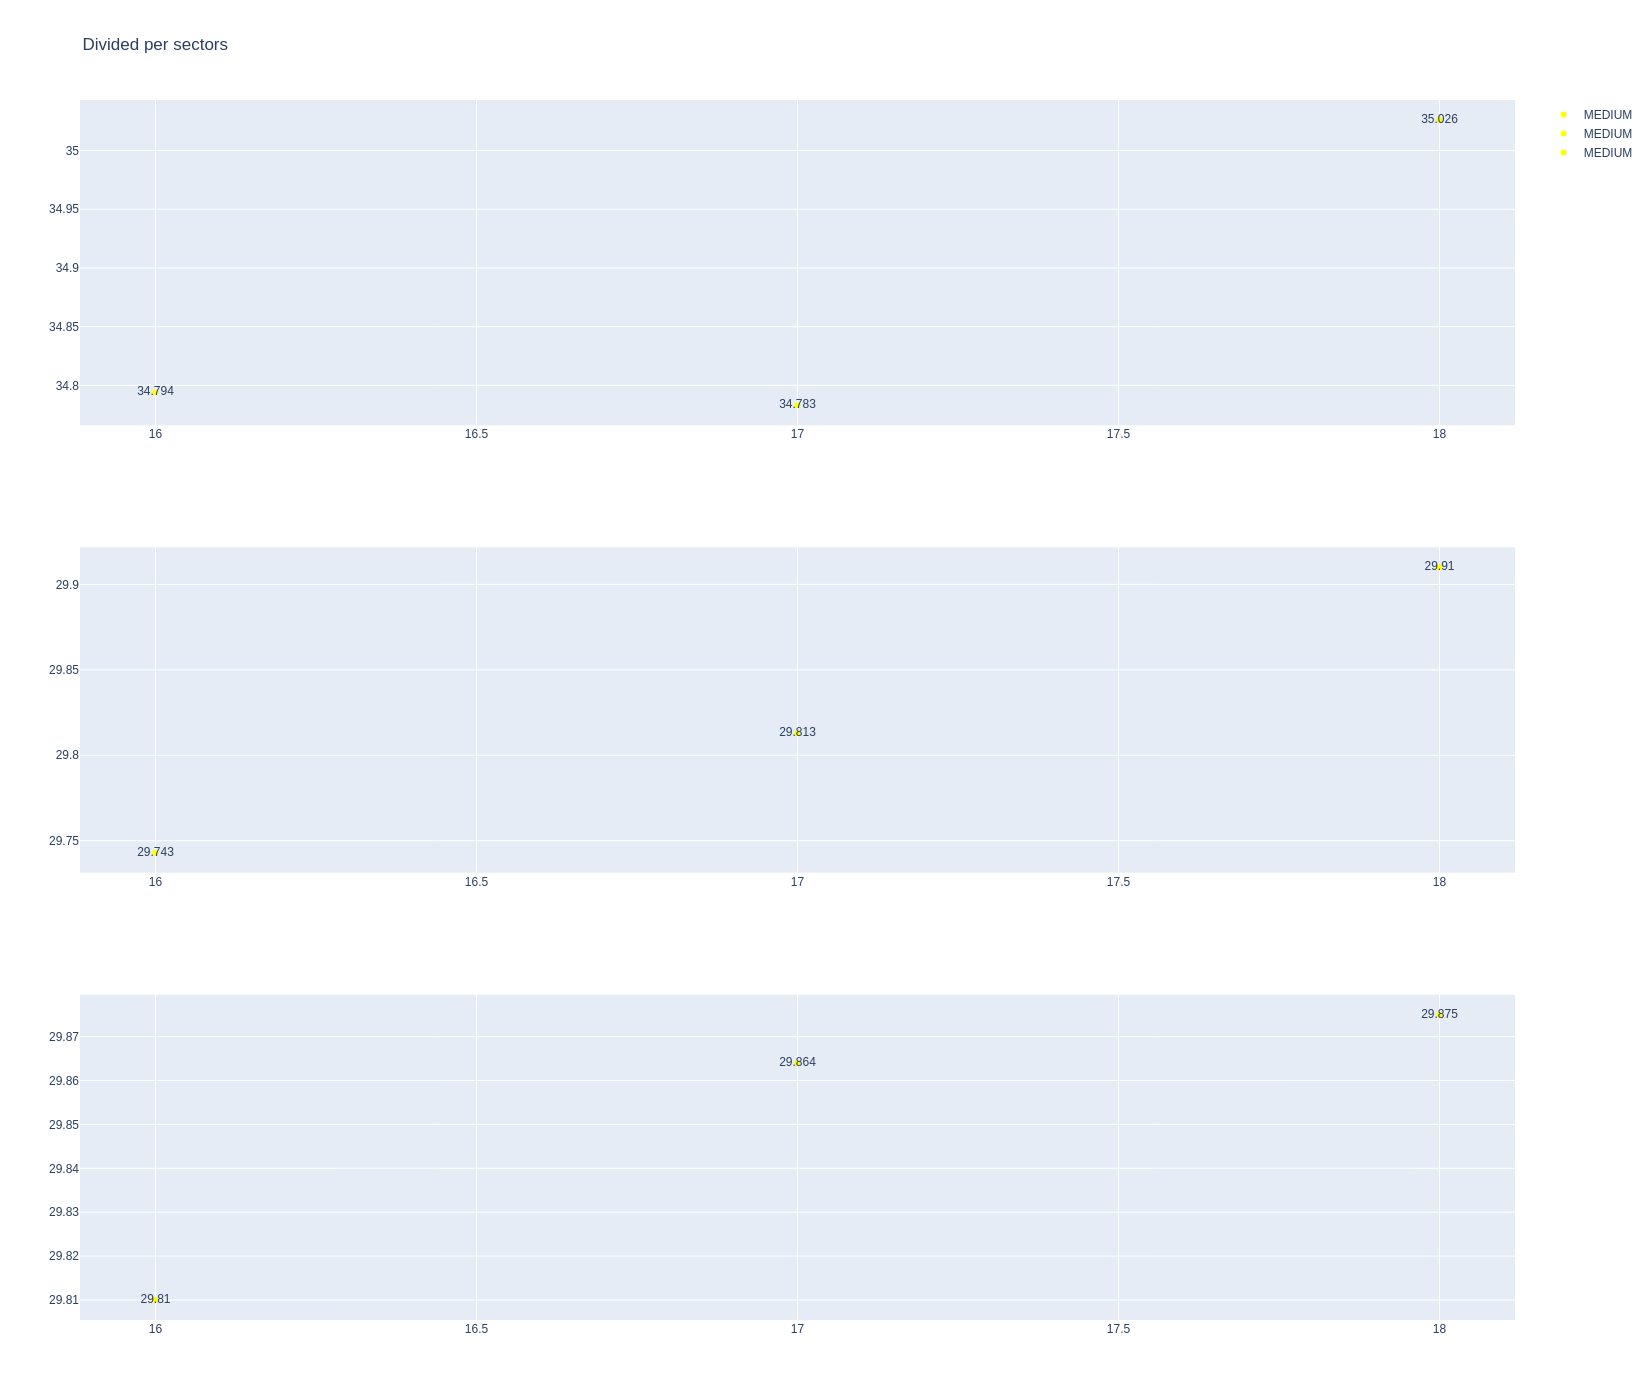

In [83]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [84]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
14         1258        10016             1             23          1        9   
16         1258        10016             1             55          1        9   
41         1258        10016             2             55         10       13   
43         1258        10016             2             23         10       14   
58         1258        10016             3             55         14       15   
62         1258        10016             3             23         15       16   
75         1258        10016             4             55         16       22   
82         1258        10016             4             23         17       21   
95         1258        10016             5             23         22       22   
97         1258        10016             5             55         23       23   

   compound  tyre_age_at_start  
14     HARD                0.0  
16   MEDIUM                0.0  
41     SOFT                0.0  
43     SOFT                0.0  
58     SOFT                0.0  
62     SOFT                0.0  
75   MEDIUM                0.0  
82     HARD                8.0  
95     HARD                0.0  
97   MEDIUM               15.0

In [85]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
285  Alexander ALBON     HARD  2025-04-18T17:44:52.828000+00:00          17   
299  Alexander ALBON     HARD  2025-04-18T17:46:27.425000+00:00          18   
314  Alexander ALBON     HARD  2025-04-18T17:48:02.401000+00:00          19   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
285             35.019             29.709             29.906        94.634  
299             34.996             29.873             30.129        94.998  
314             35.127             30.117             30.034        95.278

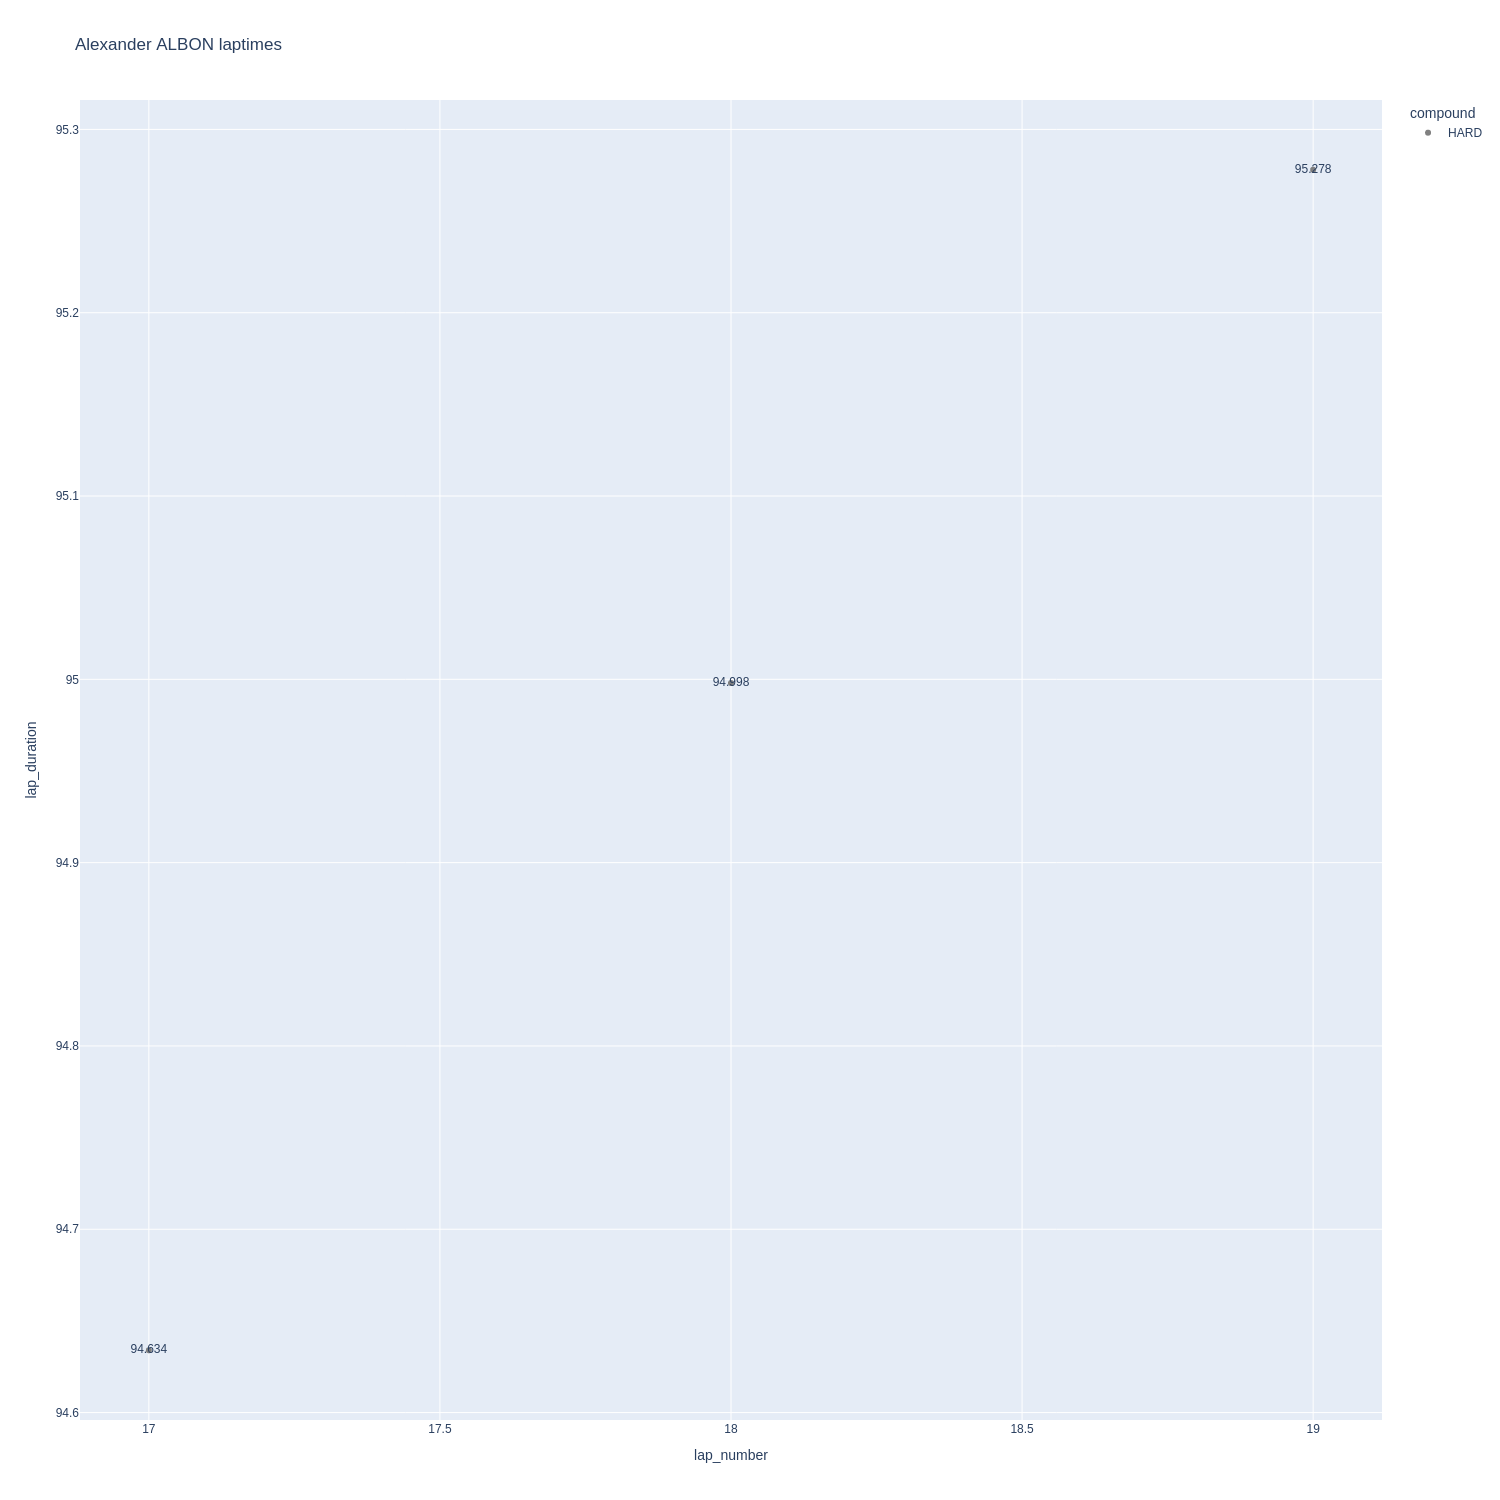

In [86]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

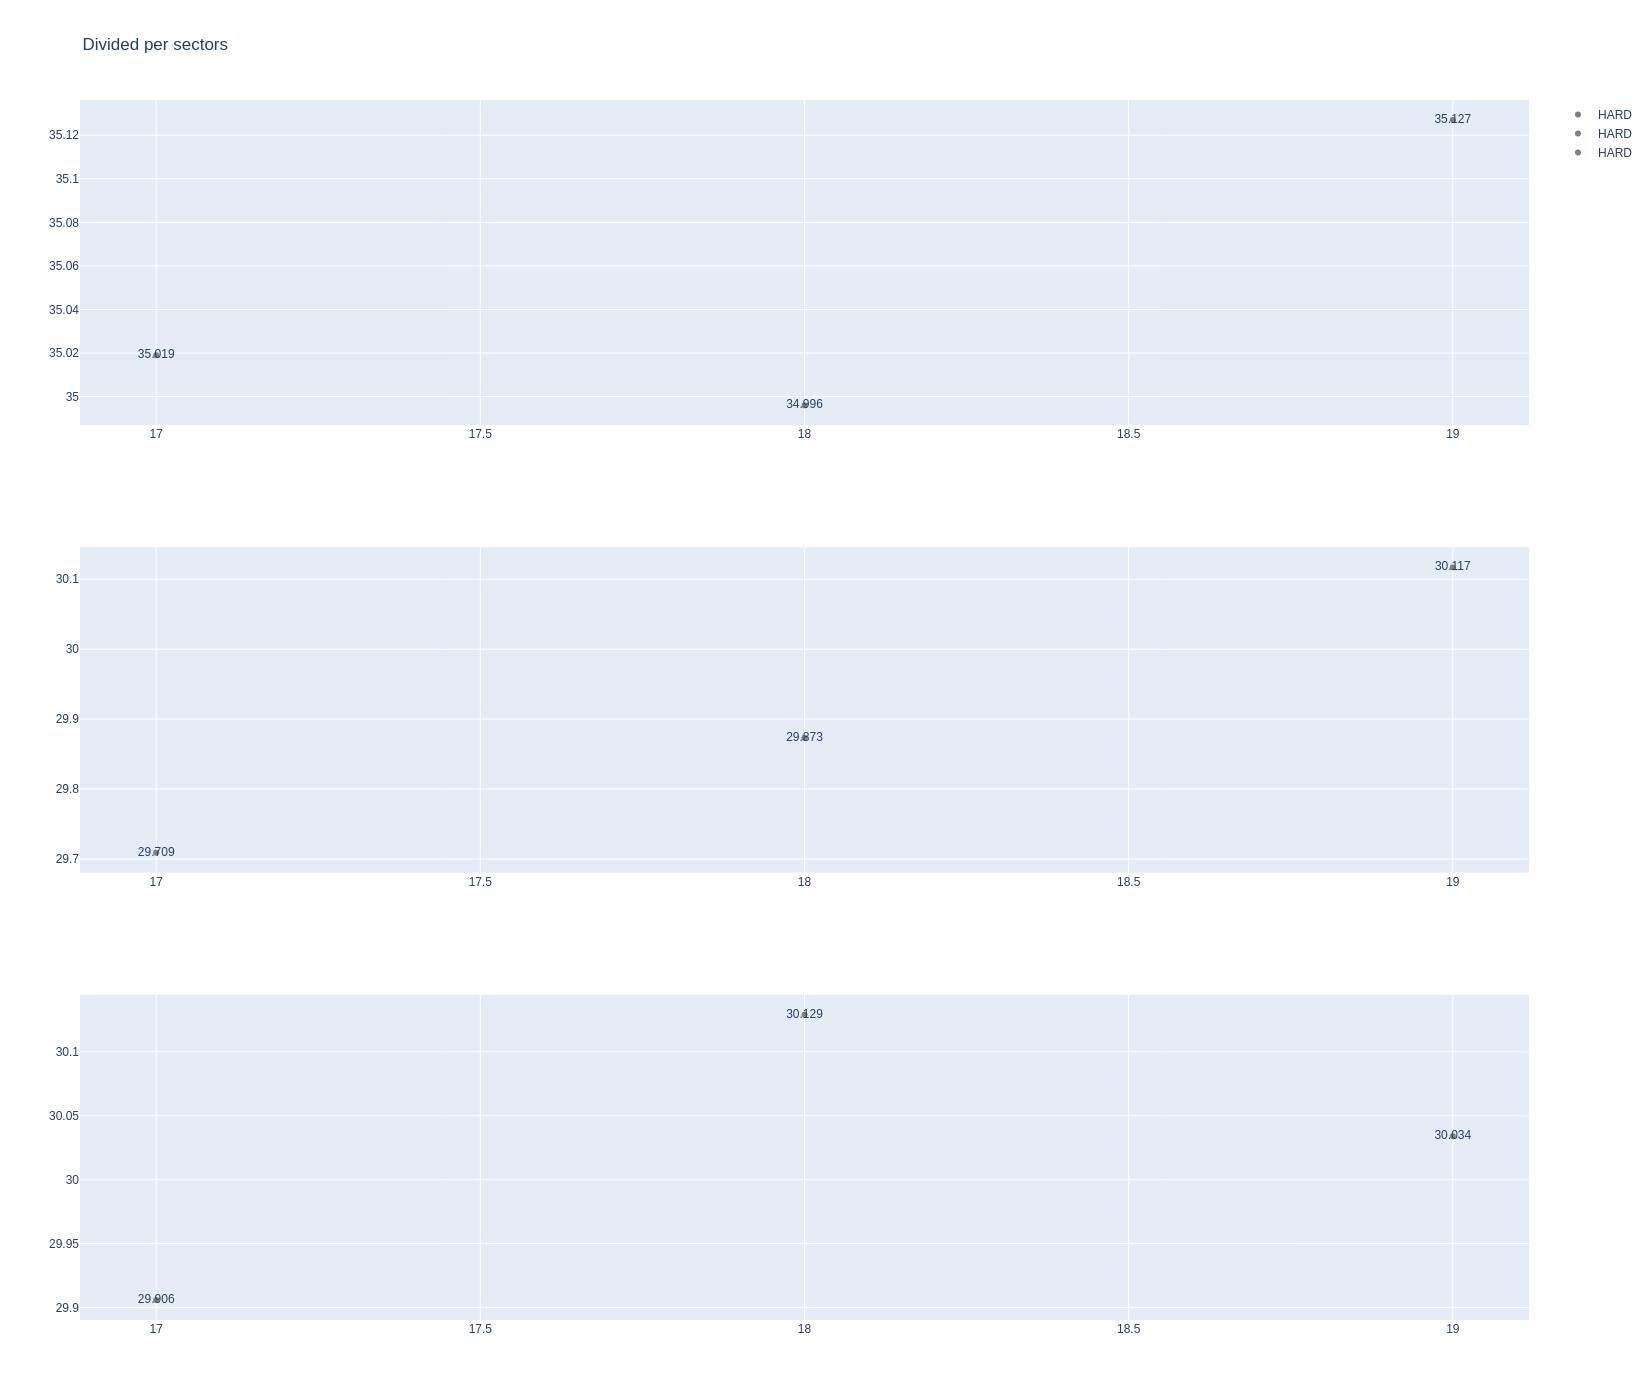

In [87]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [88]:
data= libraryDataF1.getinfolongruns(jointables2,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
274  Carlos SAINZ   MEDIUM  2025-04-18T17:42:23.942000+00:00          16   
281  Carlos SAINZ   MEDIUM  2025-04-18T17:43:58.393000+00:00          17   
290  Carlos SAINZ   MEDIUM  2025-04-18T17:45:33.542000+00:00          18   
303  Carlos SAINZ   MEDIUM  2025-04-18T17:47:08.829000+00:00          19   
319  Carlos SAINZ   MEDIUM  2025-04-18T17:48:44.708000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
274             34.848             29.658             29.928        94.434  
281             35.105             29.914             30.115        95.134  
290             35.392             29.900             30.044        95.336  
303             35.568             30.145             30.130        95.843  
319             35.468             30.029             30.159        95.656

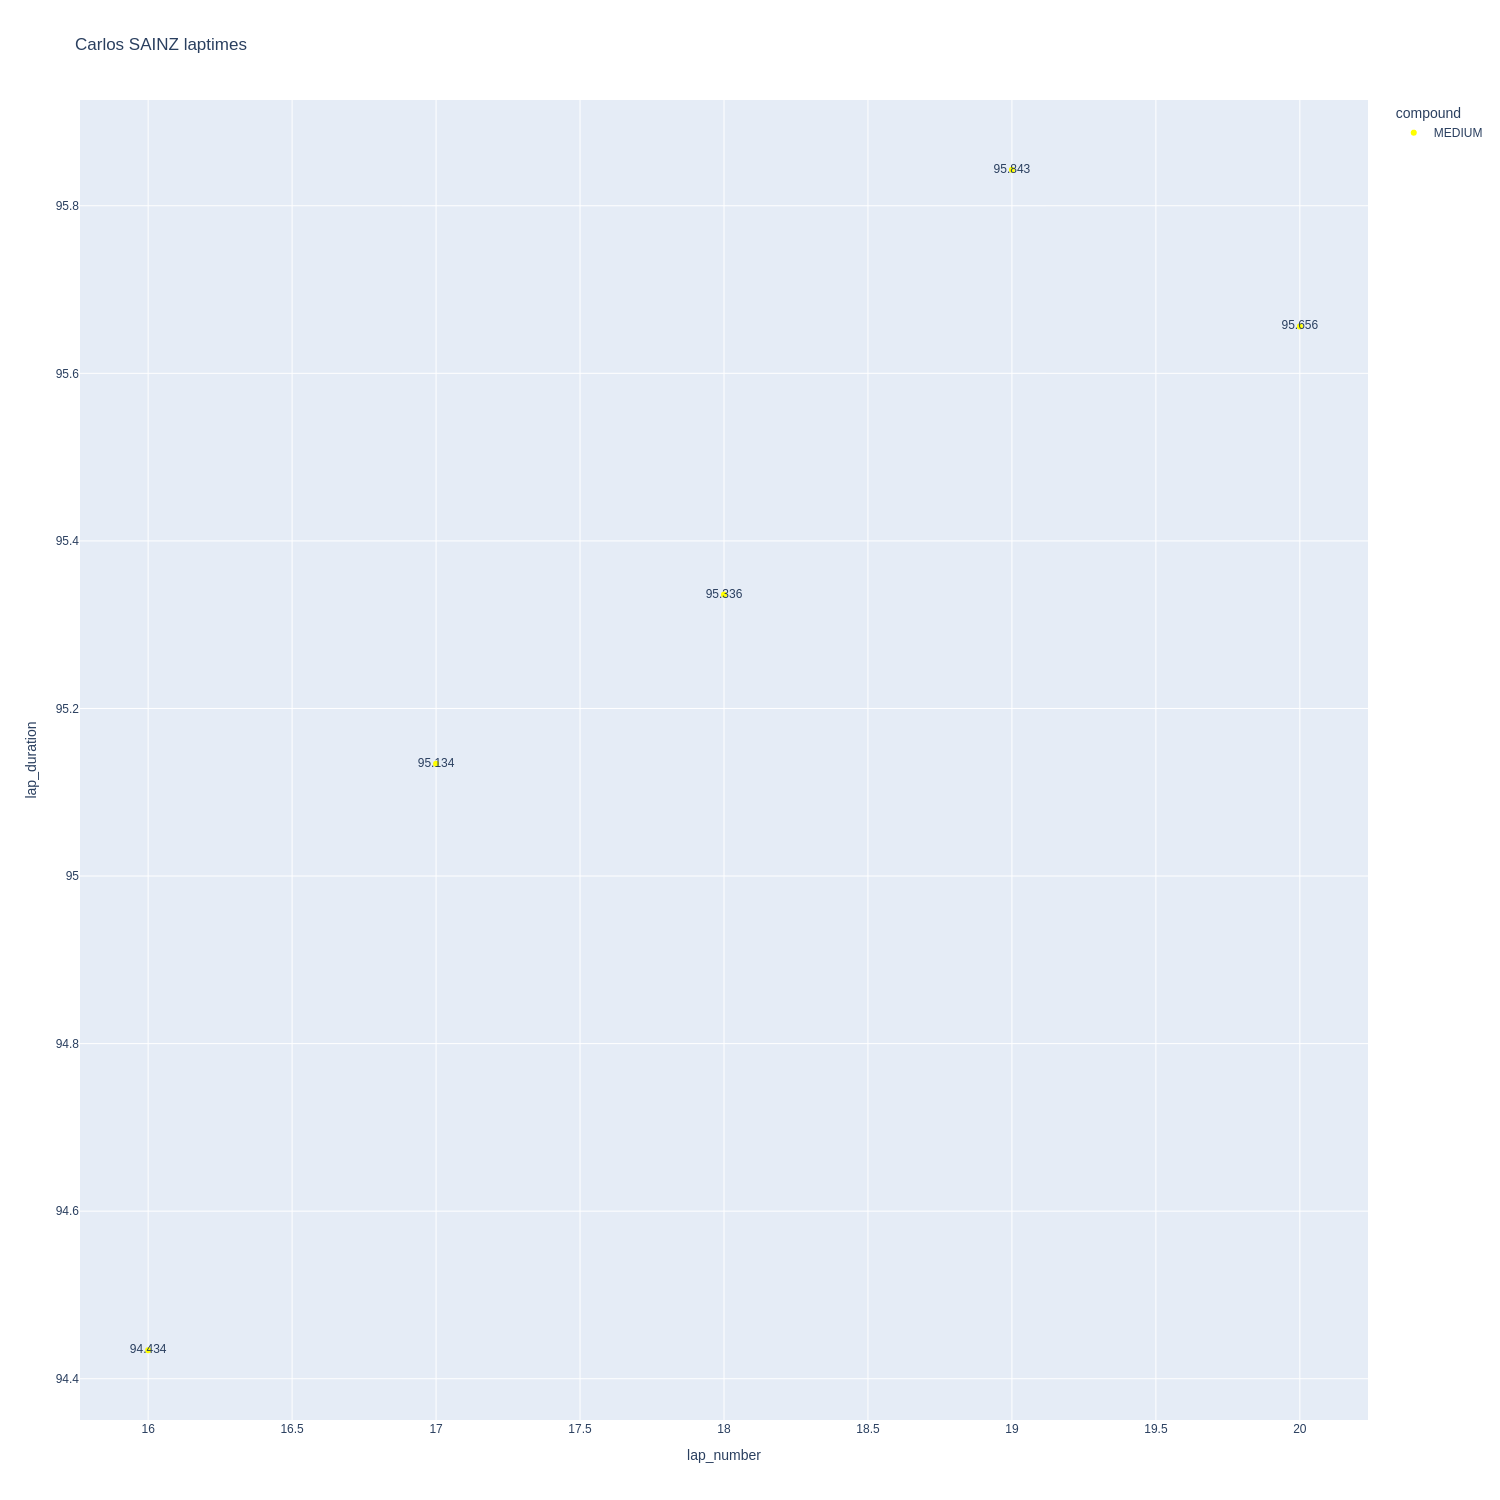

In [89]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

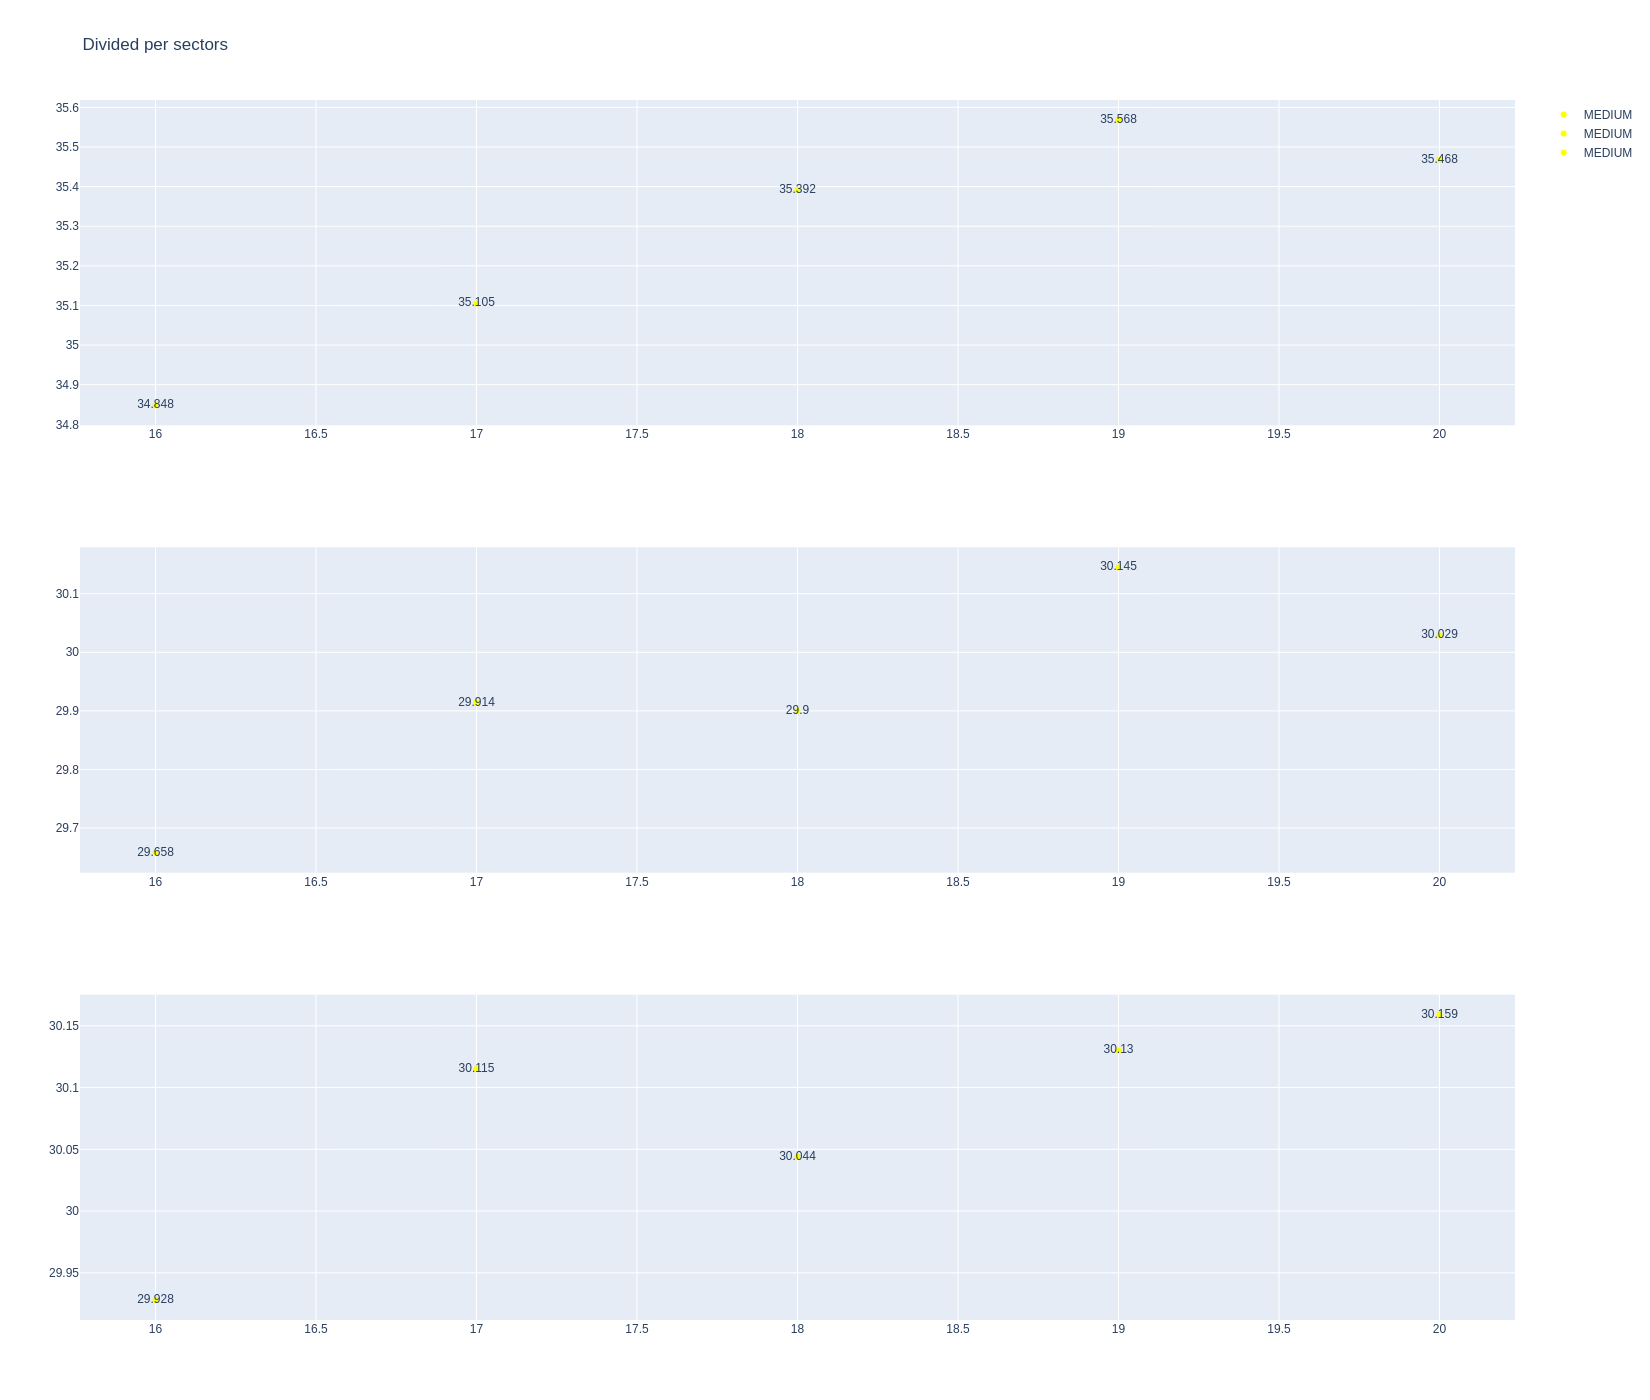

In [90]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [91]:
stintInformation.query('driver_number == 27 or driver_number == 5')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1258        10016             1              5          1        1   
10         1258        10016             1             27          1        8   
30         1258        10016             2             27          9       11   
47         1258        10016             3             27         12       14   
65         1258        10016             4             27         15       19   
87         1258        10016             5             27         20       20   

   compound  tyre_age_at_start  
0      None                NaN  
10   MEDIUM                0.0  
30     SOFT                0.0  
47     SOFT                0.0  
65   MEDIUM                7.0  
87     SOFT                6.0

In [92]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
291  Nico HULKENBERG   MEDIUM  2025-04-18T17:45:36.588000+00:00          15   
305  Nico HULKENBERG   MEDIUM  2025-04-18T17:47:11.422000+00:00          16   
320  Nico HULKENBERG   MEDIUM  2025-04-18T17:48:46.365000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
291             34.972             29.848             30.064        94.884  
305             34.990             29.973             30.057        95.020  
320             35.295             30.160             30.196        95.651

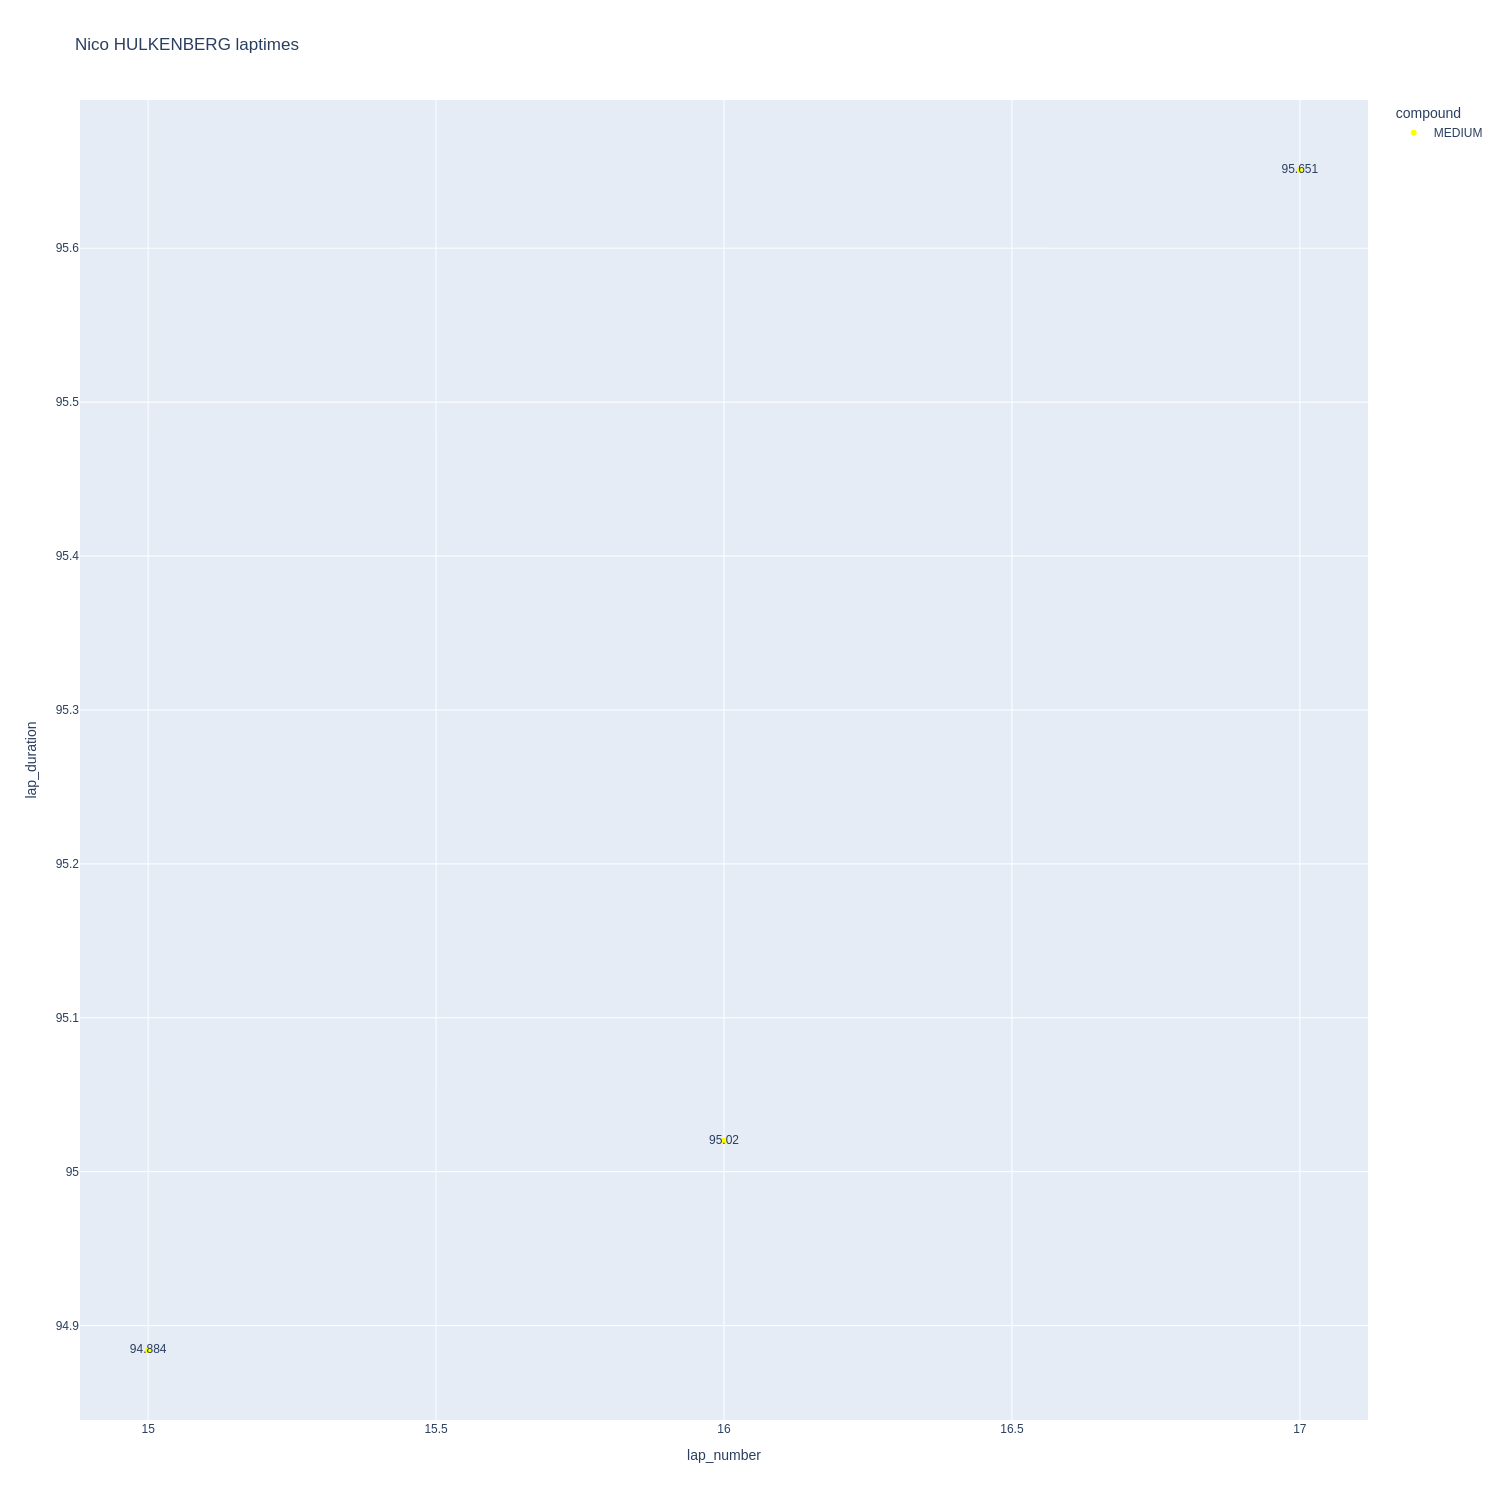

In [93]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

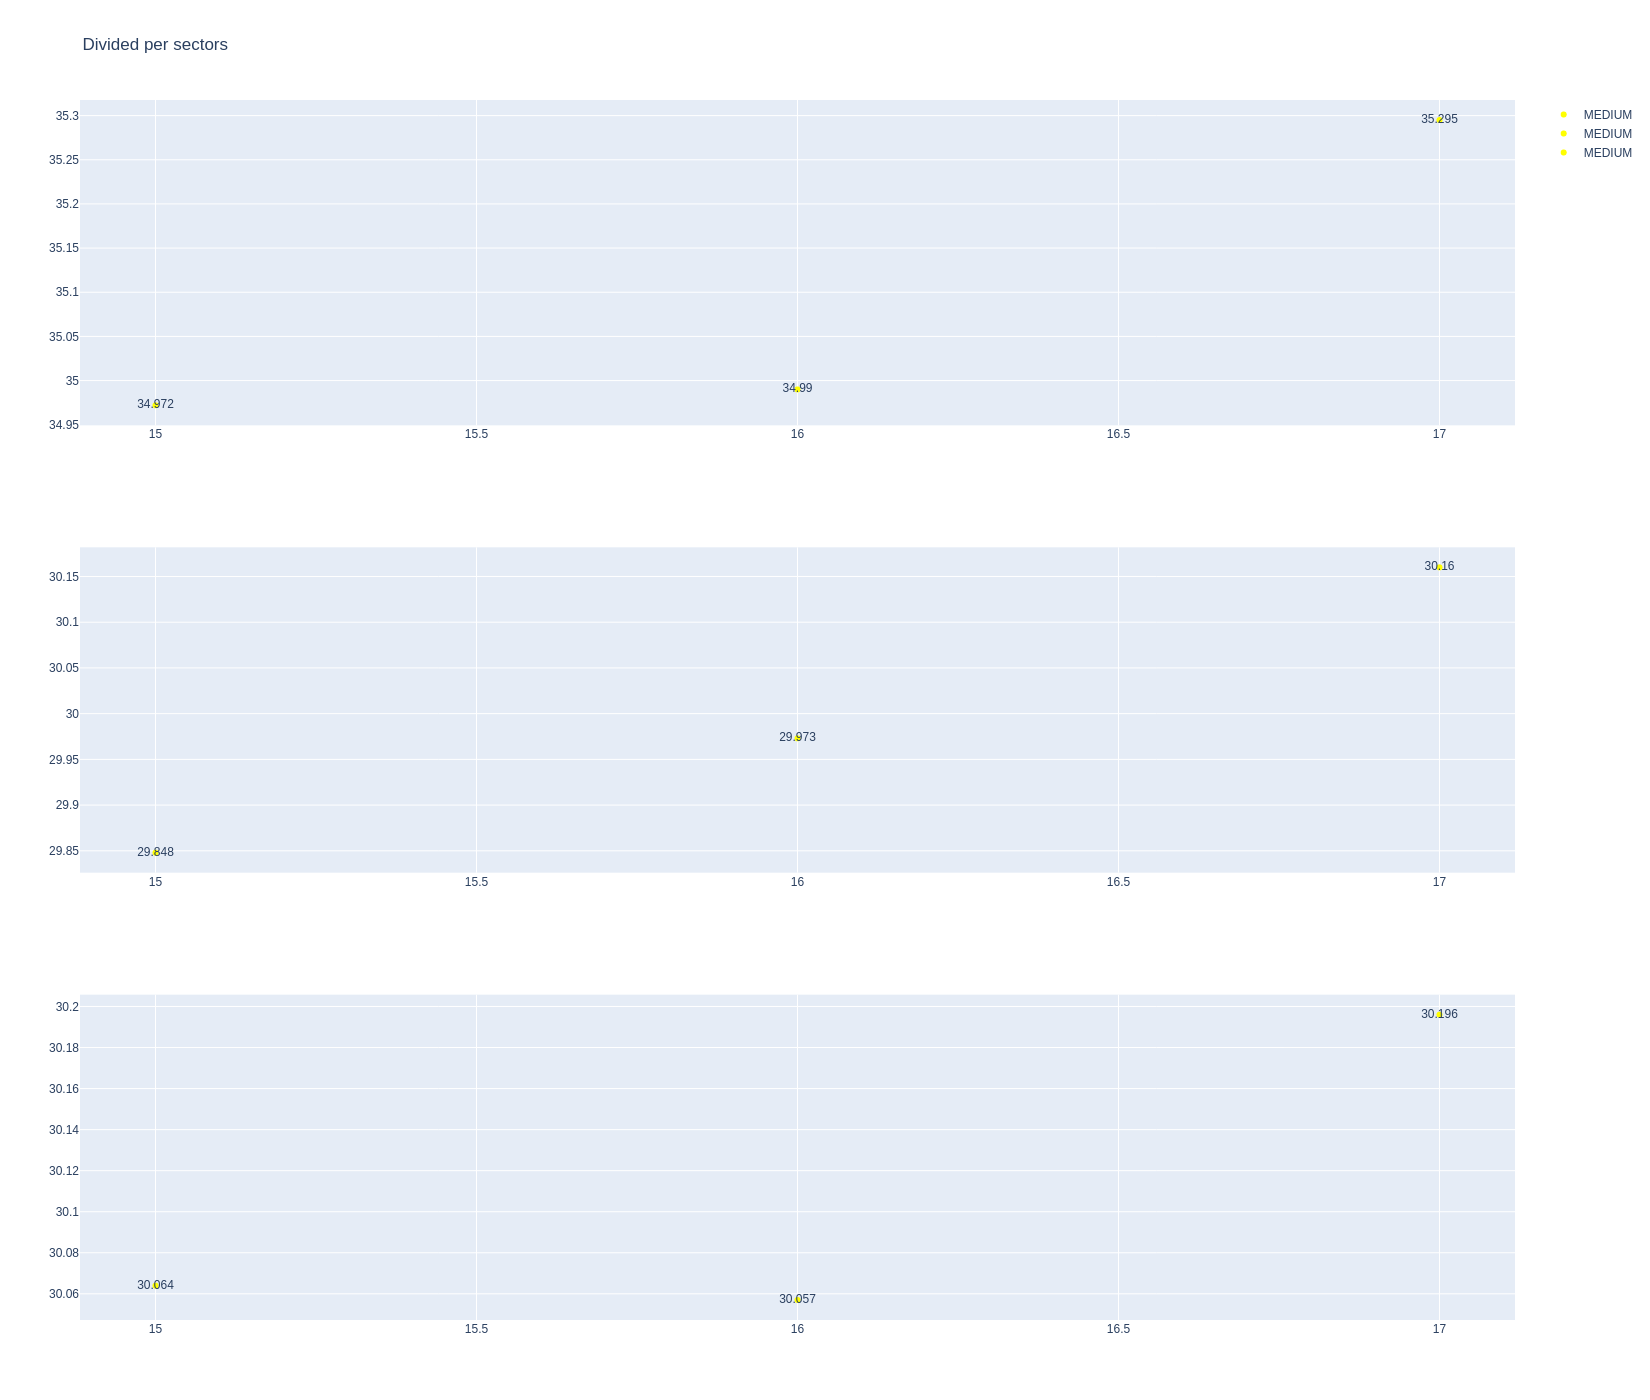

In [94]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [95]:
data = libraryDataF1.getinfolongruns(jointables2,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

Empty DataFrame
Columns: [full_name, compound, date_start, lap_number, duration_sector_1, duration_sector_2, duration_sector_3, lap_duration]
Index: []

In [96]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [97]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver

In [98]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [99]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [100]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
13    Oscar PIASTRI   MEDIUM     93.949250  34.557000  29.567750  29.824500
4      Pierre GASLY   MEDIUM     94.539333  34.867667  29.822000  29.849667
12   George RUSSELL   MEDIUM     94.643500  33.867000  29.194500  31.582000
5   Charles LECLERC   MEDIUM     94.715000  34.733000  29.925000  30.057000
7   Alexander ALBON     HARD     94.970000  35.047333  29.899667  30.023000
1      Lando NORRIS     SOFT     95.039000  35.104000  29.832000  30.103000
0    Max VERSTAPPEN   MEDIUM     95.046000  35.021143  29.908857  30.116000
8   Nico HULKENBERG   MEDIUM     95.185000  35.085667  29.993667  30.105667
6      Yuki TSUNODA   MEDIUM     95.216000  35.098500  29.949000  30.168500
11     Carlos SAINZ   MEDIUM     95.280600  35.276200  29.929200  30.075200
3       Jack DOOHAN   MEDIUM     95.290000  35.081000  29.979333  30.229667
10   Lewis HAMILTON   MEDIUM     95.390000  35.050500  30.121000  30.218500
9      Esteban OCON     SOFT     95.557667  35.095000  30.163333  30.299333
2      Isack HADJAR   MEDIUM     95.819000  35.434000  30.104000  30.281000

##### Sorted by sector 1

In [101]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

driver compound    sector1
12   George RUSSELL   MEDIUM  33.867000
13    Oscar PIASTRI   MEDIUM  34.557000
5   Charles LECLERC   MEDIUM  34.733000
4      Pierre GASLY   MEDIUM  34.867667
0    Max VERSTAPPEN   MEDIUM  35.021143
7   Alexander ALBON     HARD  35.047333
10   Lewis HAMILTON   MEDIUM  35.050500
3       Jack DOOHAN   MEDIUM  35.081000
8   Nico HULKENBERG   MEDIUM  35.085667
9      Esteban OCON     SOFT  35.095000
6      Yuki TSUNODA   MEDIUM  35.098500
1      Lando NORRIS     SOFT  35.104000
11     Carlos SAINZ   MEDIUM  35.276200
2      Isack HADJAR   MEDIUM  35.434000

##### Sorted by sector 2

In [102]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

driver compound    sector2
12   George RUSSELL   MEDIUM  29.194500
13    Oscar PIASTRI   MEDIUM  29.567750
4      Pierre GASLY   MEDIUM  29.822000
1      Lando NORRIS     SOFT  29.832000
7   Alexander ALBON     HARD  29.899667
0    Max VERSTAPPEN   MEDIUM  29.908857
5   Charles LECLERC   MEDIUM  29.925000
11     Carlos SAINZ   MEDIUM  29.929200
6      Yuki TSUNODA   MEDIUM  29.949000
3       Jack DOOHAN   MEDIUM  29.979333
8   Nico HULKENBERG   MEDIUM  29.993667
2      Isack HADJAR   MEDIUM  30.104000
10   Lewis HAMILTON   MEDIUM  30.121000
9      Esteban OCON     SOFT  30.163333

##### Sorted by sector 3

In [103]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

driver compound    sector3
13    Oscar PIASTRI   MEDIUM  29.824500
4      Pierre GASLY   MEDIUM  29.849667
7   Alexander ALBON     HARD  30.023000
5   Charles LECLERC   MEDIUM  30.057000
11     Carlos SAINZ   MEDIUM  30.075200
1      Lando NORRIS     SOFT  30.103000
8   Nico HULKENBERG   MEDIUM  30.105667
0    Max VERSTAPPEN   MEDIUM  30.116000
6      Yuki TSUNODA   MEDIUM  30.168500
10   Lewis HAMILTON   MEDIUM  30.218500
3       Jack DOOHAN   MEDIUM  30.229667
2      Isack HADJAR   MEDIUM  30.281000
9      Esteban OCON     SOFT  30.299333
12   George RUSSELL   MEDIUM  31.582000

#### Long runs mean

In [104]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [105]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
13     O PIASTRI         93.949
4        P GASLY         94.539
12     G RUSSELL         94.644
5      C LECLERC         94.715
0   M VERSTAPPEN         95.046
8   N HULKENBERG         95.185
6      Y TSUNODA         95.216
11       C SAINZ         95.281
3       J DOOHAN         95.290
10    L HAMILTON         95.390
2       I HADJAR         95.819

In [106]:
libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
1  L NORRIS         95.039
9    E OCON         95.558

In [107]:
libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
7  A ALBON          94.97

## Free Practice 3
### Obtain setup

In [3]:
practice = libraryDataF1.obtain_information('laps',session_key=10017)
stintInformation = libraryDataF1.obtain_information('stints',session_key=10017)
drivers = libraryDataF1.obtain_information('drivers',session_key=10017)

In [4]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

In [5]:
session = ff1.get_session(2025, 5, 'FP3')
session.load();

req         WARNING 	DEFAULT CACHE ENABLED! (3.72 GB) /home/frank/.cache/fastf1
core           INFO 	Loading data for Saudi Arabian Grand Prix - Practice 3 [v3.3.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '7', '

### Speed trap
Sauber and Aston are centered on the straights and McLaren centered on turns.

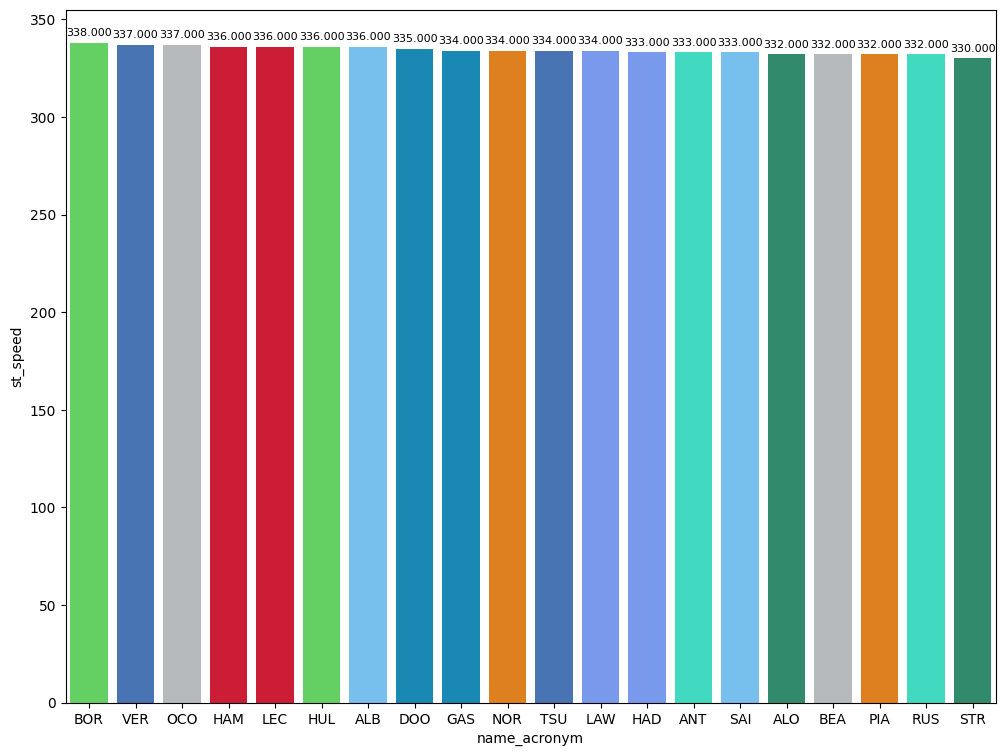

In [6]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

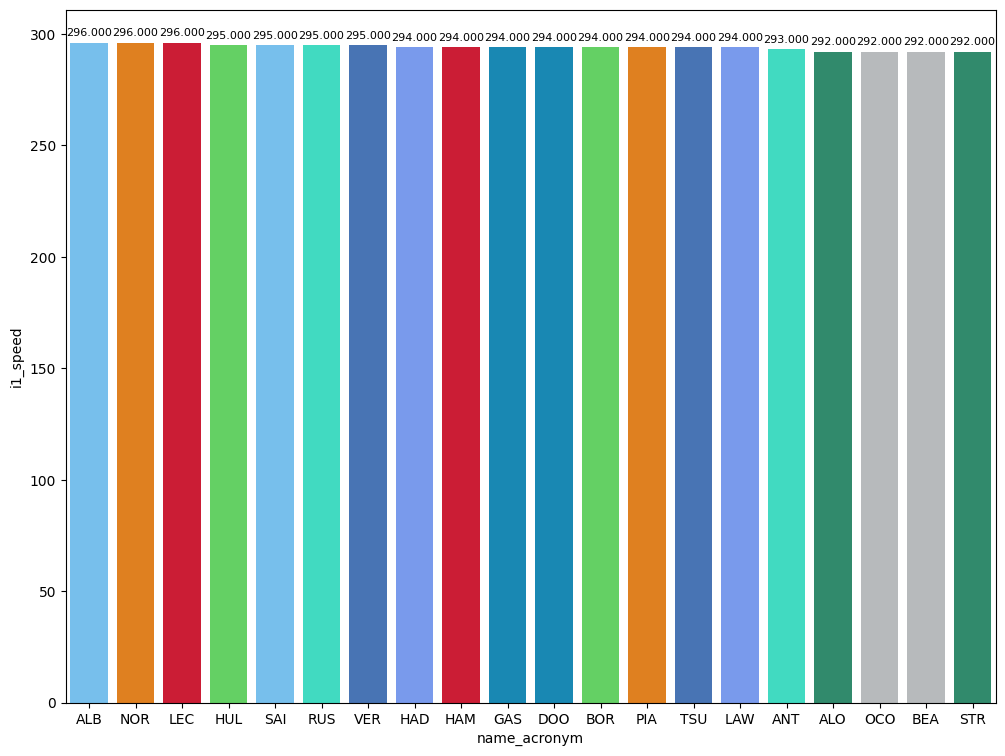

In [7]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

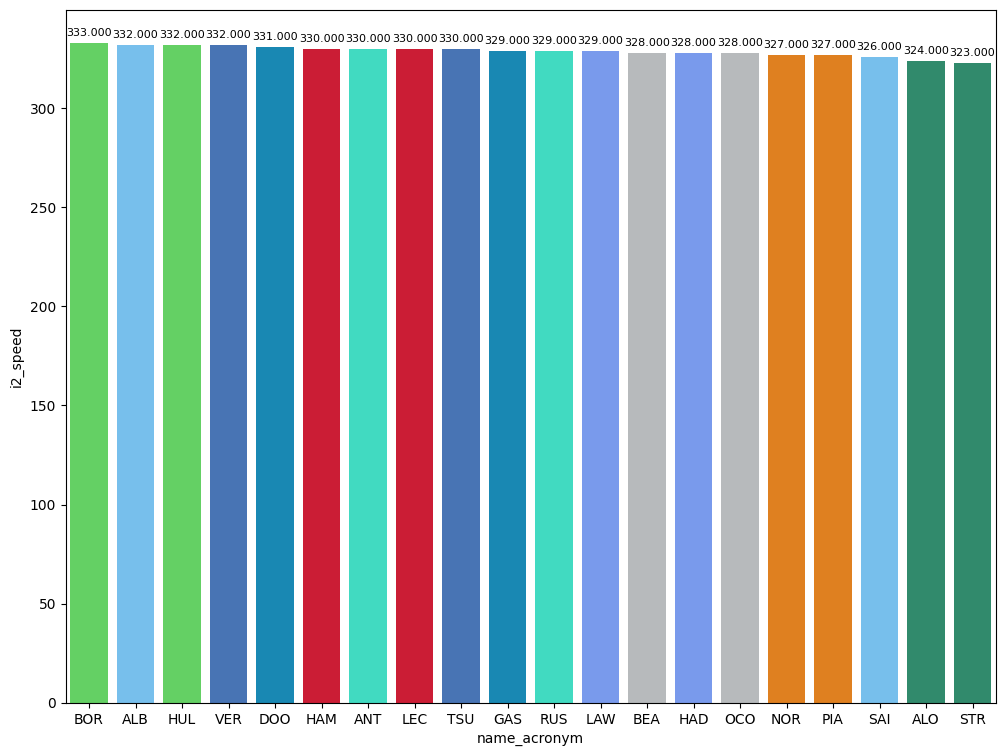

In [8]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [9]:
from matplotlib import pyplot as plt
competitiveLaps = jointables2.query("is_pit_out_lap == False and lap_duration < 95.406")
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])
maximumDate = "date_start <'2025-04-19T16:25:00+00:00'"


### Lap Time vs Max Speed
Fast: Left/ Slow:Right
Up: Low drag/ Down: High drag

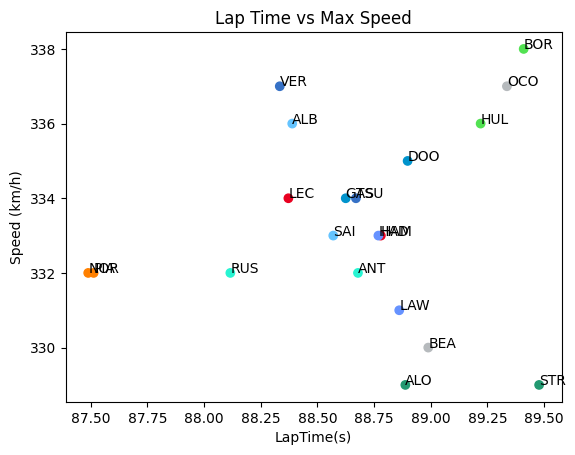

In [24]:
qSimulationData = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDate).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=False)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(qSimulationData.lap_duration,qSimulationData.st_speed,c=list("#"+qSimulationData.team_colour))
plt.title("Lap Time vs Max Speed")
plt.xlabel("LapTime(s)")
plt.ylabel("Speed (km/h)")
for i, txt in enumerate(qSimulationData.name_acronym_x):
    ax.annotate(txt, (list(qSimulationData.lap_duration)[i], list(qSimulationData.st_speed)[i]))

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [25]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
6      Fernando ALONSO     HARD             58.920             33.270   
14   Gabriel BORTOLETO   MEDIUM             33.293             28.515   
246       Lando NORRIS     SOFT             31.769             27.670   

     duration_sector_3  lap_duration  
6               40.919       133.109  
14              29.198        91.006  
246             28.050        87.489

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [26]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


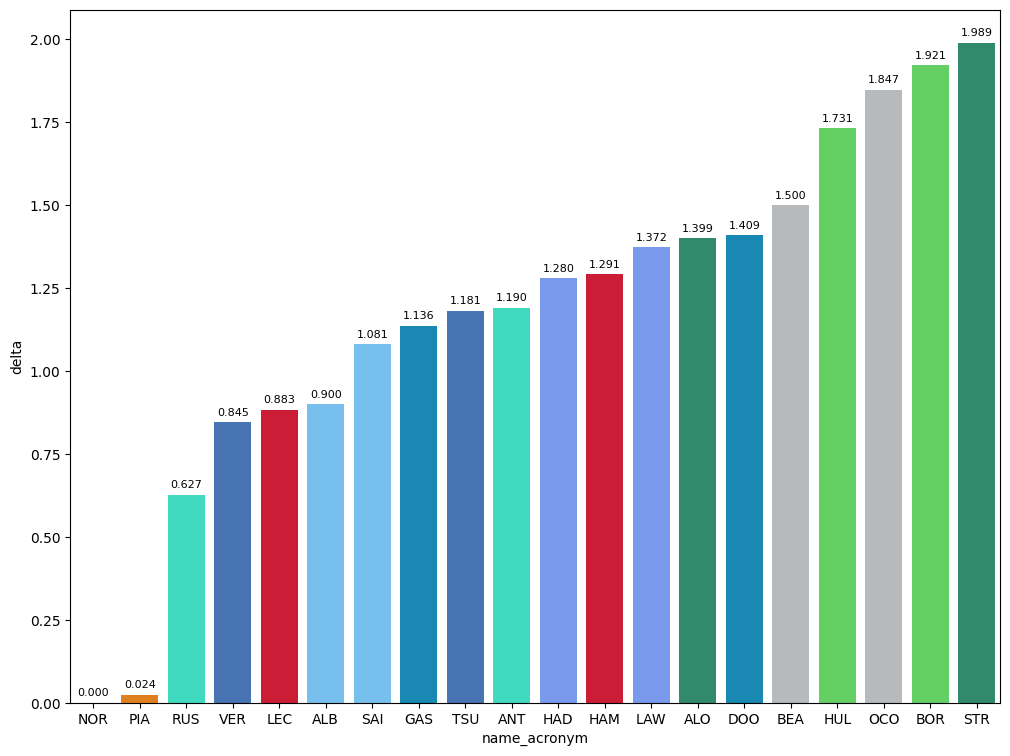

In [27]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.
S1: McLaren was dominant here and ALO should take advantage of this sector to pass Q2.
S2: Alpine and Ferrari suffered here . MER and WIL are strong here.
S3: Haas is strong here and they can pass to Q2 thanks to this sector. Williams, Gasly and  VER are strong.

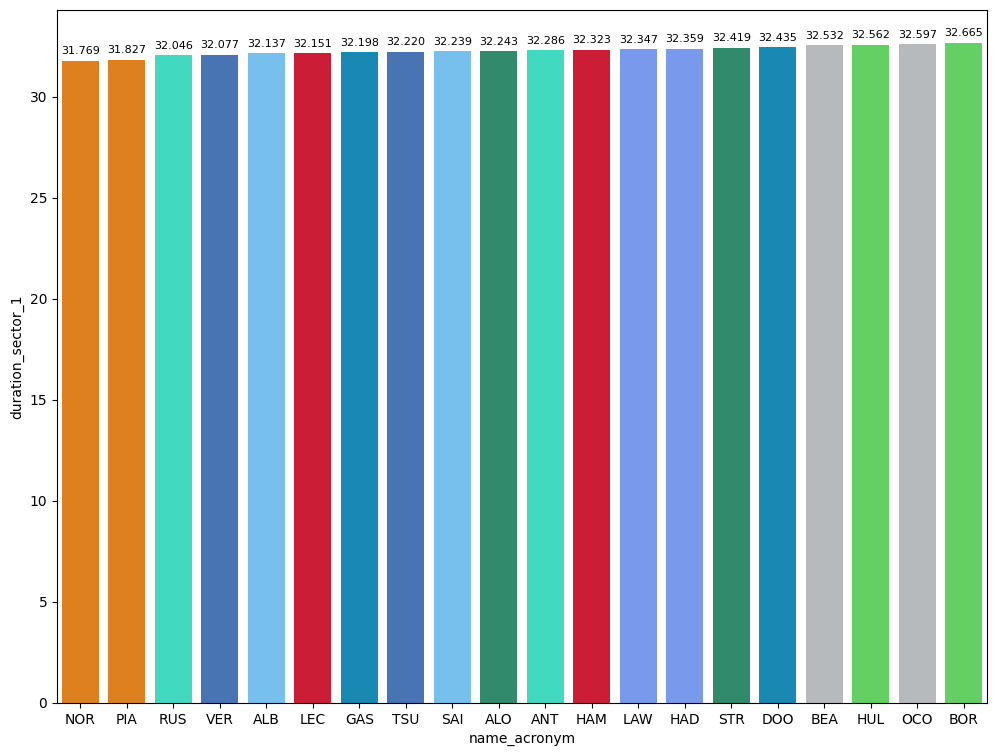

In [28]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

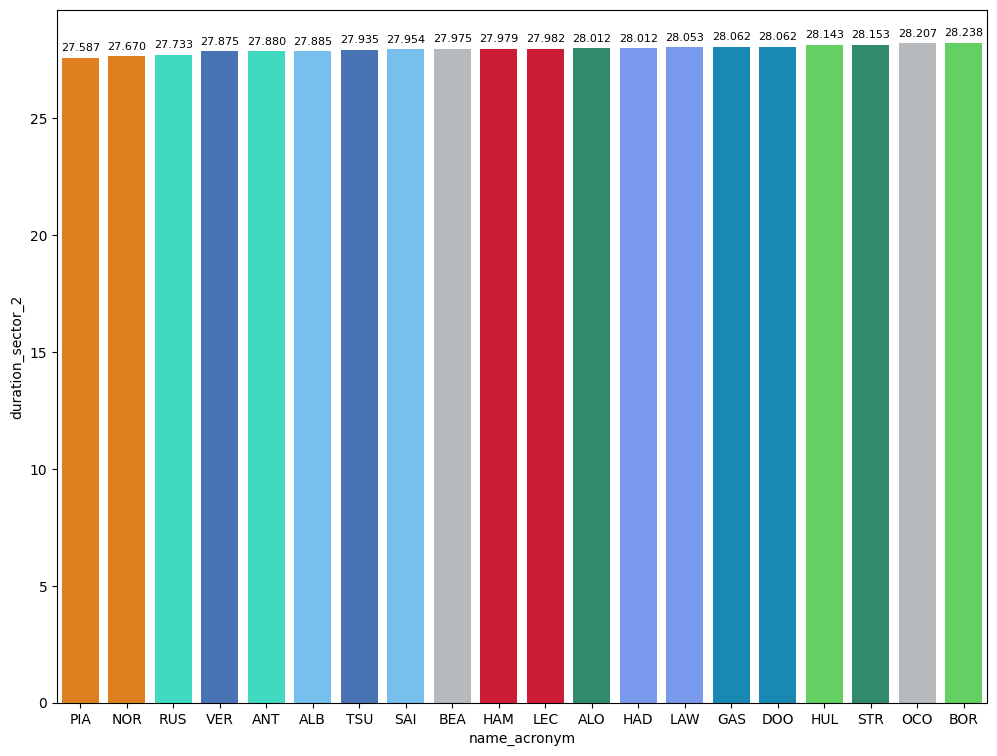

In [29]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

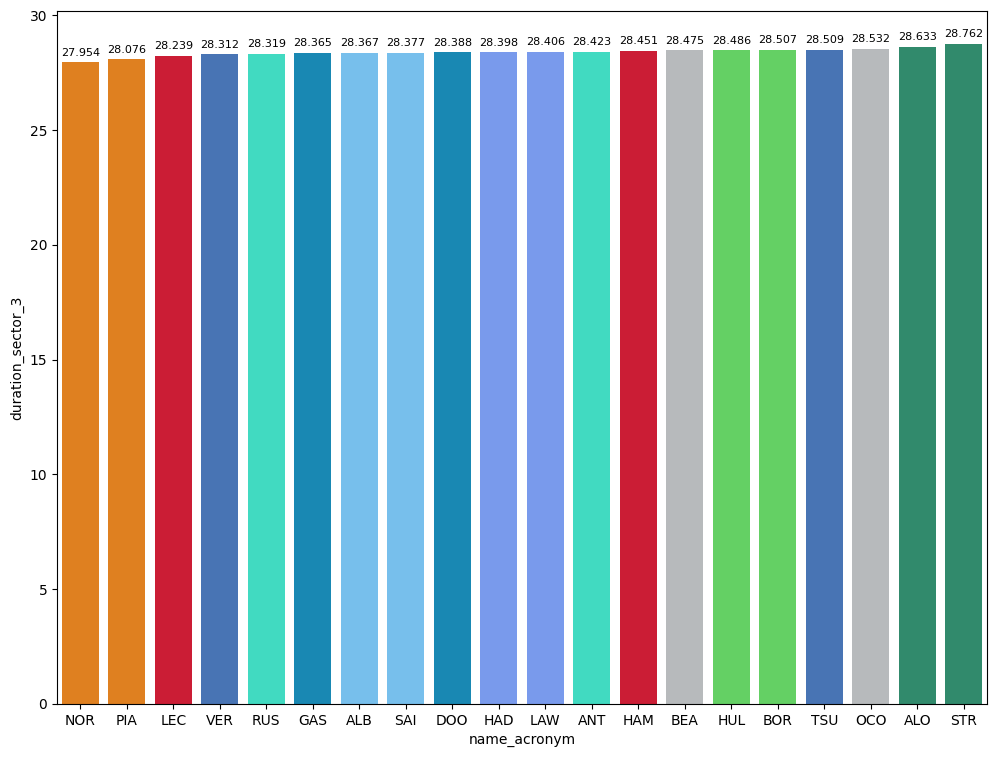

In [30]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [31]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 108").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         91.143990
MEDIUM       94.161545

### Gear shifts of the poleman

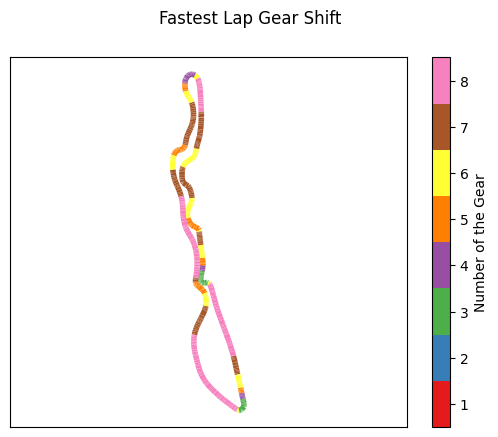

In [32]:
libraryDataF1.show_shifts_poleman(session)

### Comparaison between the poleman and the second

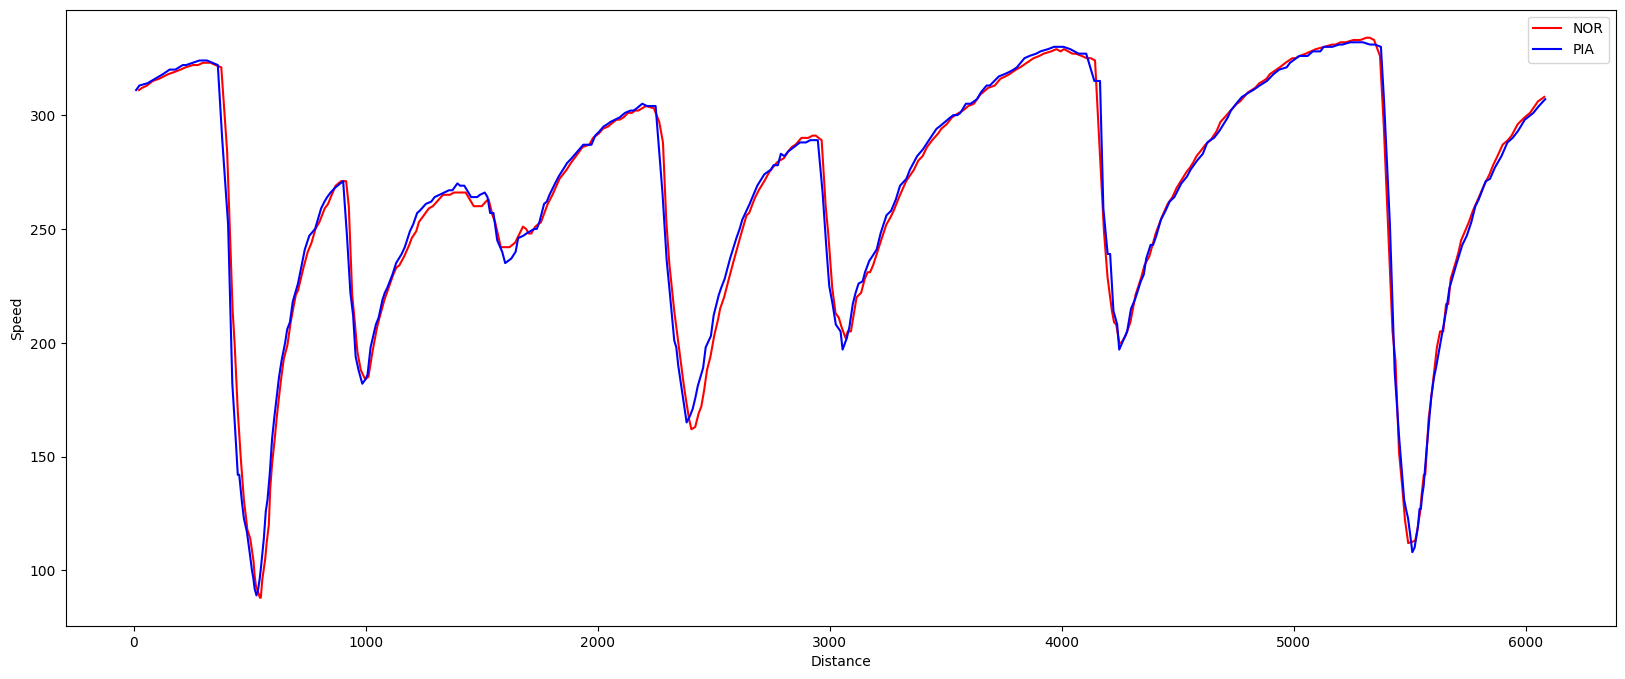

In [33]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

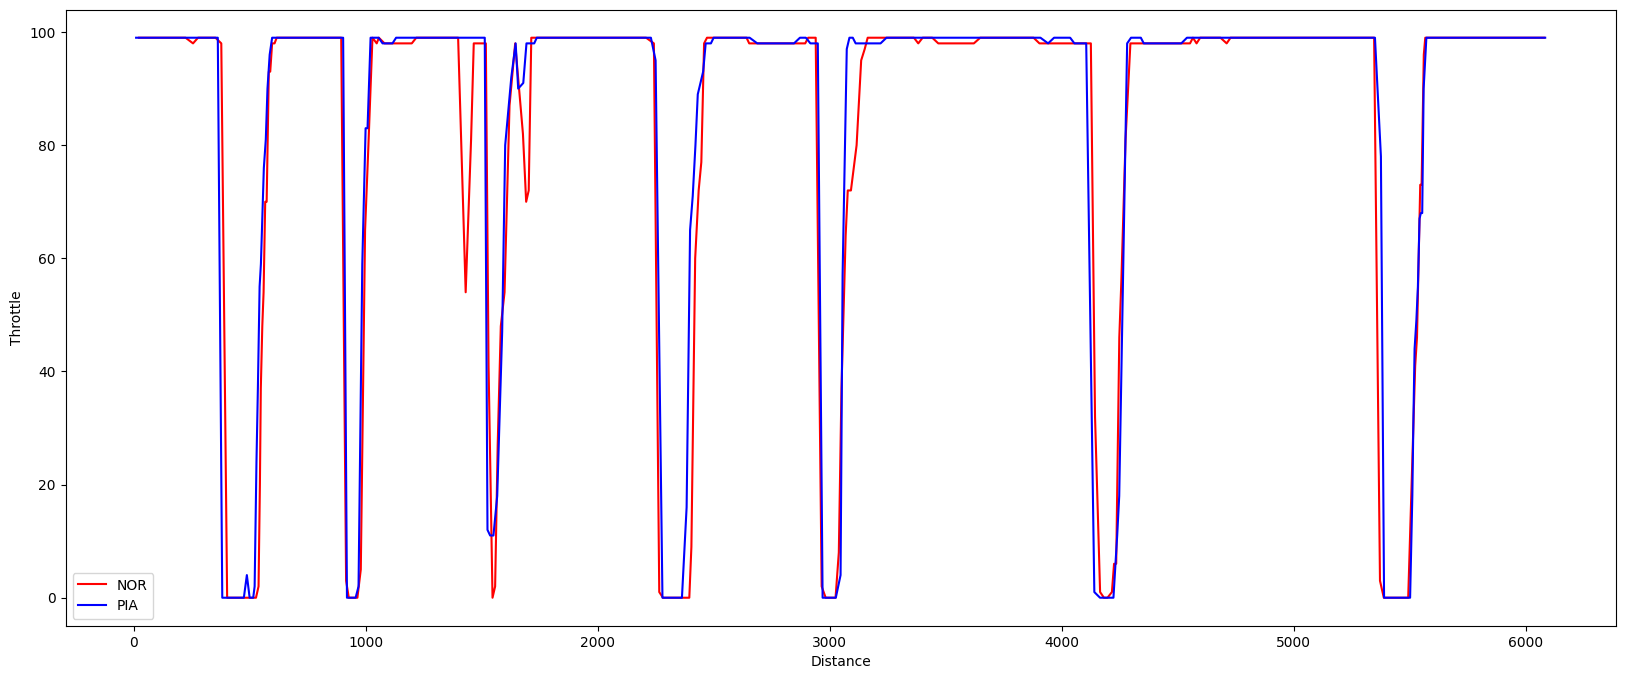

In [34]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

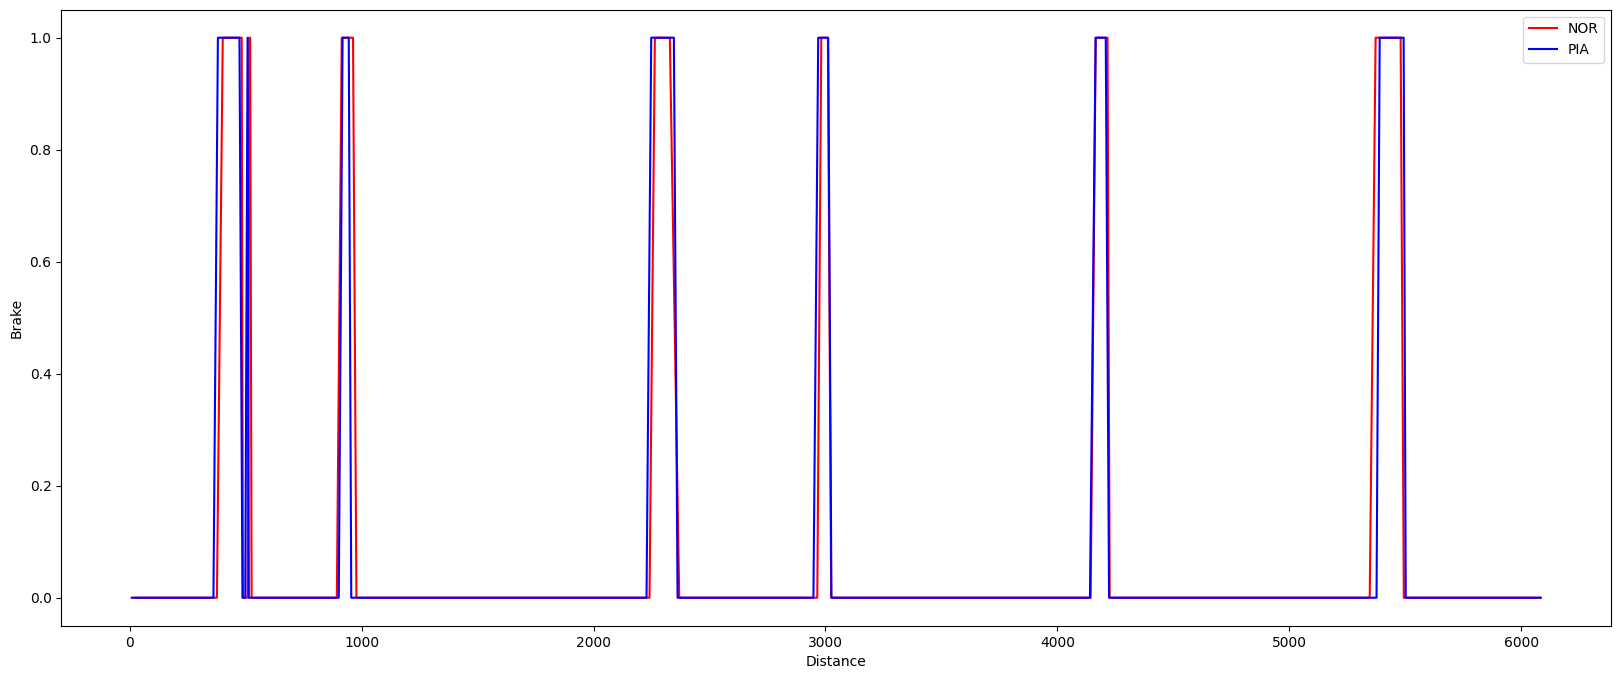

In [35]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

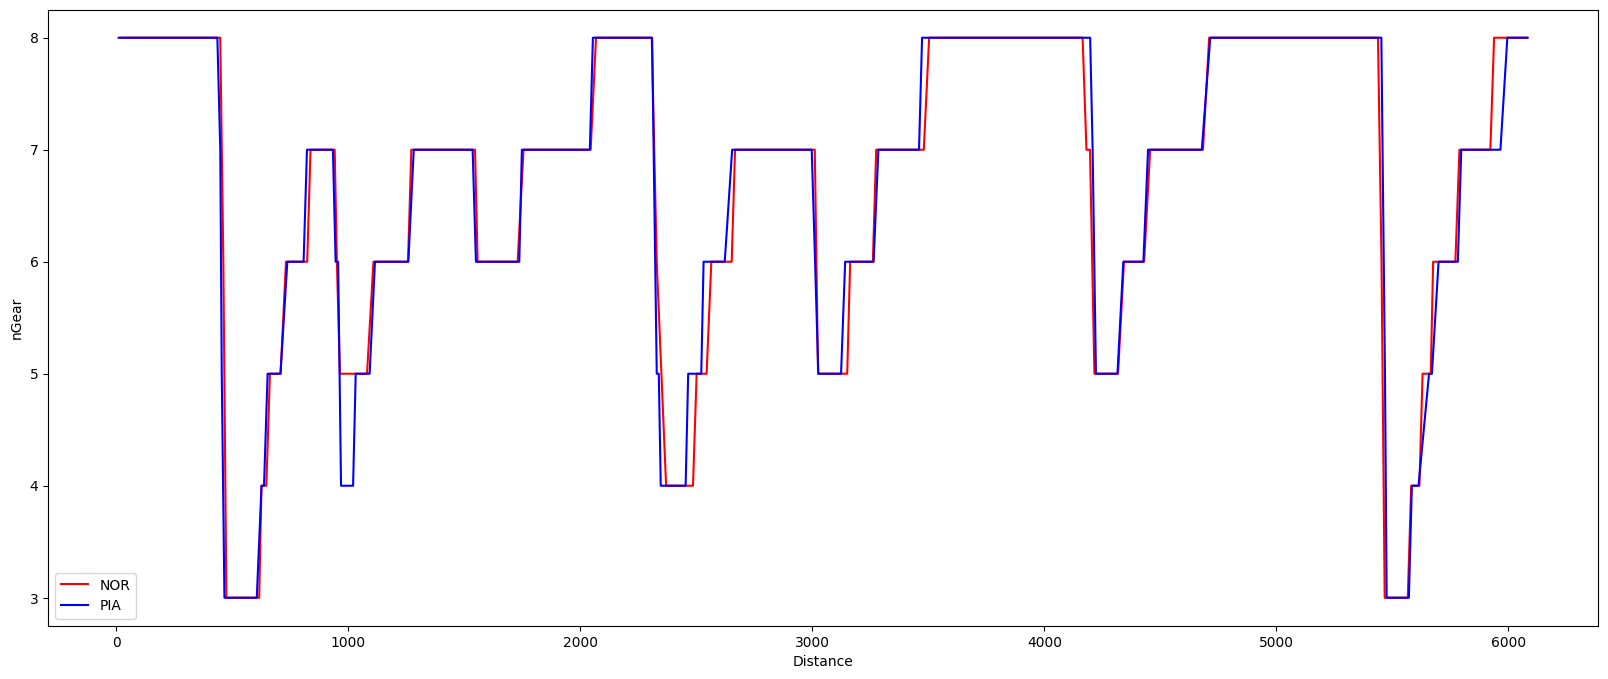

In [36]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session.

In [3]:
libraryDataF1.obtain_information('race_control',session_key=10018)

session_key  meeting_key                       date category  \
0         10018         1258  2025-04-19T16:47:46+00:00    Other   
1         10018         1258  2025-04-19T17:00:00+00:00     Flag   
2         10018         1258  2025-04-19T17:06:00+00:00    Other   
3         10018         1258  2025-04-19T17:07:23+00:00    Other   
4         10018         1258  2025-04-19T17:09:48+00:00    Other   
5         10018         1258  2025-04-19T17:09:53+00:00    Other   
6         10018         1258  2025-04-19T17:11:14+00:00    Other   
7         10018         1258  2025-04-19T17:13:06+00:00    Other   
8         10018         1258  2025-04-19T17:17:17+00:00     Flag   
9         10018         1258  2025-04-19T17:17:20+00:00     Flag   
10        10018         1258  2025-04-19T17:18:00+00:00     Flag   
11        10018         1258  2025-04-19T17:18:22+00:00    Other   
12        10018         1258  2025-04-19T17:18:58+00:00    Other   
13        10018         1258  2025-04-19T17:19:30+00:00    Other   
14        10018         1258  2025-04-19T17:19:31+00:00    Other   
15        10018         1258  2025-04-19T17:21:08+00:00     Flag   
16        10018         1258  2025-04-19T17:21:15+00:00    Other   
17        10018         1258  2025-04-19T17:21:18+00:00     Flag   
18        10018         1258  2025-04-19T17:21:20+00:00     Flag   
19        10018         1258  2025-04-19T17:21:23+00:00    Other   
20        10018         1258  2025-04-19T17:21:35+00:00     Flag   
21        10018         1258  2025-04-19T17:23:10+00:00     Flag   
22        10018         1258  2025-04-19T17:23:29+00:00     Flag   
23        10018         1258  2025-04-19T17:25:01+00:00     Flag   
24        10018         1258  2025-04-19T17:27:13+00:00    Other   
25        10018         1258  2025-04-19T17:28:26+00:00    Other   
26        10018         1258  2025-04-19T17:30:24+00:00    Other   
27        10018         1258  2025-04-19T17:30:59+00:00    Other   
28        10018         1258  2025-04-19T17:40:01+00:00     Flag   
29        10018         1258  2025-04-19T17:40:10+00:00    Other   
30        10018         1258  2025-04-19T17:43:19+00:00     Flag   
31        10018         1258  2025-04-19T17:43:27+00:00     Flag   
32        10018         1258  2025-04-19T17:43:38+00:00     Flag   
33        10018         1258  2025-04-19T17:43:42+00:00     Flag   
34        10018         1258  2025-04-19T17:48:00+00:00     Flag   
35        10018         1258  2025-04-19T17:51:24+00:00     Flag   
36        10018         1258  2025-04-19T17:51:24+00:00     Flag   
37        10018         1258  2025-04-19T17:51:28+00:00     Flag   
38        10018         1258  2025-04-19T17:51:29+00:00     Flag   
39        10018         1258  2025-04-19T17:51:29+00:00     Flag   
40        10018         1258  2025-04-19T17:59:21+00:00     Flag   
41        10018         1258  2025-04-19T17:59:24+00:00      Drs   
42        10018         1258  2025-04-19T17:59:37+00:00    Other   
43        10018         1258  2025-04-19T18:01:01+00:00     Flag   
44        10018         1258  2025-04-19T18:04:44+00:00    Other   
45        10018         1258  2025-04-19T18:09:32+00:00     Flag   
46        10018         1258  2025-04-19T18:10:00+00:00    Other   
47        10018         1258  2025-04-19T18:12:37+00:00    Other   
48        10018         1258  2025-04-19T18:16:20+00:00     Flag   
49        10018         1258  2025-04-19T18:16:25+00:00     Flag   
50        10018         1258  2025-04-19T18:16:29+00:00     Flag   
51        10018         1258  2025-04-19T18:16:47+00:00     Flag   
52        10018         1258  2025-04-19T18:18:22+00:00     Flag   
53        10018         1258  2025-04-19T18:18:24+00:00     Flag   
54        10018         1258  2025-04-19T18:18:36+00:00     Flag   
55        10018         1258  2025-04-19T18:19:20+00:00     Flag   

             flag lap_number  \
0            None       None   
1           GREEN       None   
2            None       None   

### Obtain setup

In [4]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=10018)
stintInformation = libraryDataF1.obtain_information('stints',session_key=10018)
drivers = libraryDataF1.obtain_information('drivers',session_key=10018)
libraryDataF1.obtain_drivers_colours(drivers)

In [7]:
session = ff1.get_session(2025, 5, 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loadin

To obtain a better analysis, those laptimes deleted will be removed from this analysis in order to obtain the data with valid values. So that,taking into account the race control table, it will be neccesary to consult the qualyfing data to obtain the ids. 

In [ ]:
laptimes_deleted = [118.947,89.636]
driver_number_lap_deleted = [7,5]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [8]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

meeting_key  session_key  driver_number  i1_speed  i2_speed  st_speed  \
281         1258        10018              1     296.0     329.0     332.0   

                           date_start  lap_duration  is_pit_out_lap  \
281  2025-04-19T18:08:31.365000+00:00        87.294           False   

     duration_sector_1  duration_sector_2  duration_sector_3  \
281             31.507             27.756             28.031   

                                     segments_sector_1  \
281  [2051, 2049, 2049, 2049, 2049, 2049, 2049, 205...   

                              segments_sector_2  \
281  [2048, 2049, 2049, 2048, 2048, 2048, 2048]   

                                     segments_sector_3  lap_number  
281  [2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...          18

In this case, the fastest lap is 87.294 seconds (1.27.294= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (93.404 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [9]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 93.404")

In [10]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
Bearman and Alonso were able to pass Q2 and DOO was the driver that was knocked-out. Hamilton was able to pass thanks to 7 militenths

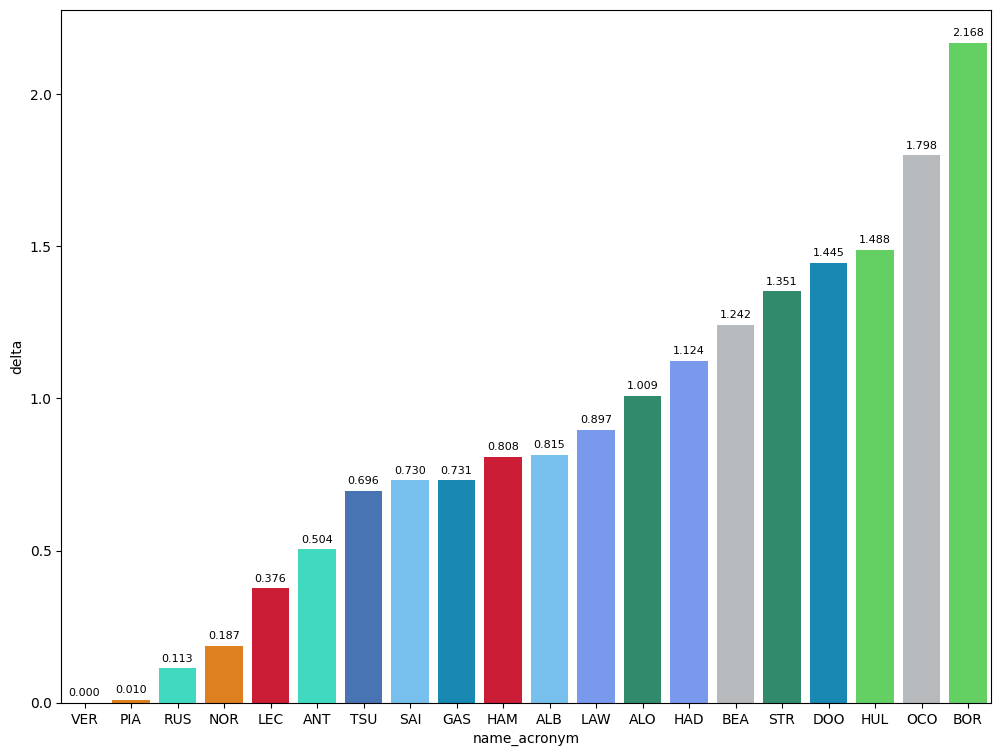

In [11]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

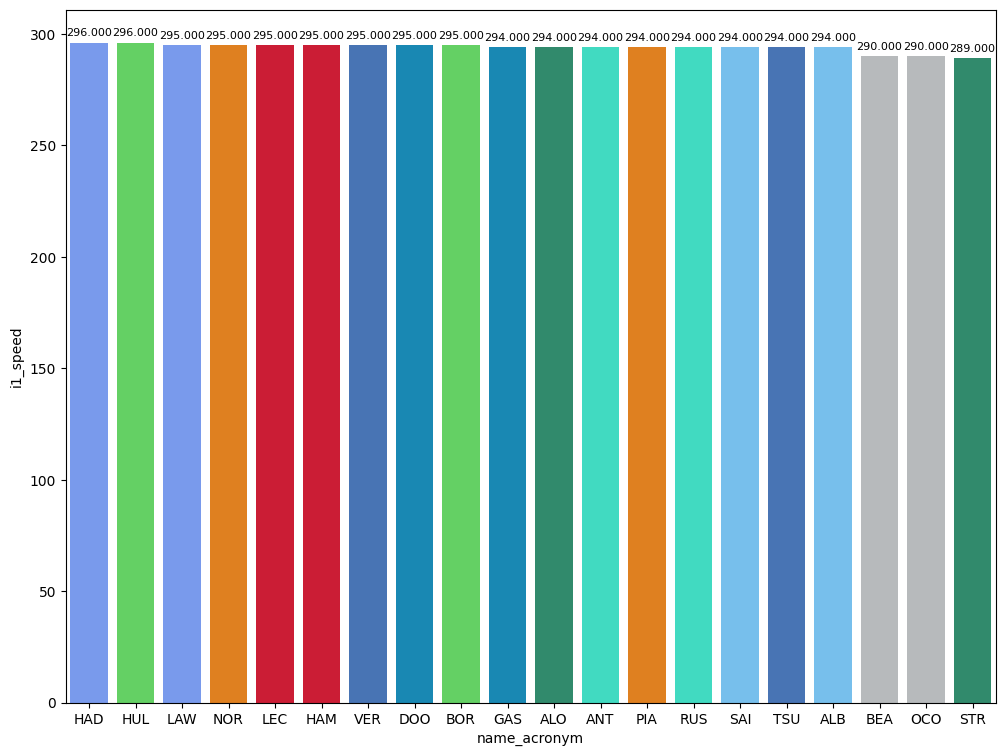

In [12]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

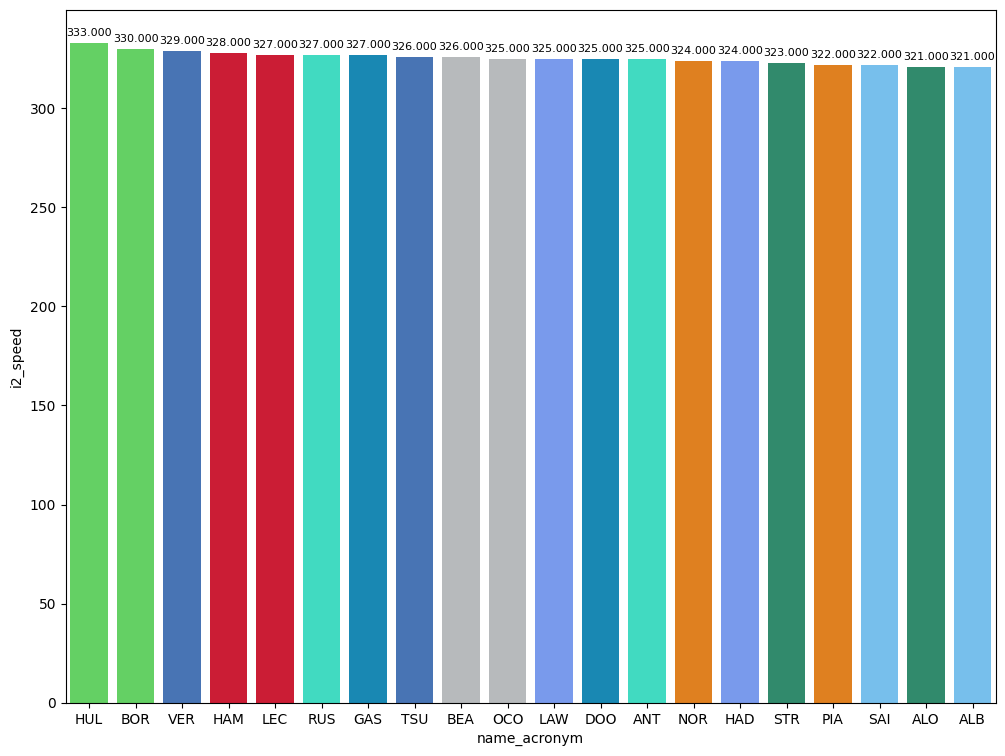

In [13]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

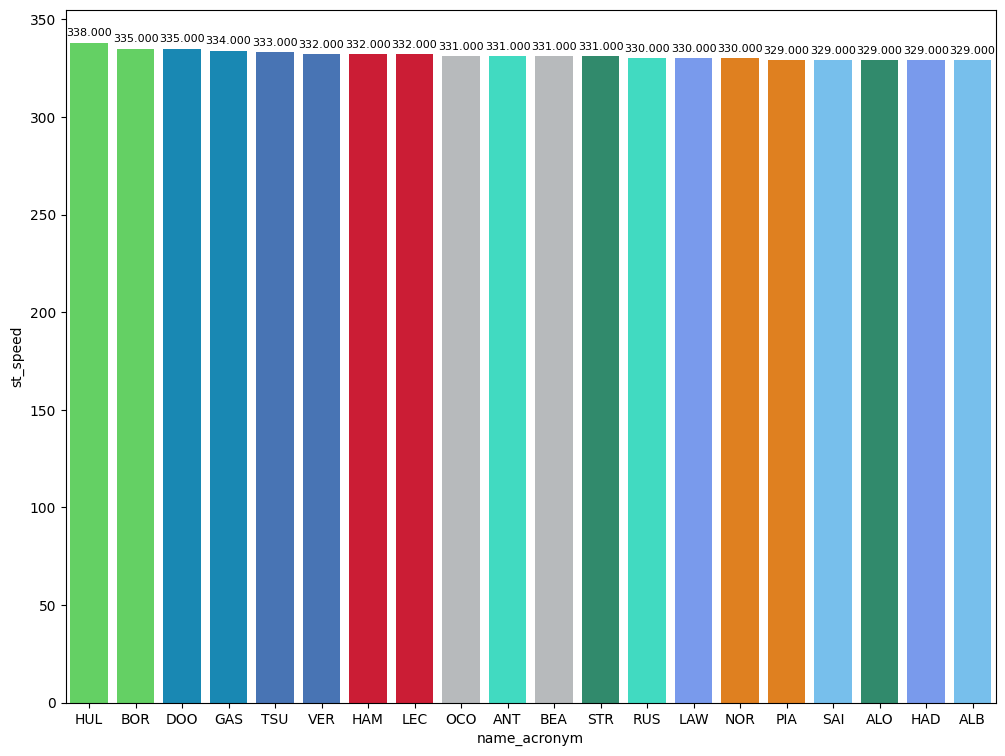

In [14]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

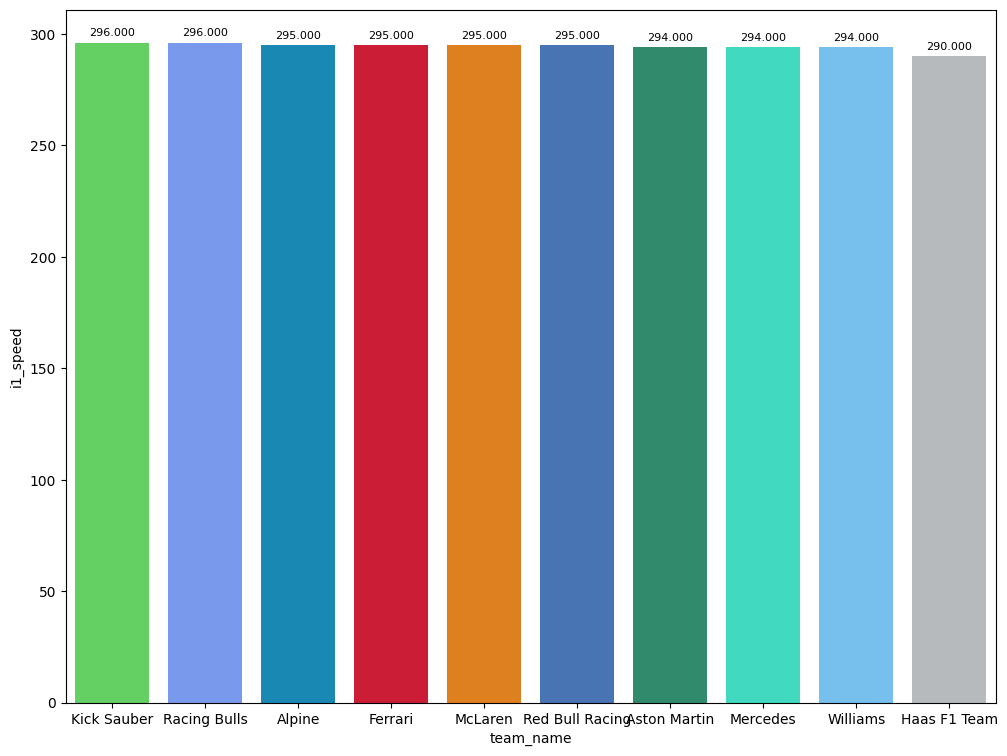

In [15]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

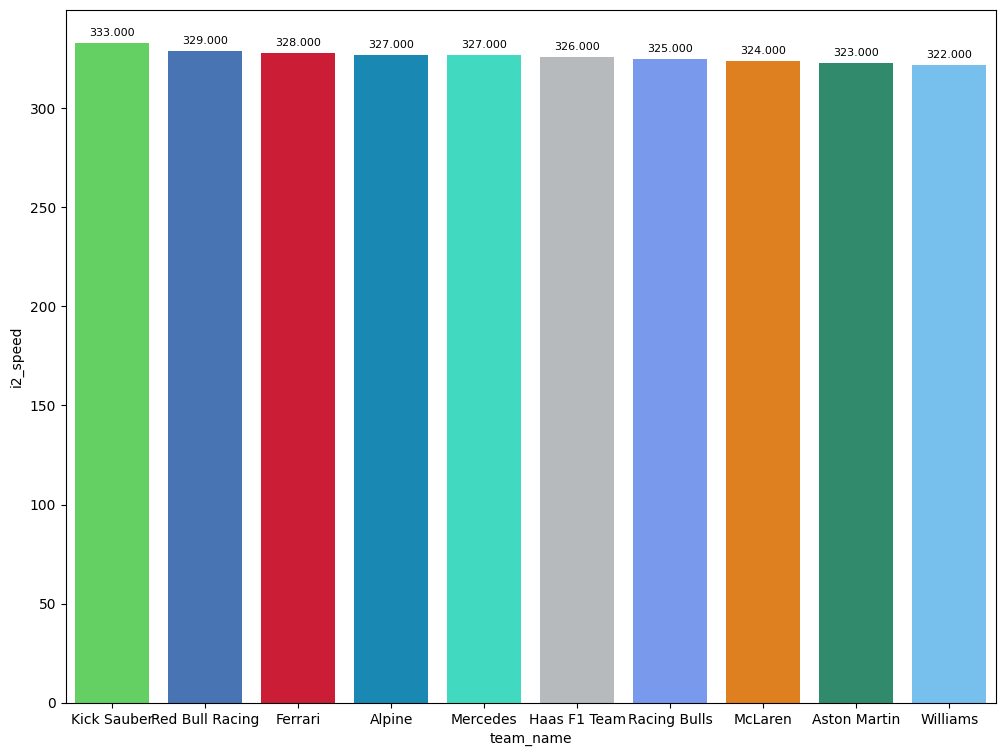

In [16]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

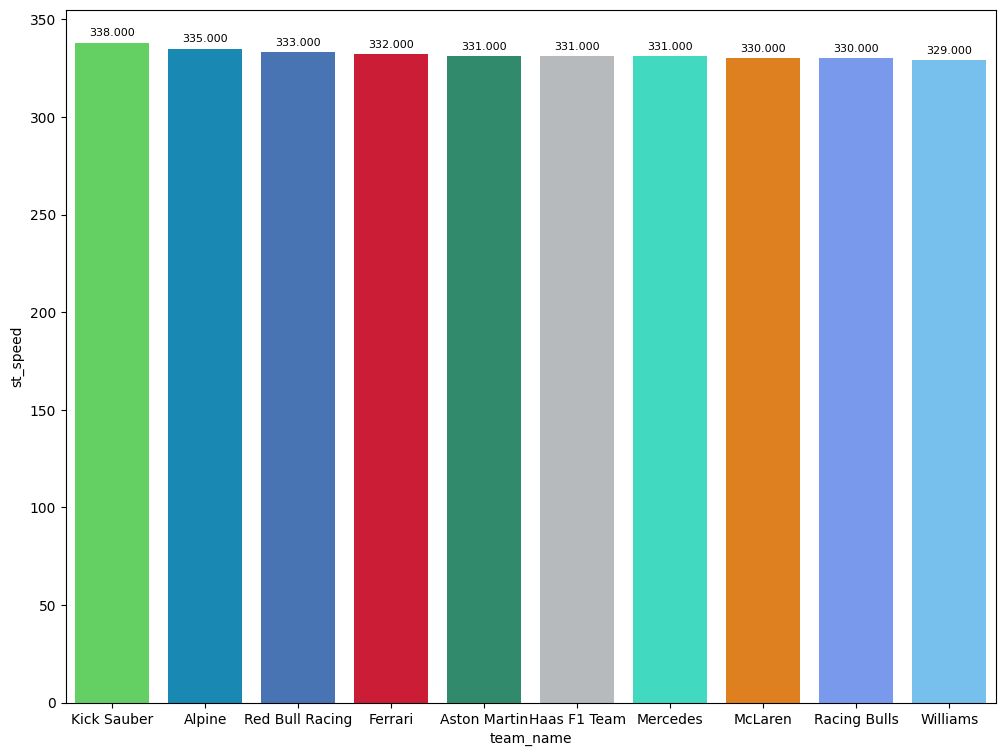

In [17]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [18]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [20]:
maximumDateQ1 = "date_start <'2025-04-19T17:25:01+00:00'"
maximumDateQ2 = "date_start <'2025-04-19T17:48:00+00:00' and date_start >'2025-04-19T17:25:01+00:00'"
maximumDateQ3 = "date_start >'2025-04-19T17:48:00+00:00'"

### Qualyfing 1


In [21]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
Hadjar qualified thanks to the second and third sector. STR was faster than him in the first sector but Aston struggled in the last two sectors. In case of DOO, his weakness was the second sector.

In [22]:
#Reference
P15 = q1Data[14:15]

In [23]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Isack HADJAR Sector 1:  32.225 Sector 2:  27.994 Sector 3:  28.352


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
In the first sector we can see that none of the eliminated drivers were close to pass to Q2.

In [24]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             18         0.074               -0.153                0.060   
1              7         0.168               -0.002                0.129   
2             27         0.211                0.252               -0.012   
3             31         0.521                0.493                0.048   
4              5         0.891                0.428                0.270   

   difference_sector_3 name_acronym  
0                0.167          STR  
1                0.041          DOO  
2               -0.029          HUL  
3               -0.020          OCO  
4                0.193          BOR

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_ti

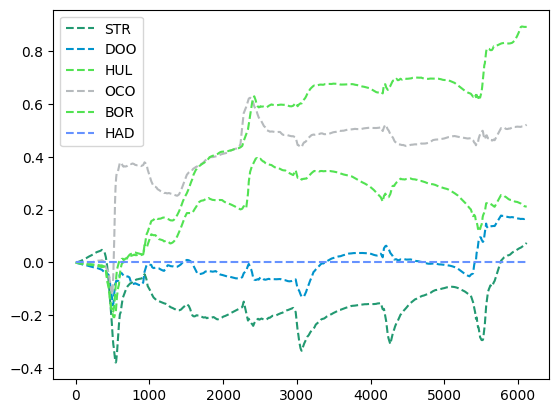

In [25]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.
LAW was close to HAD but the third sector made the difference.

In [26]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0               1        -0.793               -0.351               -0.181   
1               4        -0.766               -0.424               -0.163   
2              81        -0.670               -0.324               -0.284   
3              12        -0.443                0.007               -0.251   
4              22        -0.345               -0.197               -0.103   
5              23        -0.292               -0.261                0.012   
6              63        -0.289                0.070               -0.270   
7              55        -0.217               -0.129               -0.042   
8              44        -0.199                0.011               -0.105   
9              10        -0.150               -0.089                0.033   
10             87        -0.035                0.272               -0.177   
11             14        -0.023               -0.132               -0.066   
12             16        -0.019                0.128               -0.016   
13             30        -0.010                0.070                0.009   

    difference_sector_3 name_acronym  
0                -0.261          VER  
1                -0.179          NOR  
2                -0.062          PIA  
3                -0.199          ANT  
4                -0.045          TSU  
5                -0.043          ALB  
6                -0.089          RUS  
7                -0.046          SAI  
8                -0.105          HAM  
9                -0.094          GAS  
10               -0.130          BEA  
11                0.175          ALO  
12               -0.131          LEC  
13               -0.089          LAW

#### Best sector per driver
In this section we can see the best sector of the session

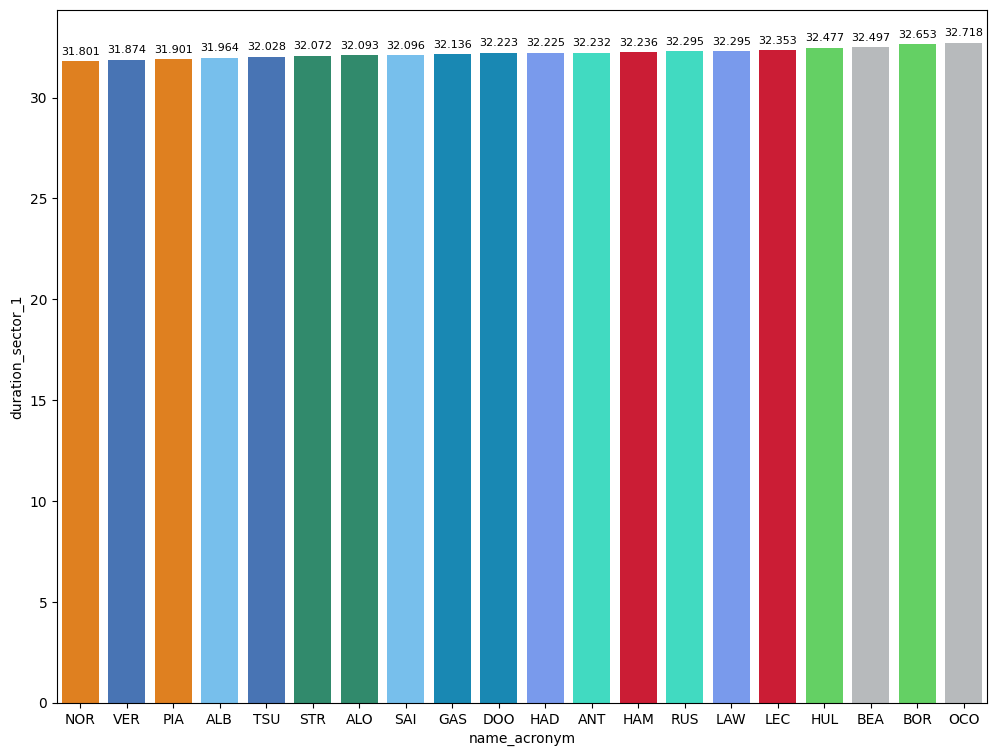

In [27]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

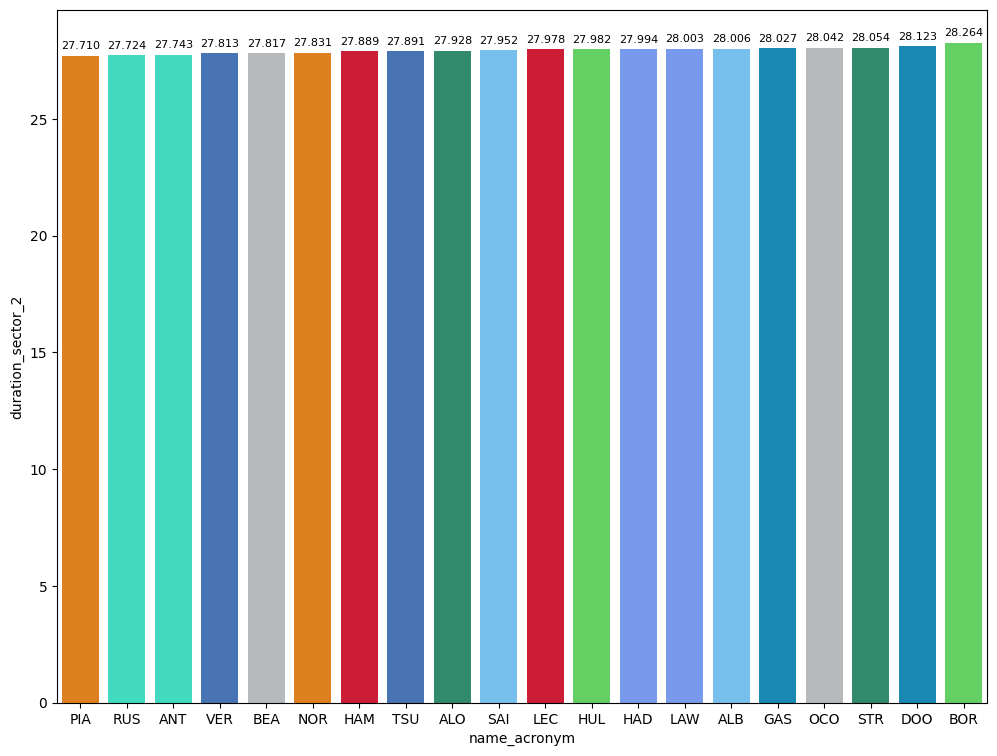

In [28]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

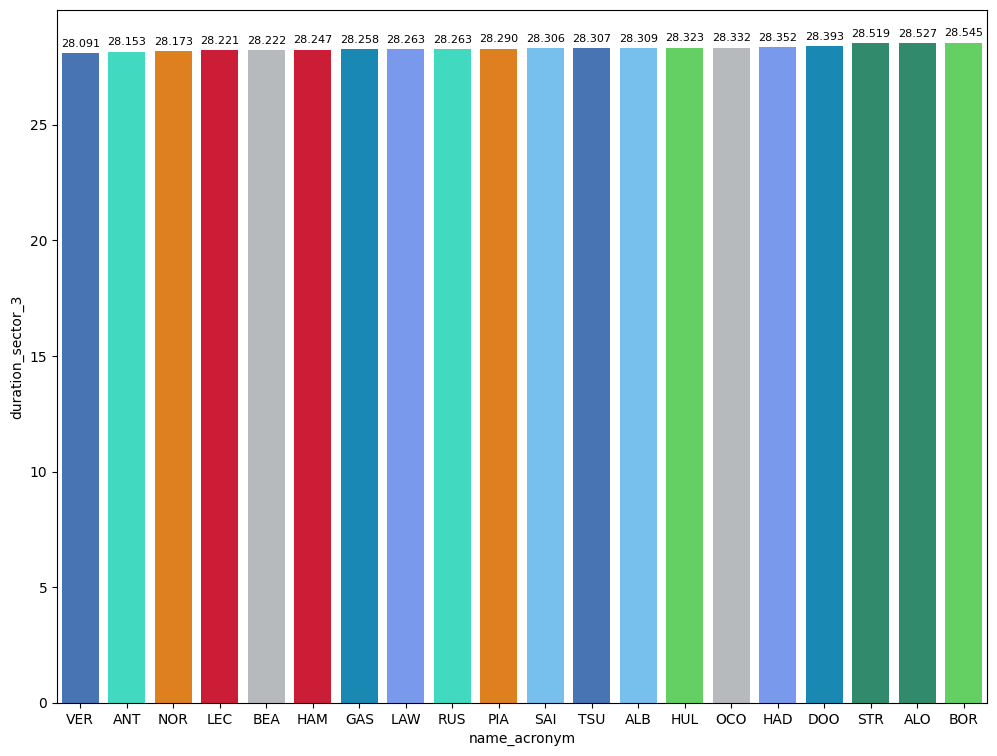

In [29]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2
Albon could have passed but in the last sector he lost his opportunity not improving compared to his last attemp. In case of Lawson, his first sector was bad. In case of Alonso, Aston was the slowest in 3ºth sector and this costed his attemp to pass.

In [30]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [31]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Lewis HAMILTON Sector 1:  31.972 Sector 2:  27.922 Sector 3:  28.208


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
In the first sector we can see that Bearman and Albon were faster than Hamilton, being Bearman chances to make it through Q3.
But the rookie was not able to improve in the second and third sector to pass to Q3

In [32]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             23         0.007               -0.071               -0.116   
1             30         0.089                0.115               -0.032   
2             14         0.201                0.049               -0.070   
3              6         0.316                0.237               -0.035   
4             87         0.546                0.517               -0.051   

   difference_sector_3 name_acronym  
0                0.194          ALB  
1                0.006          LAW  
2                0.222          ALO  
3                0.114          HAD  
4                0.080          BEA

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_ti

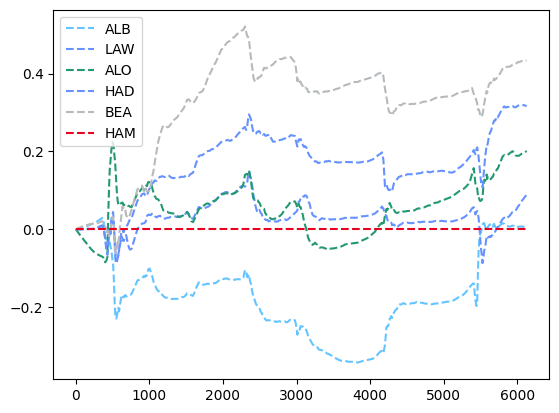

In [33]:
libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk


In [34]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0              4        -0.621               -0.227               -0.238   
1              1        -0.573               -0.262               -0.196   
2             81        -0.557               -0.171               -0.209   
3             63        -0.503               -0.235               -0.161   
4             12        -0.304               -0.052               -0.138   
5             16        -0.236                0.047               -0.169   
6             22        -0.112               -0.053               -0.081   
7             55        -0.078                0.090               -0.100   
8             10        -0.077                0.164               -0.106   

   difference_sector_3 name_acronym  
0               -0.156          NOR  
1               -0.115          VER  
2               -0.177          PIA  
3               -0.107          RUS  
4               -0.114          ANT  
5               -0.114          LEC  
6                0.022          TSU  
7               -0.068          SAI  
8               -0.135          GAS

#### Best sector per driver
In this section we can see the best sector of the session

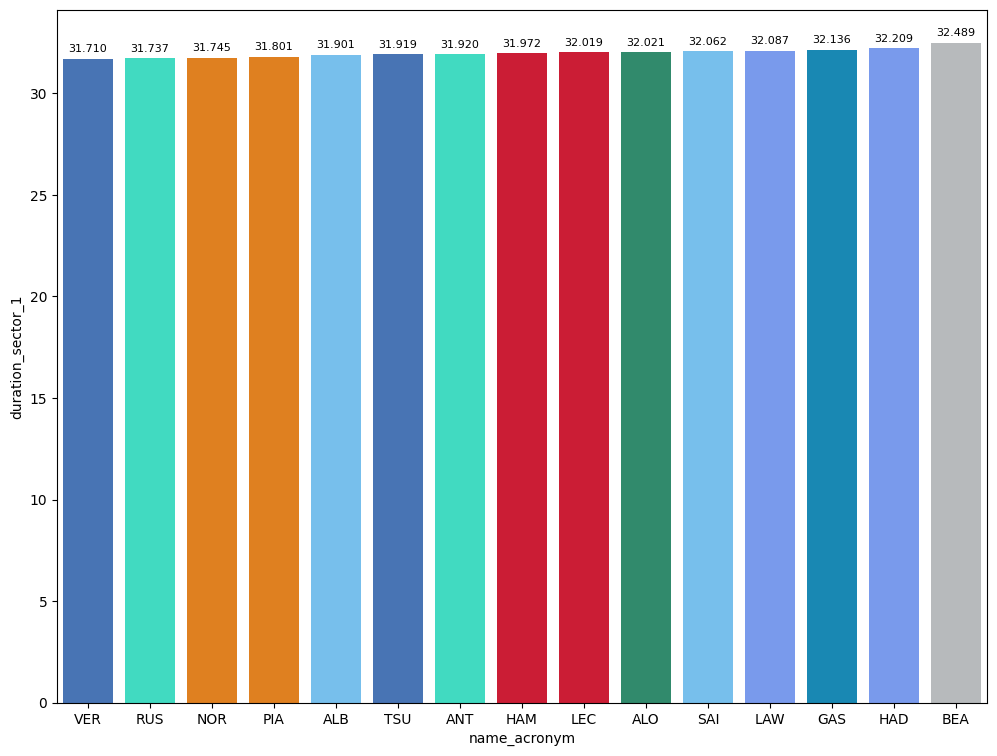

In [35]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

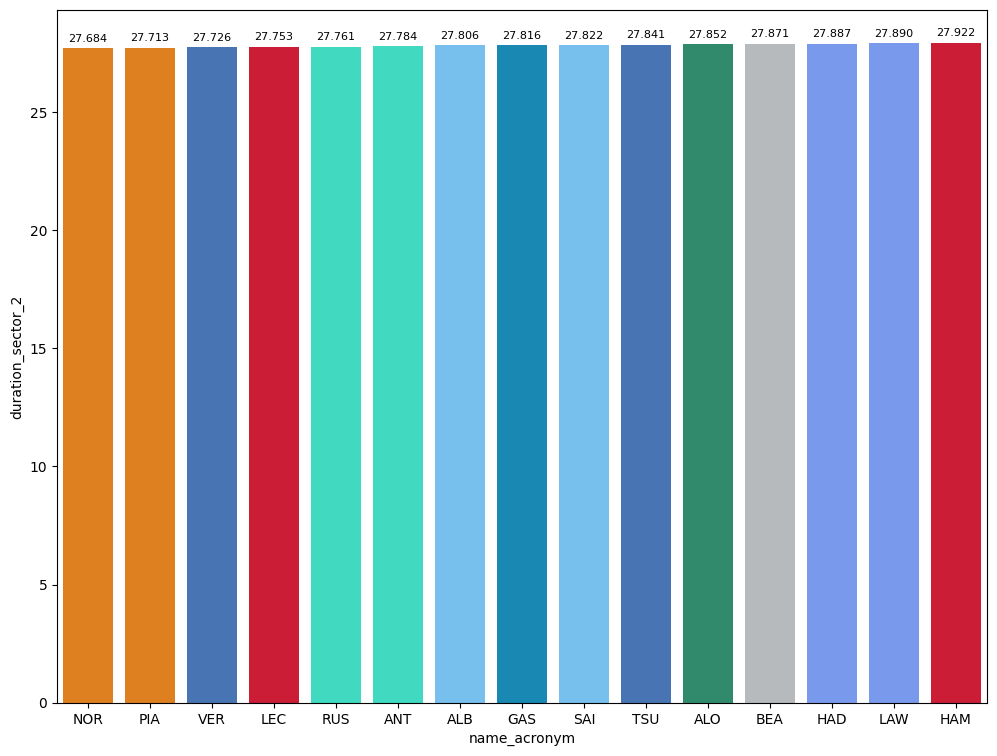

In [36]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

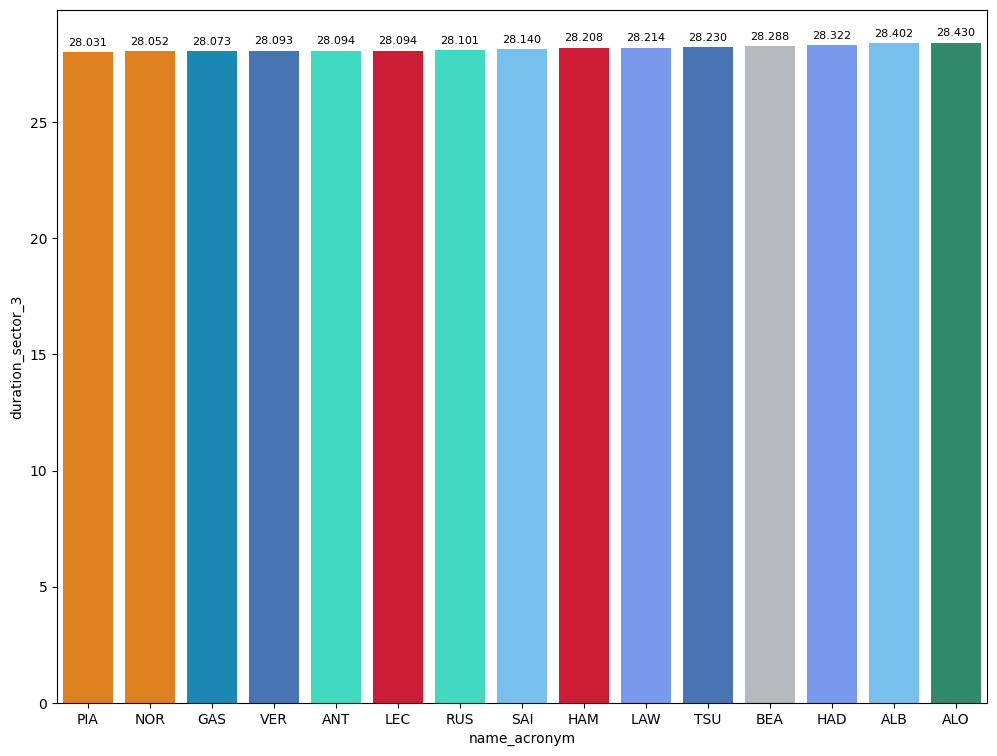

In [37]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [38]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [39]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: Max VERSTAPPEN Sector 1:  31.507 Sector 2:  27.756 Sector 3:  28.031


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
Guess the poleman was very difficult.Max did it again being better than Piastri in the first sector and it was enough to take the pole.

In [40]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

driver_number  lap_duration  difference_sector_1  difference_sector_2  \
0             81         0.010                0.123               -0.071   
1             63         0.113                0.177               -0.179   
2             16         0.376                0.350                0.040   
3             12         0.572                0.657               -0.074   
4             55         0.870                0.577                0.166   
5             44         0.907                0.630                0.077   
6             22         0.910                0.632                0.106   
7             10         1.073                0.644                0.162   

   difference_sector_3 name_acronym  
0               -0.042          PIA  
1                0.115          RUS  
2               -0.014          LEC  
3               -0.011          ANT  
4                0.127          SAI  
5                0.200          HAM  
6                0.172          TSU  
7                0.267          GAS

#### Best sector per driver
In this section we can see the best sector of the session

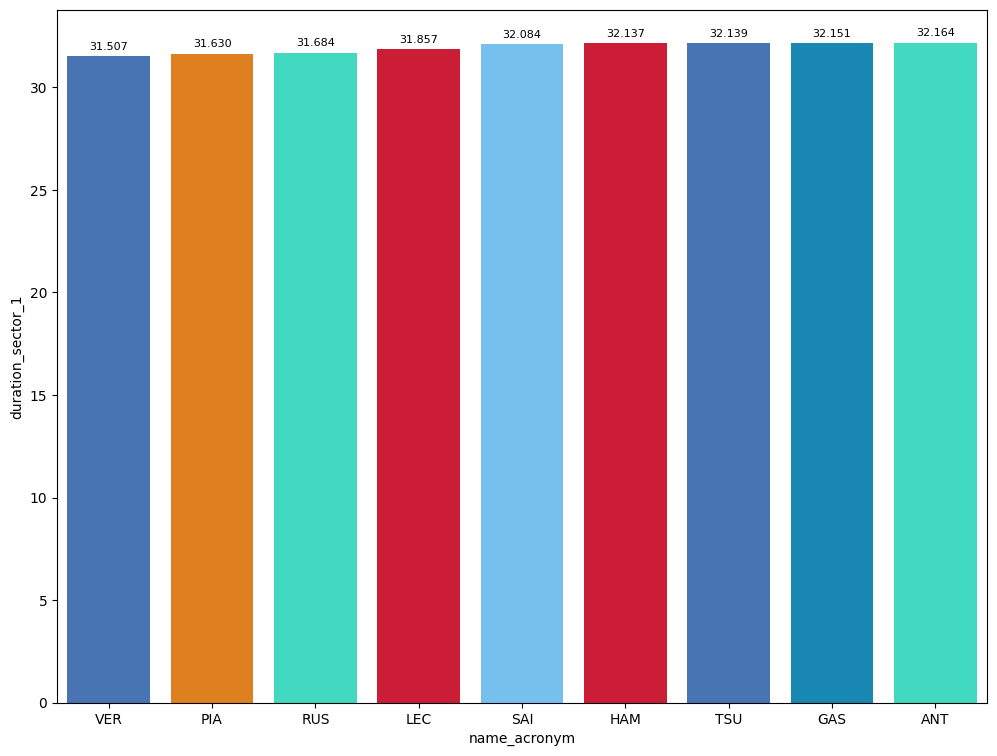

In [41]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

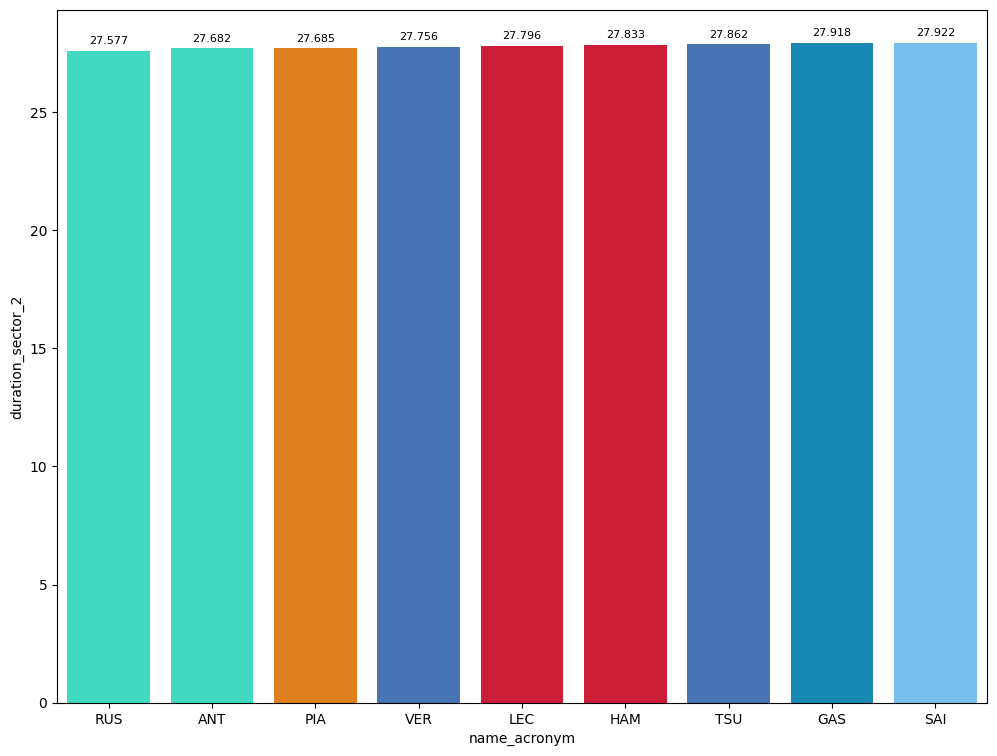

In [42]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

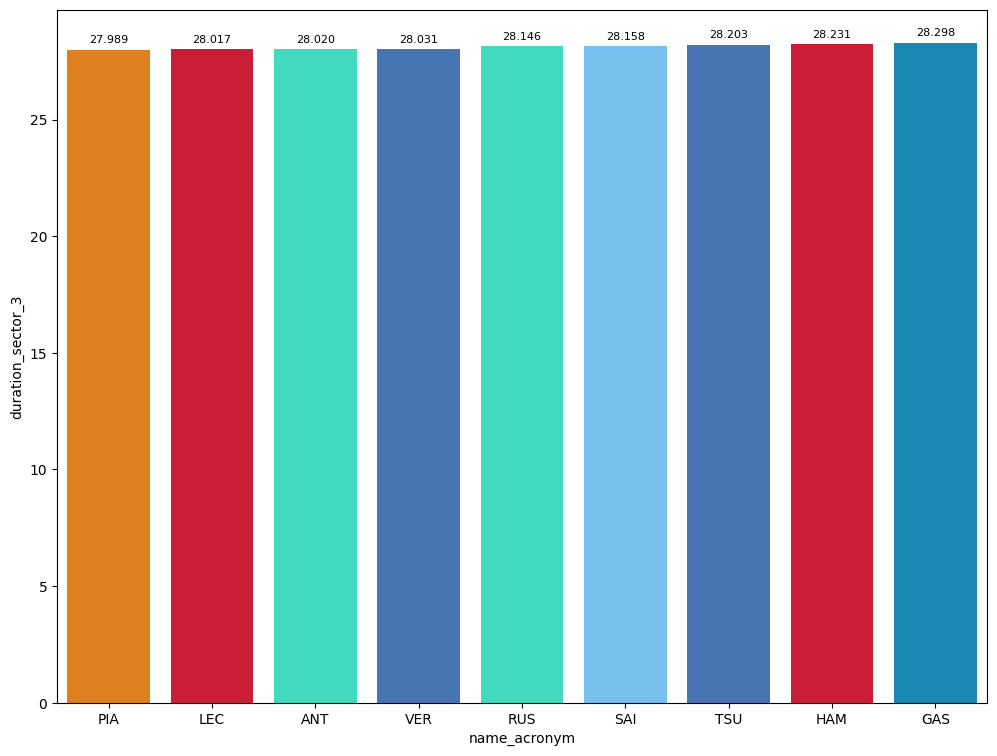

In [43]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

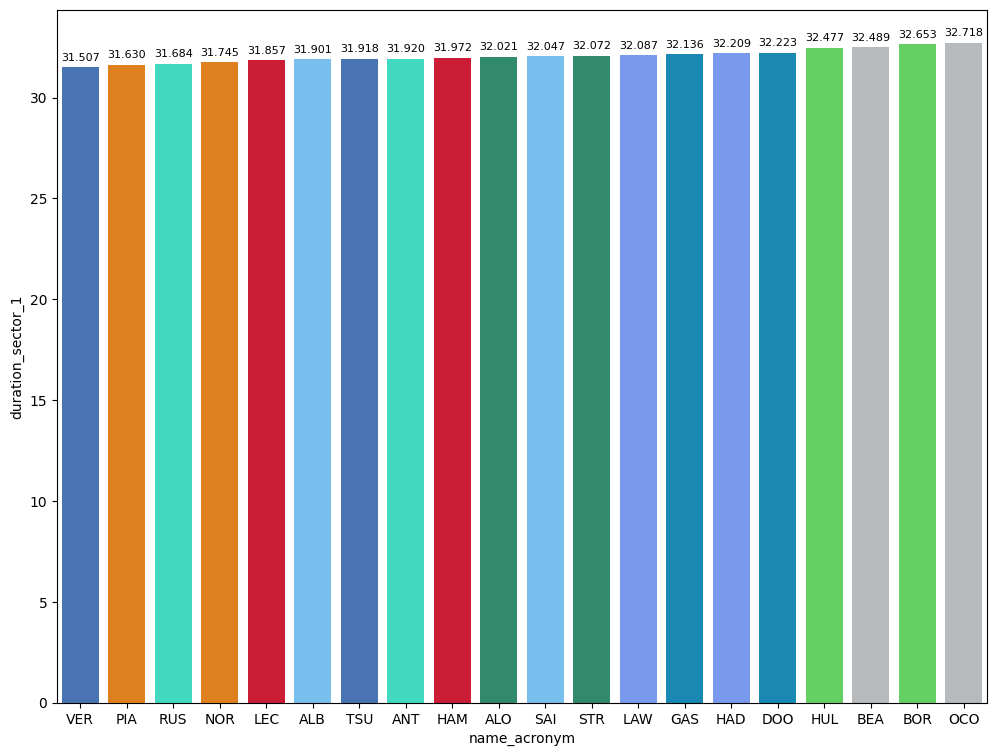

In [47]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

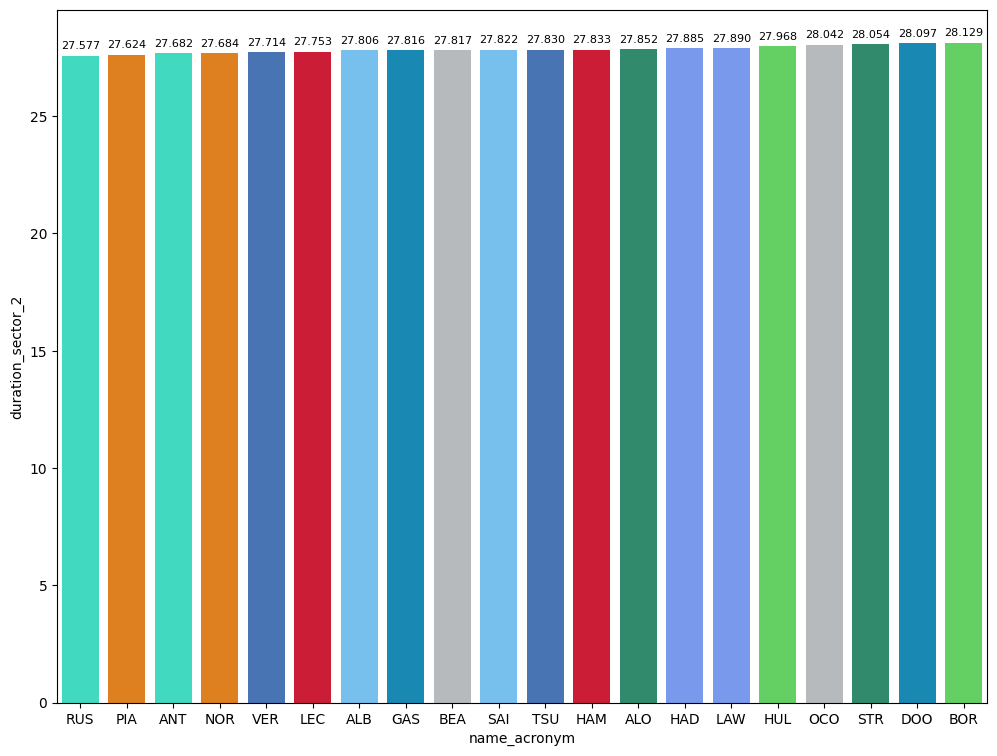

In [48]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

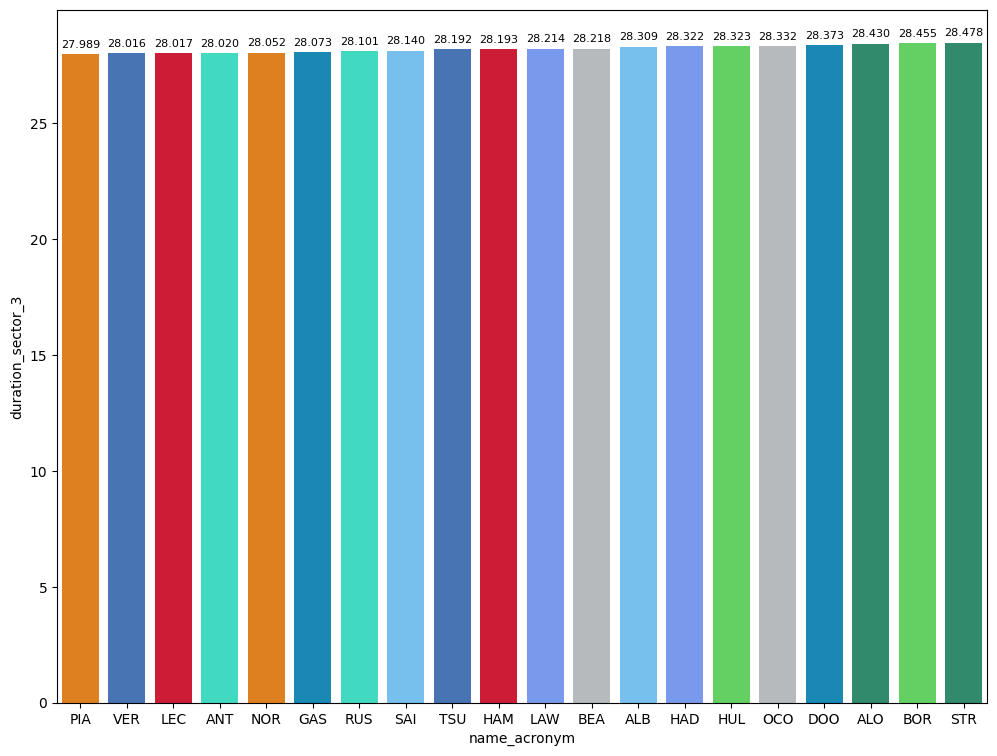

In [49]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Gear shifts of the poleman

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


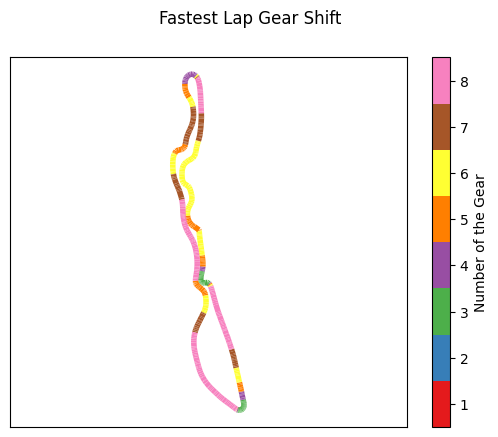

In [50]:
libraryDataF1.show_shifts_poleman(session)

### Comparaison between the poleman and the second

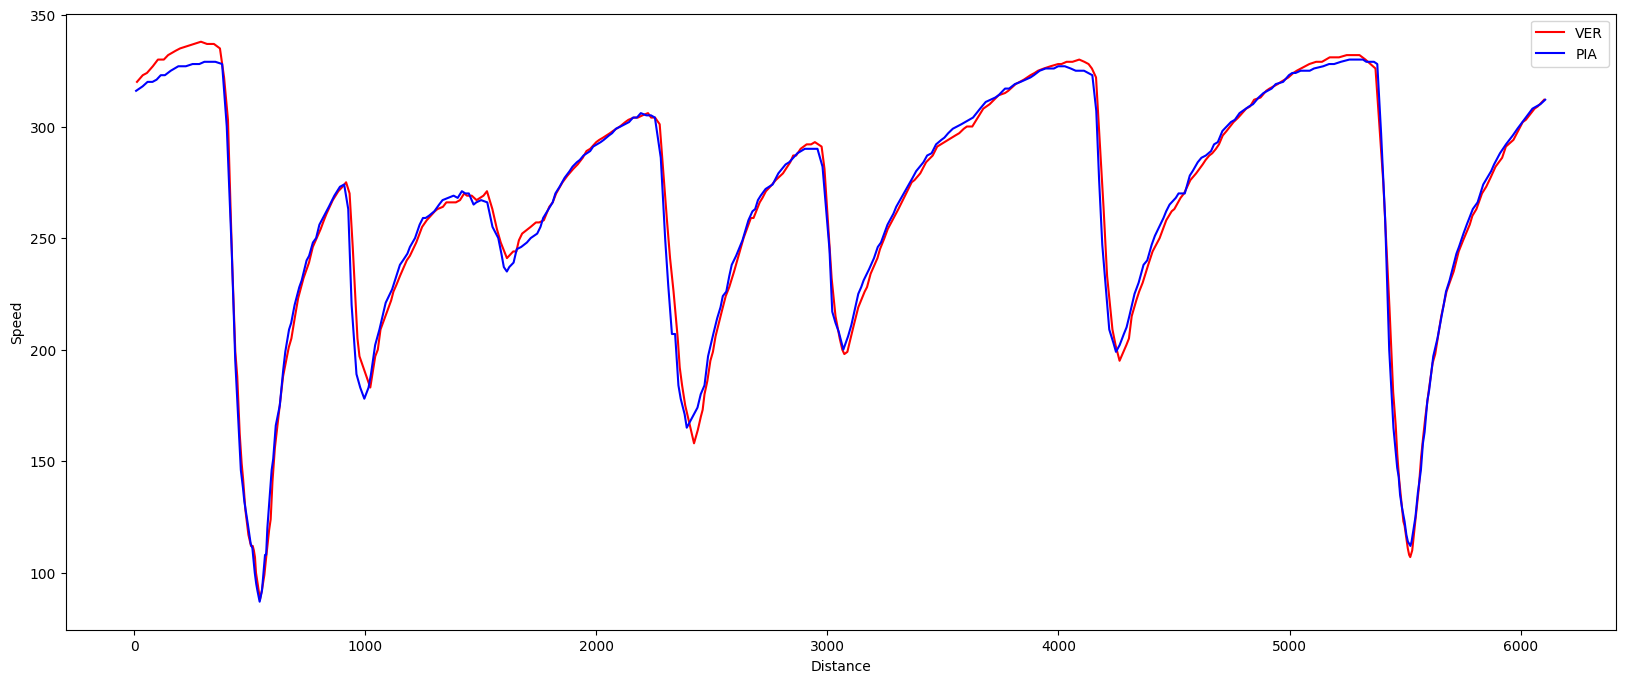

In [51]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

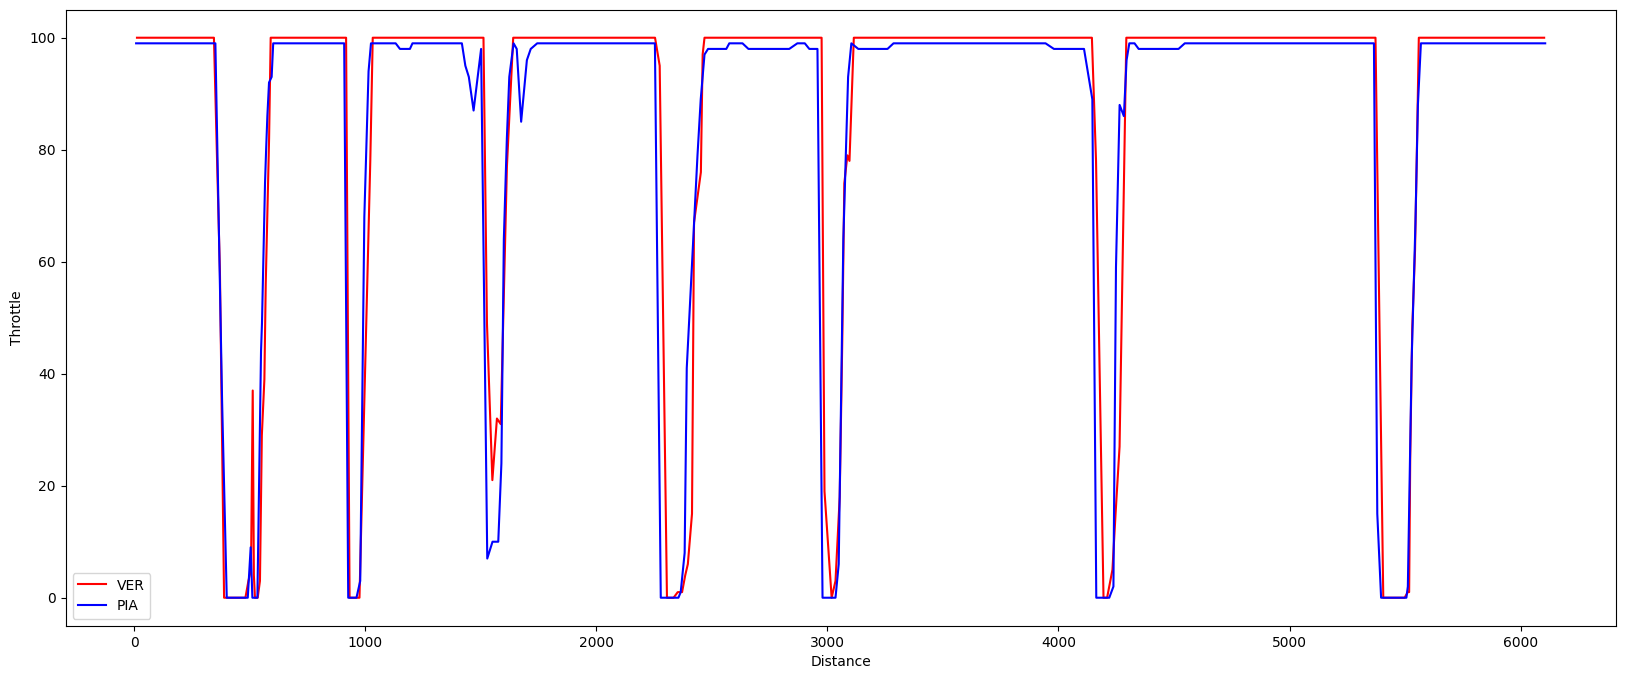

In [52]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

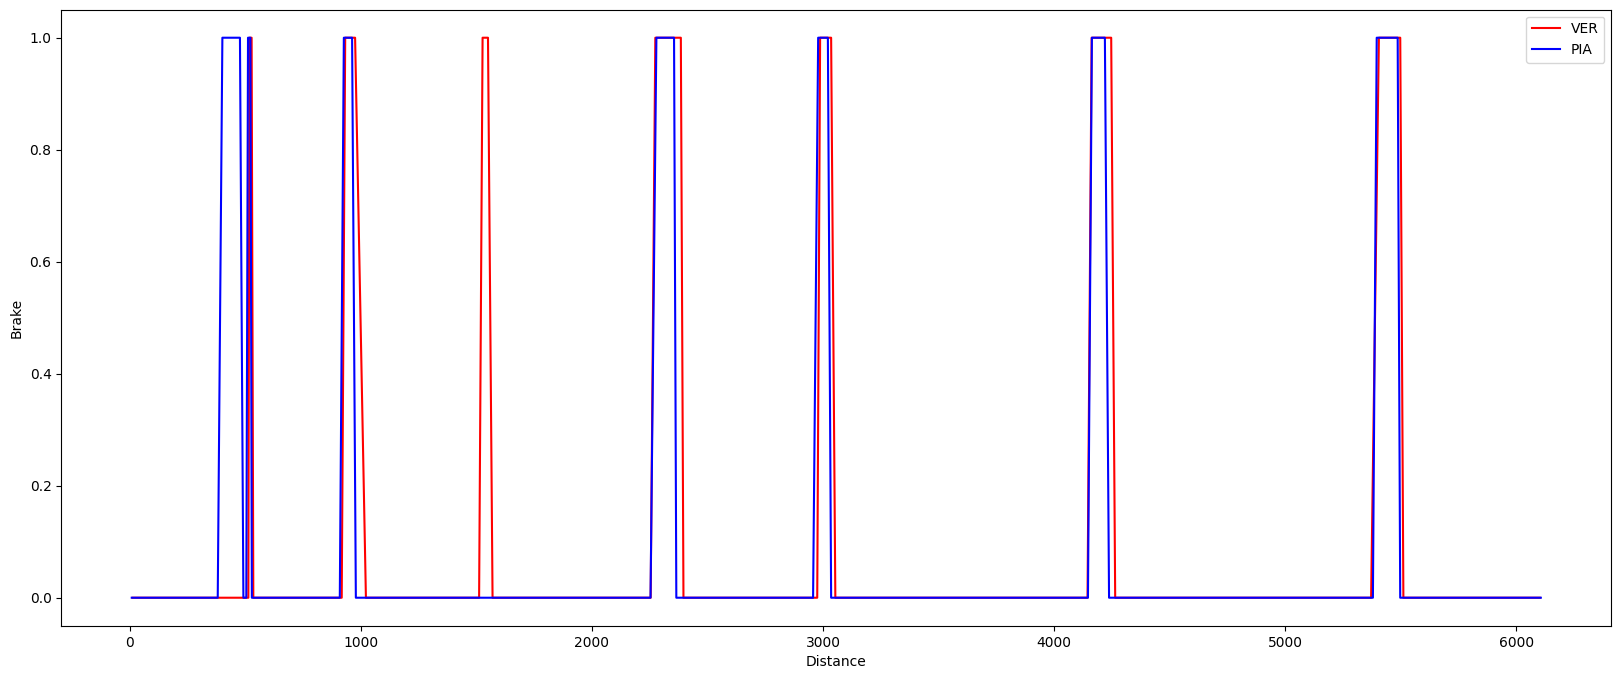

In [53]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

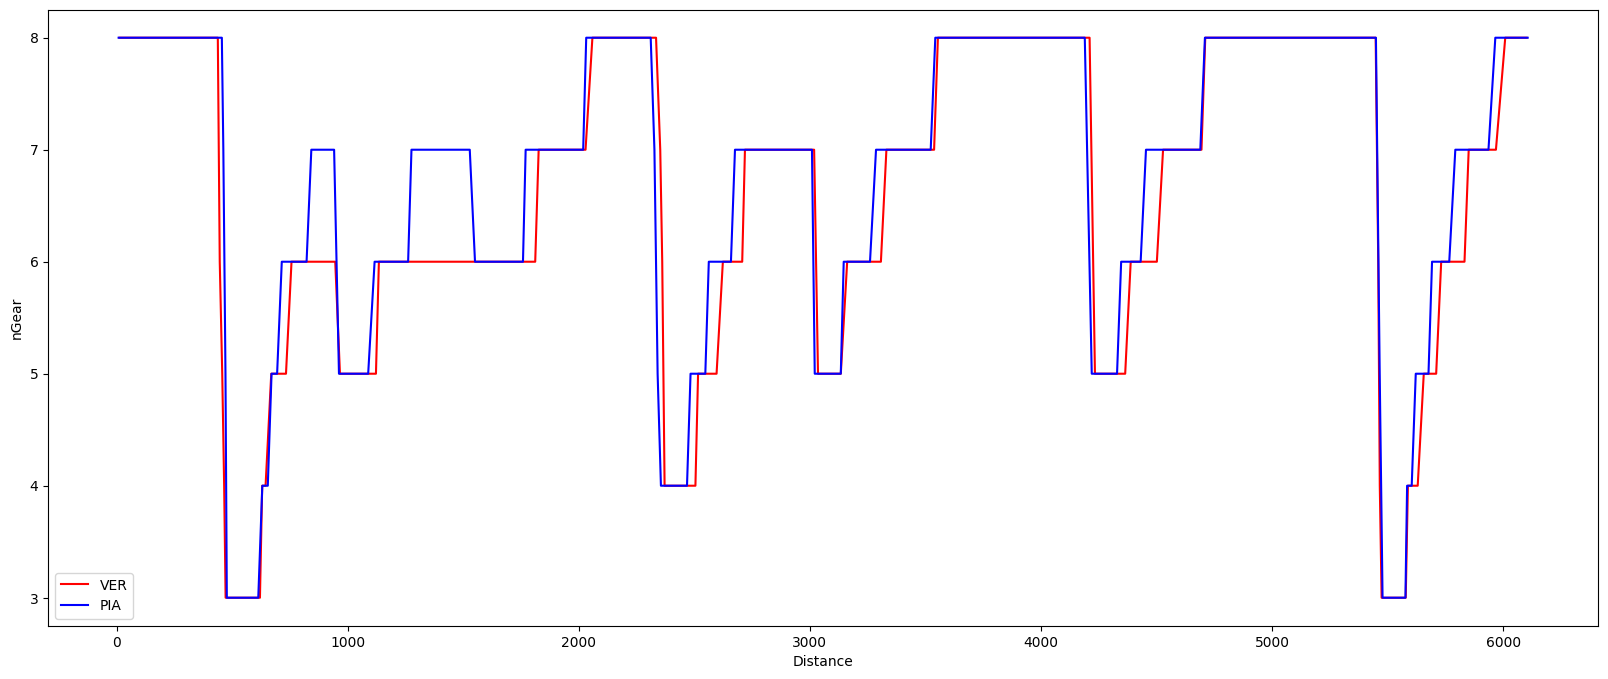

In [54]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9480)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9480)
drivers = libraryDataF1.obtain_information('drivers',session_key=9480)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 108").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Race pace
General explanation
Explanation per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 110").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 90
MAXIMUM_SECONDS = 108

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 38')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,38,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9472)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration